DOMAIN: Telecom

• CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can
analyse all relevant customer data and develop focused customer retention programs.

• DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:

• Customers who left within the last month – the column is called Churn

• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

• Demographic info about customers – gender, age range, and if they have partners and dependents

• PROJECT OBJECTIVE: Build a model that will help to identify the potential customers who have a higher probability to churn.

This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising customer retention.

#### 1. Import and warehouse data :

• Import all the given datasets. Explore shape and size.

• Merge all datasets onto one and explore final shape and size.

In [1]:
%matplotlib inline
#import the basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style = 'darkgrid')

#pre-processing method
from sklearn.model_selection import train_test_split

#the regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

#methods and classes for evaluation
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from math import sqrt
import time

In [2]:
#read the first csv file into a dataframe
df1 = pd.read_csv('TelcomCustomer-Churn_1.csv')

In [3]:
df1.head() # shows the top 05 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [4]:
df1.shape
#we have 7043 rows and 10 columns

(7043, 10)

In [5]:
#read the second csv file into a dataframe
df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [6]:
df2.head() # shows the top 05 rows

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df2.shape
#we have 7043 rows and 11 columns

(7043, 11)

In both the csv's, the no. of rows are equal and hence the two datasets need to be merged

In [8]:
#merge all datasets into one and explore final shape and size
df=pd.merge(df1,df2, left_index=True, right_index=True)

In [9]:
#sample 41 rows from the merged dataset
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [10]:
#explore the shape of the dataset
df.shape

(7043, 21)

There are 7043 Rows and 21 Columns

#### 2. Data cleansing:
• Missing value treatment

• Convert categorical attributes to continuous using relevant functional knowledge

• Drop attribute/s if required using relevant functional knowledge

In [11]:
#to know about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Out of 21 columns in the dataset, one column is float, two columns are integer and the remaining 18 columns are object datatype

Further there are no null values present in the data

However, the TotalCharges column is shown as object, whereas it should be numerical datatype

In [12]:
# to check the null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values present in the dataset.

In [13]:
#changing the datatype of the object column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')

In [14]:
#check the null values in the data
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values present in TotalCharges column.

In [15]:
#Let's look at the null values in TotalCharges column
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


the null values in TotalCharges corresponds to Zero in tenure column

In [16]:
#check whether there are any 0 values in Tenure Column
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


the null values in TotalCharges and the 0 values in tenure column are same.

Dropping the null values in TotalCharges column may not effect the data that much.

In [17]:
#dropping the nan values in the dataset
df.dropna(axis=0, inplace=True)

In [18]:
#the customer ID column is not of that much relevance, hence the column may be dropped
df.drop(['customerID'], axis = 1, inplace = True)

In [19]:
#exploring the shape of the dataset after dropping nan values
df.shape

(7032, 20)

Now the total number of rows reduced to 7032 and columns reduced to 20

In [20]:
#checking for null values after removing the null values in the data
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###### 3. Data analysis & visualisation: 
• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [21]:
#checking the basic details of the data i.e. 5 point Summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Mean is greater than median in tenure column, which is shows there is postive skewness

Mean is less than median in MonthlyCharges column, which shows there is negative skewness

Mean is far more than greater than median, which shows positive skewness. Moreover, maximum is value is 8684 aand standard deviation is 2266 , which shows totalcharges is largely affected by outliers 

### Univariate Analysis

Distribution and outlier analysis of numerical variables

###### Tenure

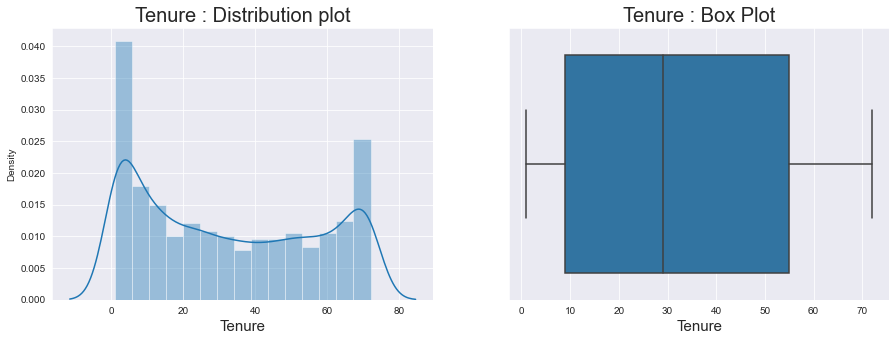

In [22]:
fig,axes = plt.subplots(1,2,figsize=(15,5))

sns.distplot(df['tenure'], ax=axes[0])
sns.boxplot(x='tenure', data = df, orient ='h', ax=axes[1])

axes[0].set_title('Tenure : Distribution plot',fontsize = 20)
axes[0].set_xlabel('Tenure', fontsize = 15)

axes[1].set_title('Tenure : Box Plot', fontsize = 20)
axes[1].set_xlabel('Tenure', fontsize=15)

plt.show()

Total number of outliers in Tenure: 0
The data is not normally distributed.
The tenure is between 01 to around 70.

###### MonthlyCharges

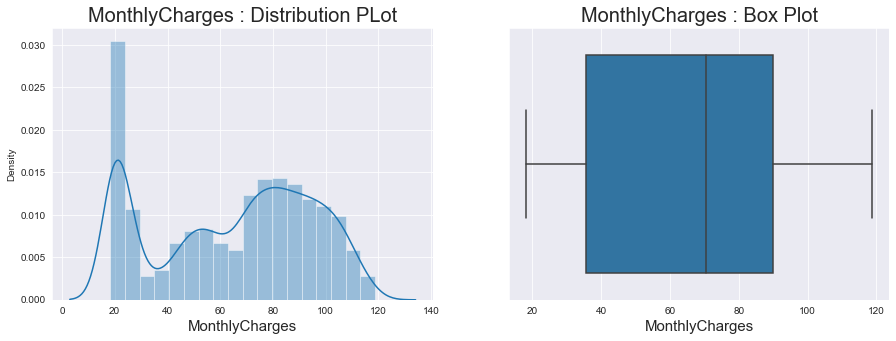

In [23]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

sns.distplot(df['MonthlyCharges'], ax = axes[0])
sns.boxplot(x = 'MonthlyCharges', data = df, orient = 'h', ax = axes[1])

axes[0].set_title('MonthlyCharges : Distribution PLot', fontsize = 20)
axes[0].set_xlabel('MonthlyCharges', fontsize = 15)

axes[1].set_title('MonthlyCharges : Box Plot', fontsize = 20)
axes[1].set_xlabel('MonthlyCharges', fontsize = 15)

plt.show()

Total number of outliers in MonthlyCharges: 0

The data is not normally distributed.

The MonthlyCharges is between 20 to 120.

###### TotalCharges

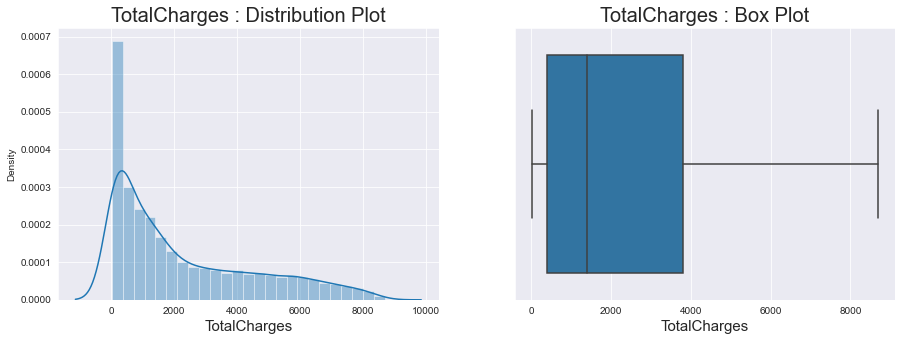

In [24]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

sns.distplot(df['TotalCharges'], ax = axes[0])
sns.boxplot(x = 'TotalCharges', data = df, orient = 'h', ax = axes[1])

axes[0].set_title('TotalCharges : Distribution Plot', fontsize = 20)
axes[0].set_xlabel('TotalCharges', fontsize = 15)

axes[1].set_title('TotalCharges : Box Plot', fontsize = 20)
axes[1].set_xlabel('TotalCharges', fontsize = 15)

plt.show()

Total number of outliers in TotalCharges: 0

The data is not normally distributed. There is a positive skewness

The TotalCharges is between 1 to 8000.

#### Distribution of categorical variables

##### SeniorCitizen

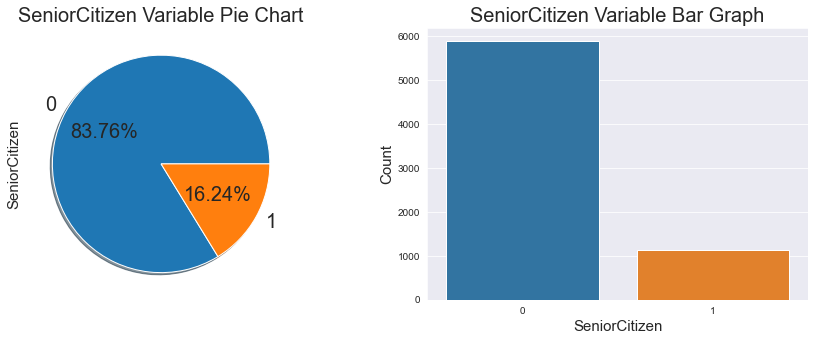

In [25]:
fig, axes = plt.subplots(1,2, figsize =(15,5))

df['SeniorCitizen'].value_counts().plot.pie(autopct = '%1.2f%%',fontsize = 20, ax=axes[0], shadow=True)
sns.countplot('SeniorCitizen', data=df, ax = axes[1])

axes[0].set_title('SeniorCitizen Variable Pie Chart', fontsize = 20)
axes[0].set_ylabel('SeniorCitizen', fontsize = 15)

axes[1].set_title('SeniorCitizen Variable Bar Graph', fontsize = 20)
axes[1].set_xlabel('SeniorCitizen', fontsize = 15)
axes[1].set_ylabel('Count', fontsize = 15)

plt.show()

We can categorize "0" as "No" and "01" as "Yes" for SeniorCitizen

We can see that "NO" percentage is more than "Yes"

Hence we can say that most of the users are not SeniorCitizens

##### gender

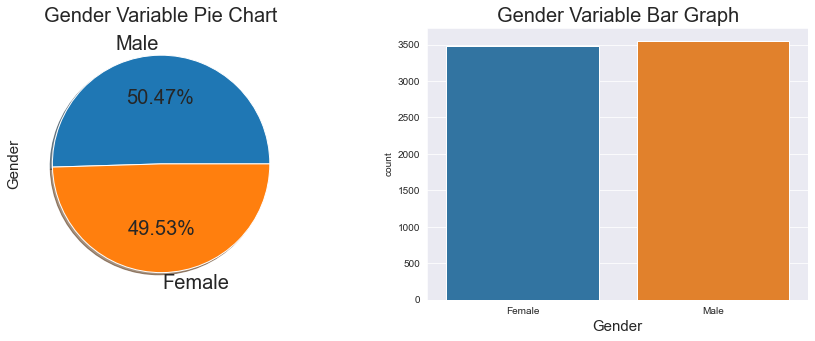

In [26]:
fig, axes = plt.subplots(1,2, figsize = (15,5))

df['gender'].value_counts().plot.pie(autopct = '%1.2f%%', fontsize = 20, ax=axes[0], shadow = True)
sns.countplot('gender', data = df, ax = axes[1])

axes[0].set_title('Gender Variable Pie Chart', fontsize = 20)
axes[0].set_ylabel('Gender', fontsize = 15)

axes[1].set_title('Gender Variable Bar Graph', fontsize = 20)
axes[1].set_xlabel('Gender', fontsize = 15)

plt.show()

Male & Female customers are nearly equal. Males are slightly more than Females

##### Partner

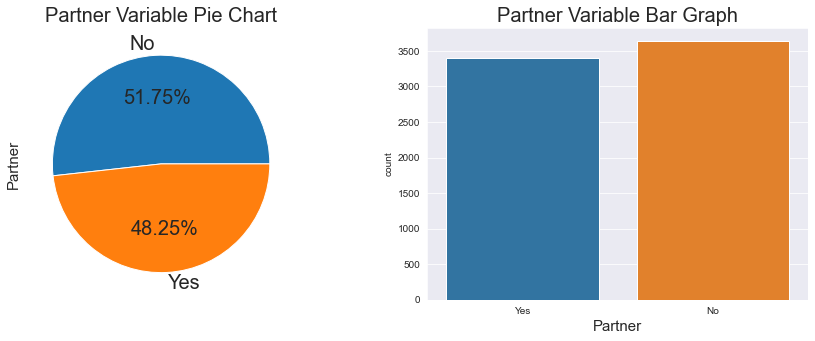

In [27]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

df['Partner'].value_counts().plot.pie(autopct = '%1.2f%%', fontsize = 20, ax = axes[0])
sns.countplot('Partner', data=df, ax = axes[1])

axes[0].set_title('Partner Variable Pie Chart', fontsize = 20)
axes[0].set_ylabel('Partner', fontsize = 15)

axes[1].set_title('Partner Variable Bar Graph', fontsize = 20)
axes[1].set_xlabel('Partner', fontsize = 15)

plt.show()

Number of Partners and Non-Partners is nearly equal i.e Yes - 48.25% & NO - 51.75%

##### Dependents

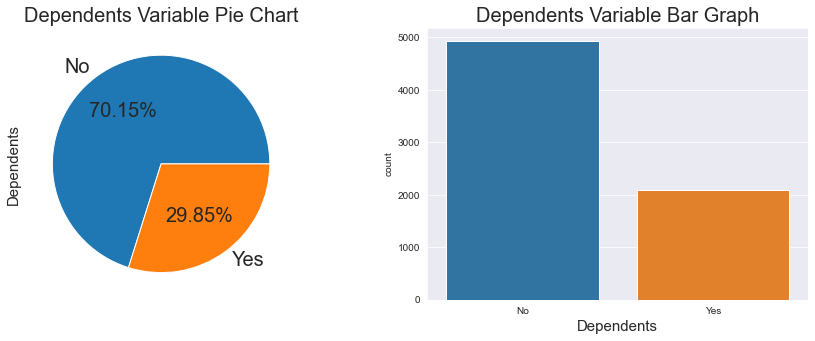

In [28]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

df['Dependents'].value_counts().plot.pie(autopct = '%1.2f%%', fontsize = 20, ax = axes[0])
sns.countplot('Dependents', data=df, ax = axes[1])

axes[0].set_title('Dependents Variable Pie Chart', fontsize = 20)
axes[0].set_ylabel('Dependents', fontsize = 15)

axes[1].set_title('Dependents Variable Bar Graph', fontsize = 20)
axes[1].set_xlabel('Dependents', fontsize = 15)

plt.show()

No. of Customers who are dependent are less at 29.85% while non-dependent at 70.15%

##### PhoneService

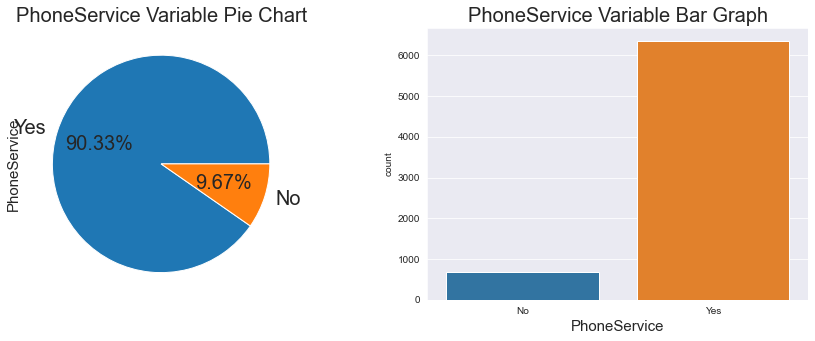

In [29]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

df['PhoneService'].value_counts().plot.pie(autopct = '%1.2f%%', fontsize = 20, ax = axes[0])
sns.countplot('PhoneService', data=df, ax = axes[1])

axes[0].set_title('PhoneService Variable Pie Chart', fontsize = 20)
axes[0].set_ylabel('PhoneService', fontsize = 15)

axes[1].set_title('PhoneService Variable Bar Graph', fontsize = 20)
axes[1].set_xlabel('PhoneService', fontsize = 15)

plt.show()

Most of the customers opted for PhoneService is 90.33% and not is 9.67%

##### MultipleLines

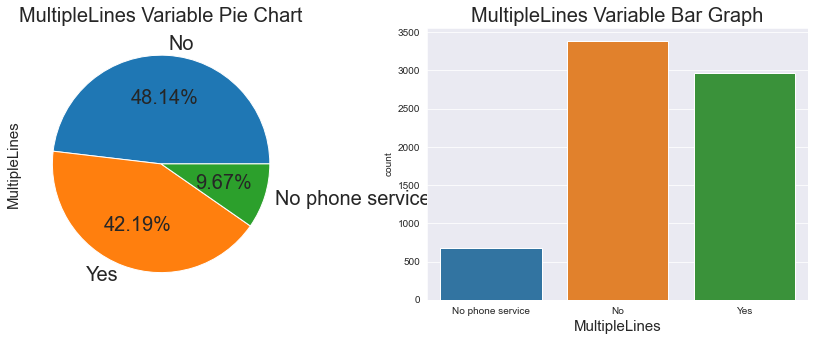

In [30]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

df['MultipleLines'].value_counts().plot.pie(autopct = '%1.2f%%', fontsize = 20, ax = axes[0])
sns.countplot('MultipleLines', data=df, ax = axes[1])

axes[0].set_title('MultipleLines Variable Pie Chart', fontsize = 20)
axes[0].set_ylabel('MultipleLines', fontsize = 15)

axes[1].set_title('MultipleLines Variable Bar Graph', fontsize = 20)
axes[1].set_xlabel('MultipleLines', fontsize = 15)

plt.show()

Apart from 9.67% who have not opted for Phone Service, in the remaining, MultipleLines opted by 42.19% & not opted by 48.14%

##### InternetService

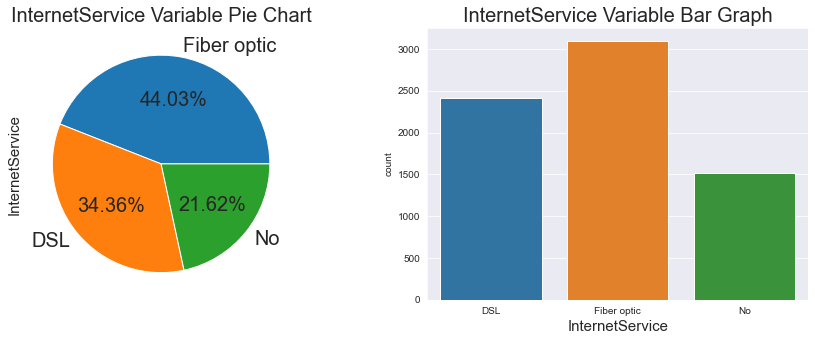

In [31]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

df['InternetService'].value_counts().plot.pie(autopct = '%1.2f%%', fontsize = 20, ax = axes[0])
sns.countplot('InternetService', data=df, ax = axes[1])

axes[0].set_title('InternetService Variable Pie Chart', fontsize = 20)
axes[0].set_ylabel('InternetService', fontsize = 15)

axes[1].set_title('InternetService Variable Bar Graph', fontsize = 20)
axes[1].set_xlabel('InternetService', fontsize = 15)

plt.show()

- Who have not opted for InternetService : 21.62%
- Among who opted for InternetService - 44.03% opted for Fiber OPtic and 34.36% for DSL

##### OnlineSecurity

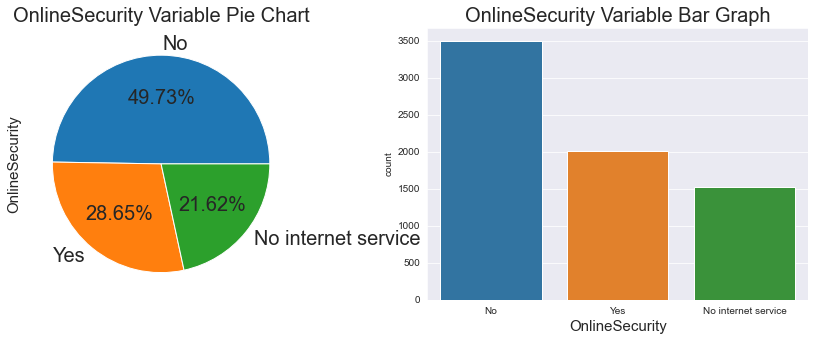

In [32]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

df['OnlineSecurity'].value_counts().plot.pie(autopct = '%1.2f%%', fontsize = 20, ax = axes[0])
sns.countplot('OnlineSecurity', data=df, ax = axes[1])

axes[0].set_title('OnlineSecurity Variable Pie Chart', fontsize = 20)
axes[0].set_ylabel('OnlineSecurity', fontsize = 15)

axes[1].set_title('OnlineSecurity Variable Bar Graph', fontsize = 20)
axes[1].set_xlabel('OnlineSecurity', fontsize = 15)

plt.show()

Apart from 21.62% who have not opted for Internet Service - 28.65% opted for OnlineSecurity and NO by 49.73%. This shows that OnlineSecurity feature is not preferred by many.

##### OnlineBackup

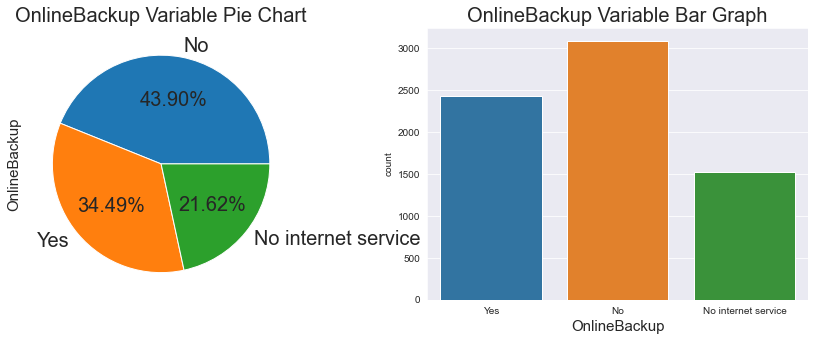

In [33]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

df['OnlineBackup'].value_counts().plot.pie(autopct = '%1.2f%%', fontsize = 20, ax = axes[0])
sns.countplot('OnlineBackup', data=df, ax = axes[1])

axes[0].set_title('OnlineBackup Variable Pie Chart', fontsize = 20)
axes[0].set_ylabel('OnlineBackup', fontsize = 15)

axes[1].set_title('OnlineBackup Variable Bar Graph', fontsize = 20)
axes[1].set_xlabel('OnlineBackup', fontsize = 15)

plt.show()

Apart from 21.62% not opted for Internet service - OnlineBackup is opted by 34.49% and not by 43.90%

##### DeviceProtection

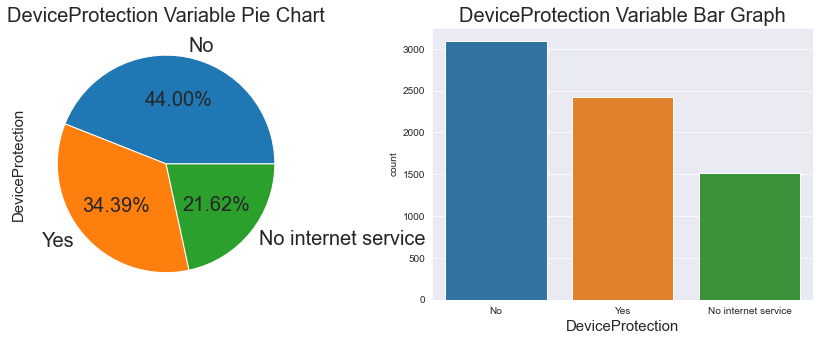

In [34]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

df['DeviceProtection'].value_counts().plot.pie(autopct = '%1.2f%%', fontsize = 20, ax = axes[0])
sns.countplot('DeviceProtection', data=df, ax = axes[1])

axes[0].set_title('DeviceProtection Variable Pie Chart', fontsize = 20)
axes[0].set_ylabel('DeviceProtection', fontsize = 15)

axes[1].set_title('DeviceProtection Variable Bar Graph', fontsize = 20)
axes[1].set_xlabel('DeviceProtection', fontsize = 15)

plt.show()

Apart from 21.62% not opted for Internet service - DeviceProtection is opted by 34.39% and not by 44.00%

##### TechSupport

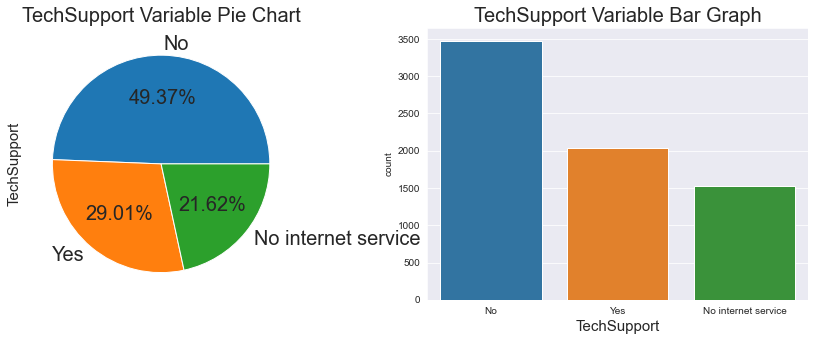

In [35]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

df['TechSupport'].value_counts().plot.pie(autopct = '%1.2f%%', fontsize = 20, ax = axes[0])
sns.countplot('TechSupport', data=df, ax = axes[1])

axes[0].set_title('TechSupport Variable Pie Chart', fontsize = 20)
axes[0].set_ylabel('TechSupport', fontsize = 15)

axes[1].set_title('TechSupport Variable Bar Graph', fontsize = 20)
axes[1].set_xlabel('TechSupport', fontsize = 15)

plt.show()

Apart from 21.62% not opted for Internet service - TechSupport is opted by 29.01% and not by 49.37%

##### StreamingTV

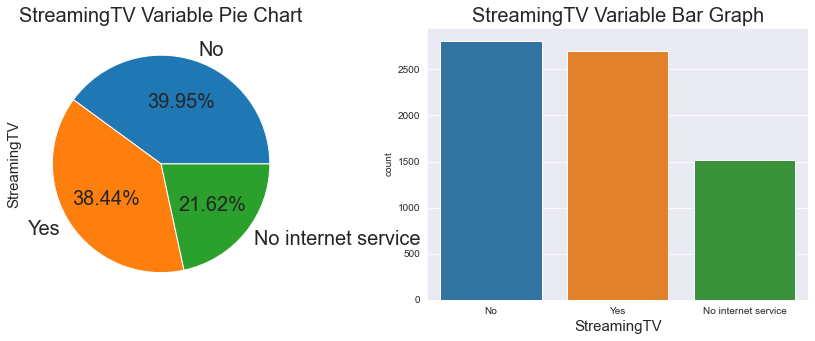

In [36]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

df['StreamingTV'].value_counts().plot.pie(autopct = '%1.2f%%', fontsize = 20, ax = axes[0])
sns.countplot('StreamingTV', data=df, ax = axes[1])

axes[0].set_title('StreamingTV Variable Pie Chart', fontsize = 20)
axes[0].set_ylabel('StreamingTV', fontsize = 15)

axes[1].set_title('StreamingTV Variable Bar Graph', fontsize = 20)
axes[1].set_xlabel('StreamingTV', fontsize = 15)

plt.show()

Apart from 21.62% not opted for Internet service - StreamingTV is opted by 38.44% and not by 39.95%

##### StreamingMovies

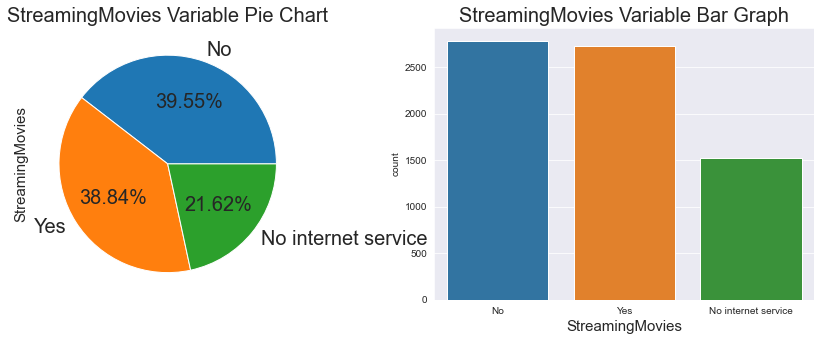

In [37]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

df['StreamingMovies'].value_counts().plot.pie(autopct = '%1.2f%%', fontsize = 20, ax = axes[0])
sns.countplot('StreamingMovies', data=df, ax = axes[1])

axes[0].set_title('StreamingMovies Variable Pie Chart', fontsize = 20)
axes[0].set_ylabel('StreamingMovies', fontsize = 15)

axes[1].set_title('StreamingMovies Variable Bar Graph', fontsize = 20)
axes[1].set_xlabel('StreamingMovies', fontsize = 15)

plt.show()

Apart from 21.62% not opted for Internet service - StreamingMovies is opted by 38.84% and not by 39.55%

##### Contract

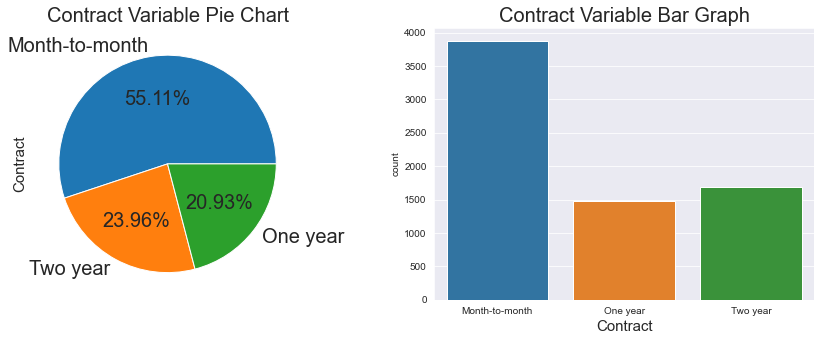

In [38]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

df['Contract'].value_counts().plot.pie(autopct = '%1.2f%%', fontsize = 20, ax = axes[0])
sns.countplot('Contract', data=df, ax = axes[1])

axes[0].set_title('Contract Variable Pie Chart', fontsize = 20)
axes[0].set_ylabel('Contract', fontsize = 15)

axes[1].set_title('Contract Variable Bar Graph', fontsize = 20)
axes[1].set_xlabel('Contract', fontsize = 15)

plt.show()

Contract for one year is 20.93%, two year is 23.96% and month-to-month is 55.11% which is the highest

##### PaperlessBilling

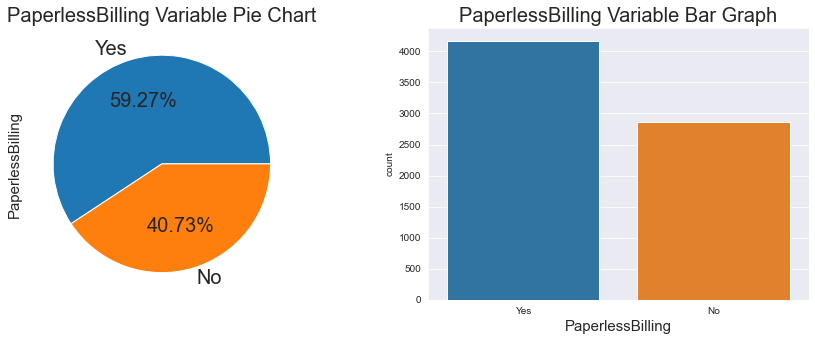

In [39]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

df['PaperlessBilling'].value_counts().plot.pie(autopct = '%1.2f%%', fontsize = 20, ax = axes[0])
sns.countplot('PaperlessBilling', data=df, ax = axes[1])

axes[0].set_title('PaperlessBilling Variable Pie Chart', fontsize = 20)
axes[0].set_ylabel('PaperlessBilling', fontsize = 15)

axes[1].set_title('PaperlessBilling Variable Bar Graph', fontsize = 20)
axes[1].set_xlabel('PaperlessBilling', fontsize = 15)

plt.show()

59.27% opted for PaperlessBilling and No by 40.73%

##### PaymentMethod

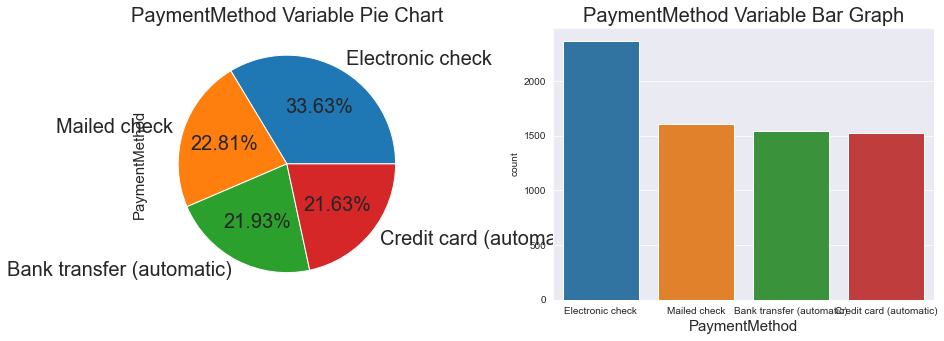

In [40]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

df['PaymentMethod'].value_counts().plot.pie(autopct = '%1.2f%%', fontsize = 20, ax = axes[0])
sns.countplot('PaymentMethod', data=df, ax = axes[1])

axes[0].set_title('PaymentMethod Variable Pie Chart', fontsize = 20)
axes[0].set_ylabel('PaymentMethod', fontsize = 15)

axes[1].set_title('PaymentMethod Variable Bar Graph', fontsize = 20)
axes[1].set_xlabel('PaymentMethod', fontsize = 15)

plt.show()

- ** Percentage opted in PaymentMethod
- Electronic check - 33.63%
- Mailed Check - 22.81%
- Bank transfer(automatic) - 21.93%
- Credit card (automatic) - 21.63%

##### Churn

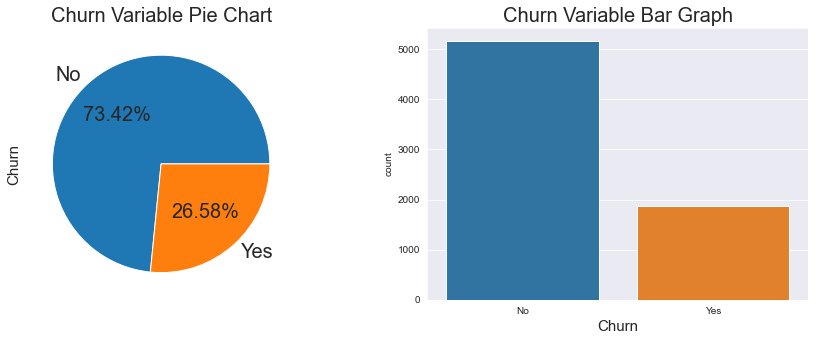

In [41]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

df['Churn'].value_counts().plot.pie(autopct = '%1.2f%%', fontsize = 20, ax = axes[0])
sns.countplot('Churn', data=df, ax = axes[1])

axes[0].set_title('Churn Variable Pie Chart', fontsize = 20)
axes[0].set_ylabel('Churn', fontsize = 15)

axes[1].set_title('Churn Variable Bar Graph', fontsize = 20)
axes[1].set_xlabel('Churn', fontsize = 15)

plt.show()

Customer who churn are 26.58% while 73.42% remain

## Bi Variate Analysis

### Numerical vs Category

#### Churn vs tenure

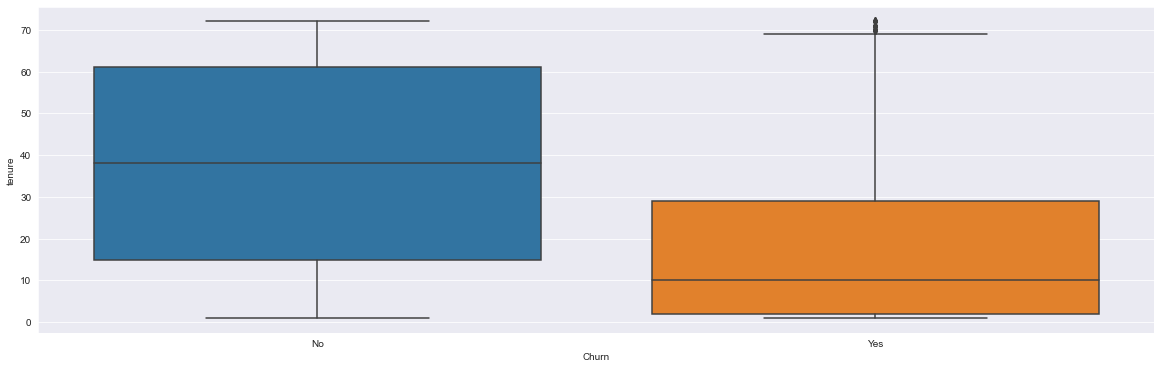

In [42]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()

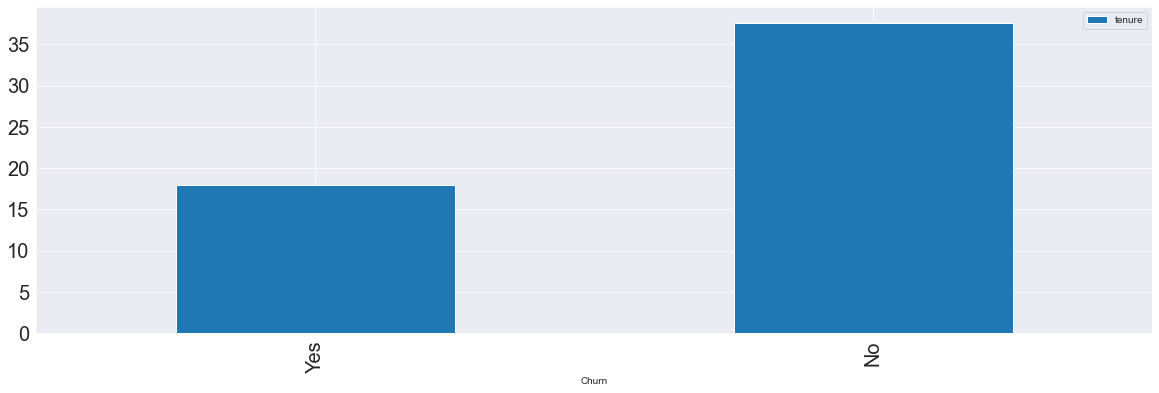

In [43]:
df.groupby(by=['Churn'])['tenure'].mean().reset_index().sort_values(['tenure']).tail(10).plot(x='Churn',
                                                                                                y='tenure',
                                                                                                kind='bar',
                                                                                                fontsize = 20,
                                                                                                figsize=(20,6))

plt.show()

No value is more than Yes in tenure along with mean

#### Churn vs MonthlyCharges

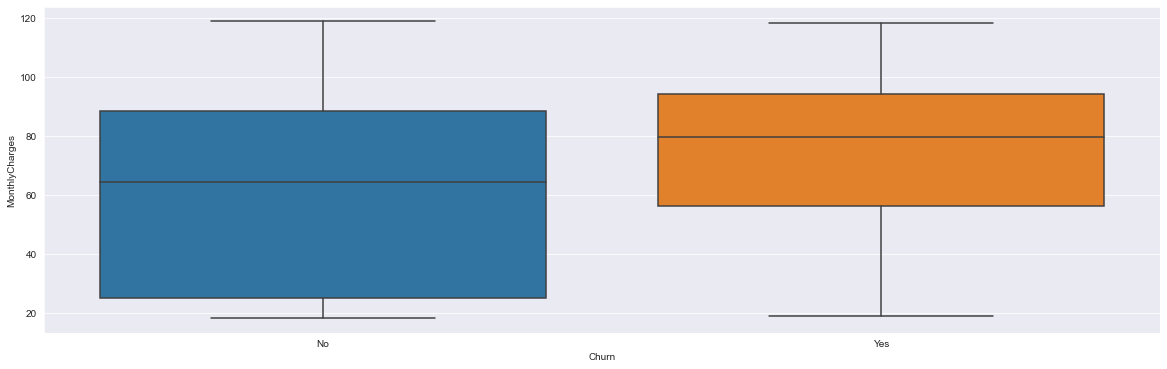

In [44]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Churn',y='MonthlyCharges', data=df)
plt.show()

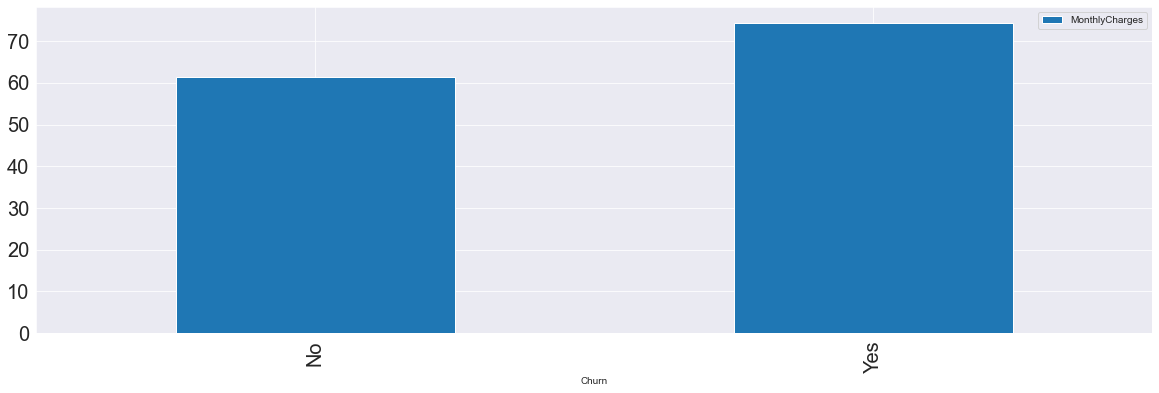

In [45]:
df.groupby(by=['Churn'])['MonthlyCharges'].mean().reset_index().sort_values(['MonthlyCharges']).tail(10).plot(x='Churn',
                                                                                                           y='MonthlyCharges',
                                                                                                           kind='bar',
                                                                                                              fontsize = 20,
                                                                                                           figsize=(20,6))

plt.show()

No is more in MonthlyCharges than Yes; mean for yes is more than No

#### Churn vs TotalCharges

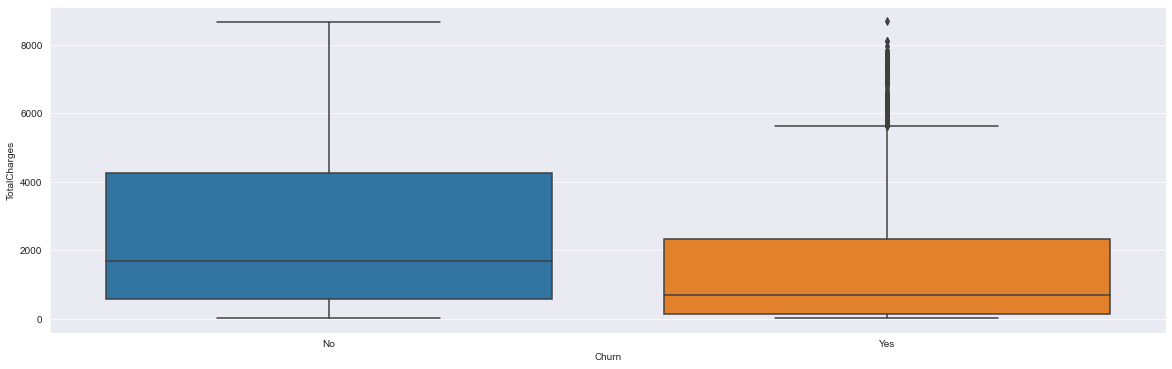

In [46]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Churn',y='TotalCharges', data=df)
plt.show()

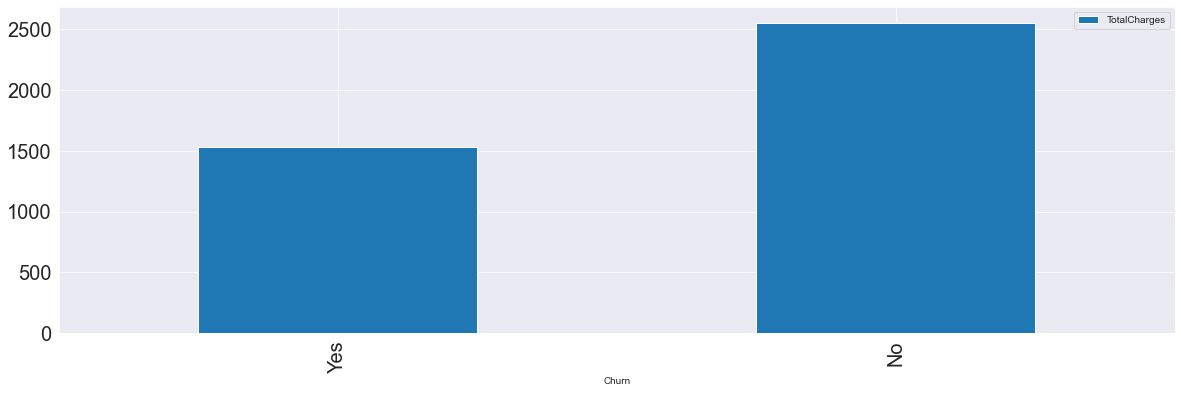

In [47]:
df.groupby(by=['Churn'])['TotalCharges'].mean().reset_index().sort_values(['TotalCharges']).tail(10).plot(x='Churn',
                                                                                                           y='TotalCharges',
                                                                                                           kind='bar',
                                                                                                              fontsize = 20,
                                                                                                           figsize=(20,6))

plt.show()

NO is more in TotalCharges than Yes along with mean

### Numerical vs Numerical

#### TotalCharges vs tenure

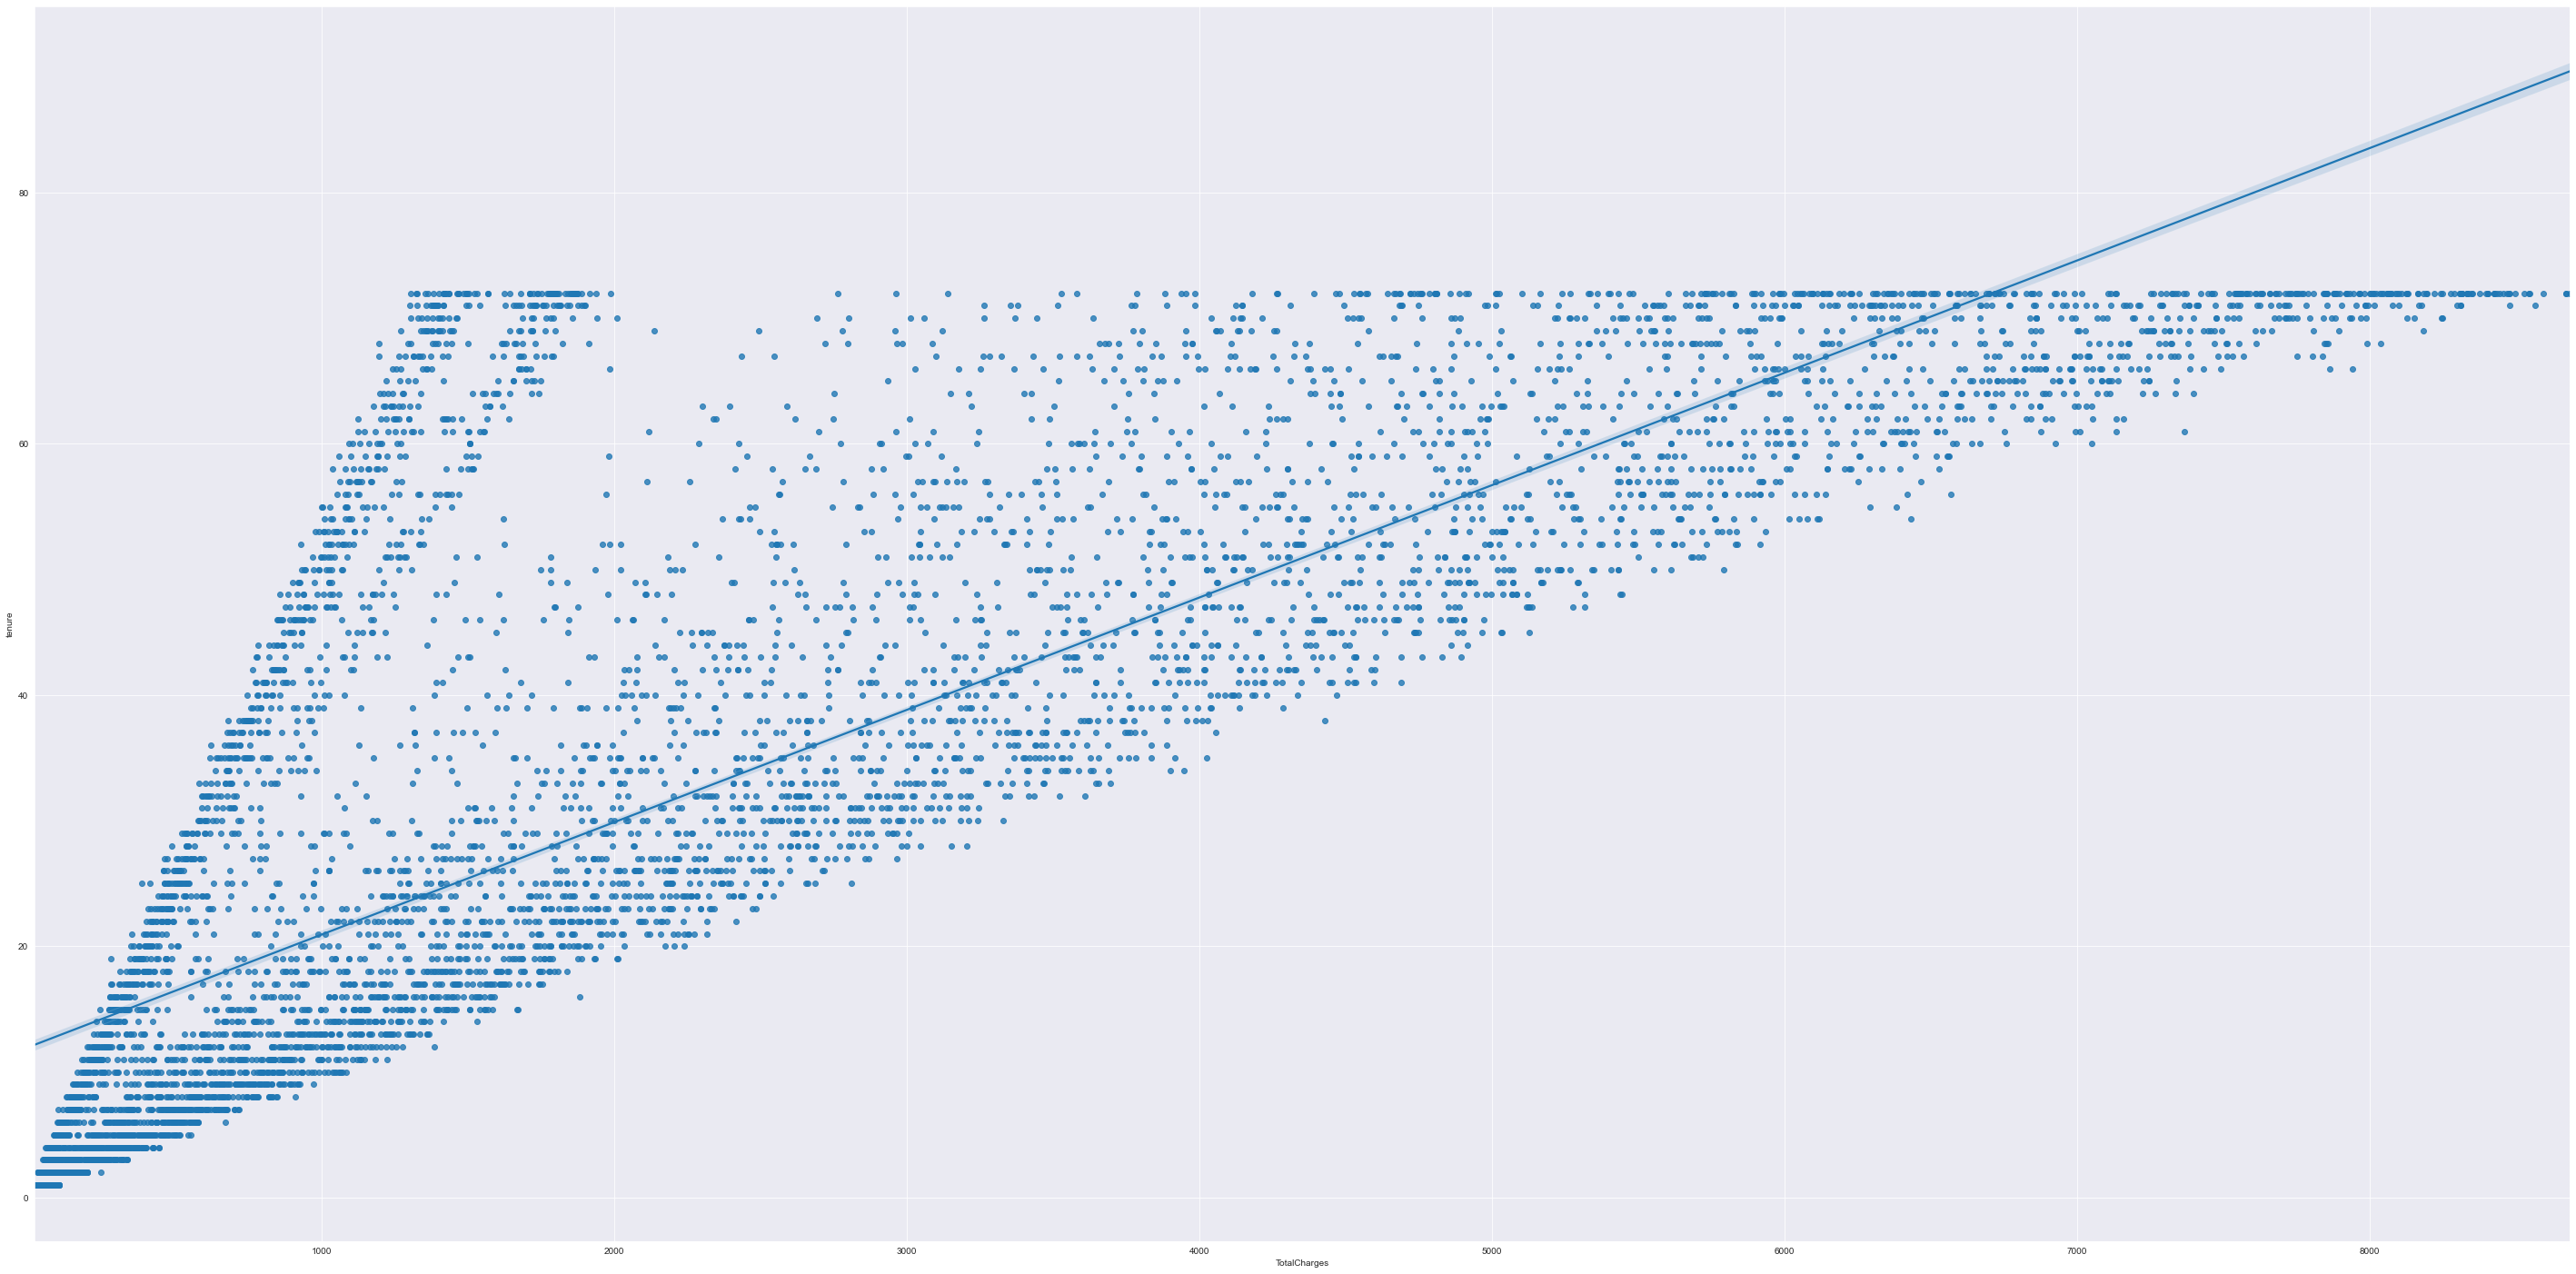

In [48]:
figure = plt.figure(figsize=(50,25))
# regression plot - scatter plot with a regression line
ax = sns.regplot(x='TotalCharges',y='tenure', data=df)

There is clear linear relationship between Total Charges and tenure.

#### TotalCharges vs MonthlyCharges

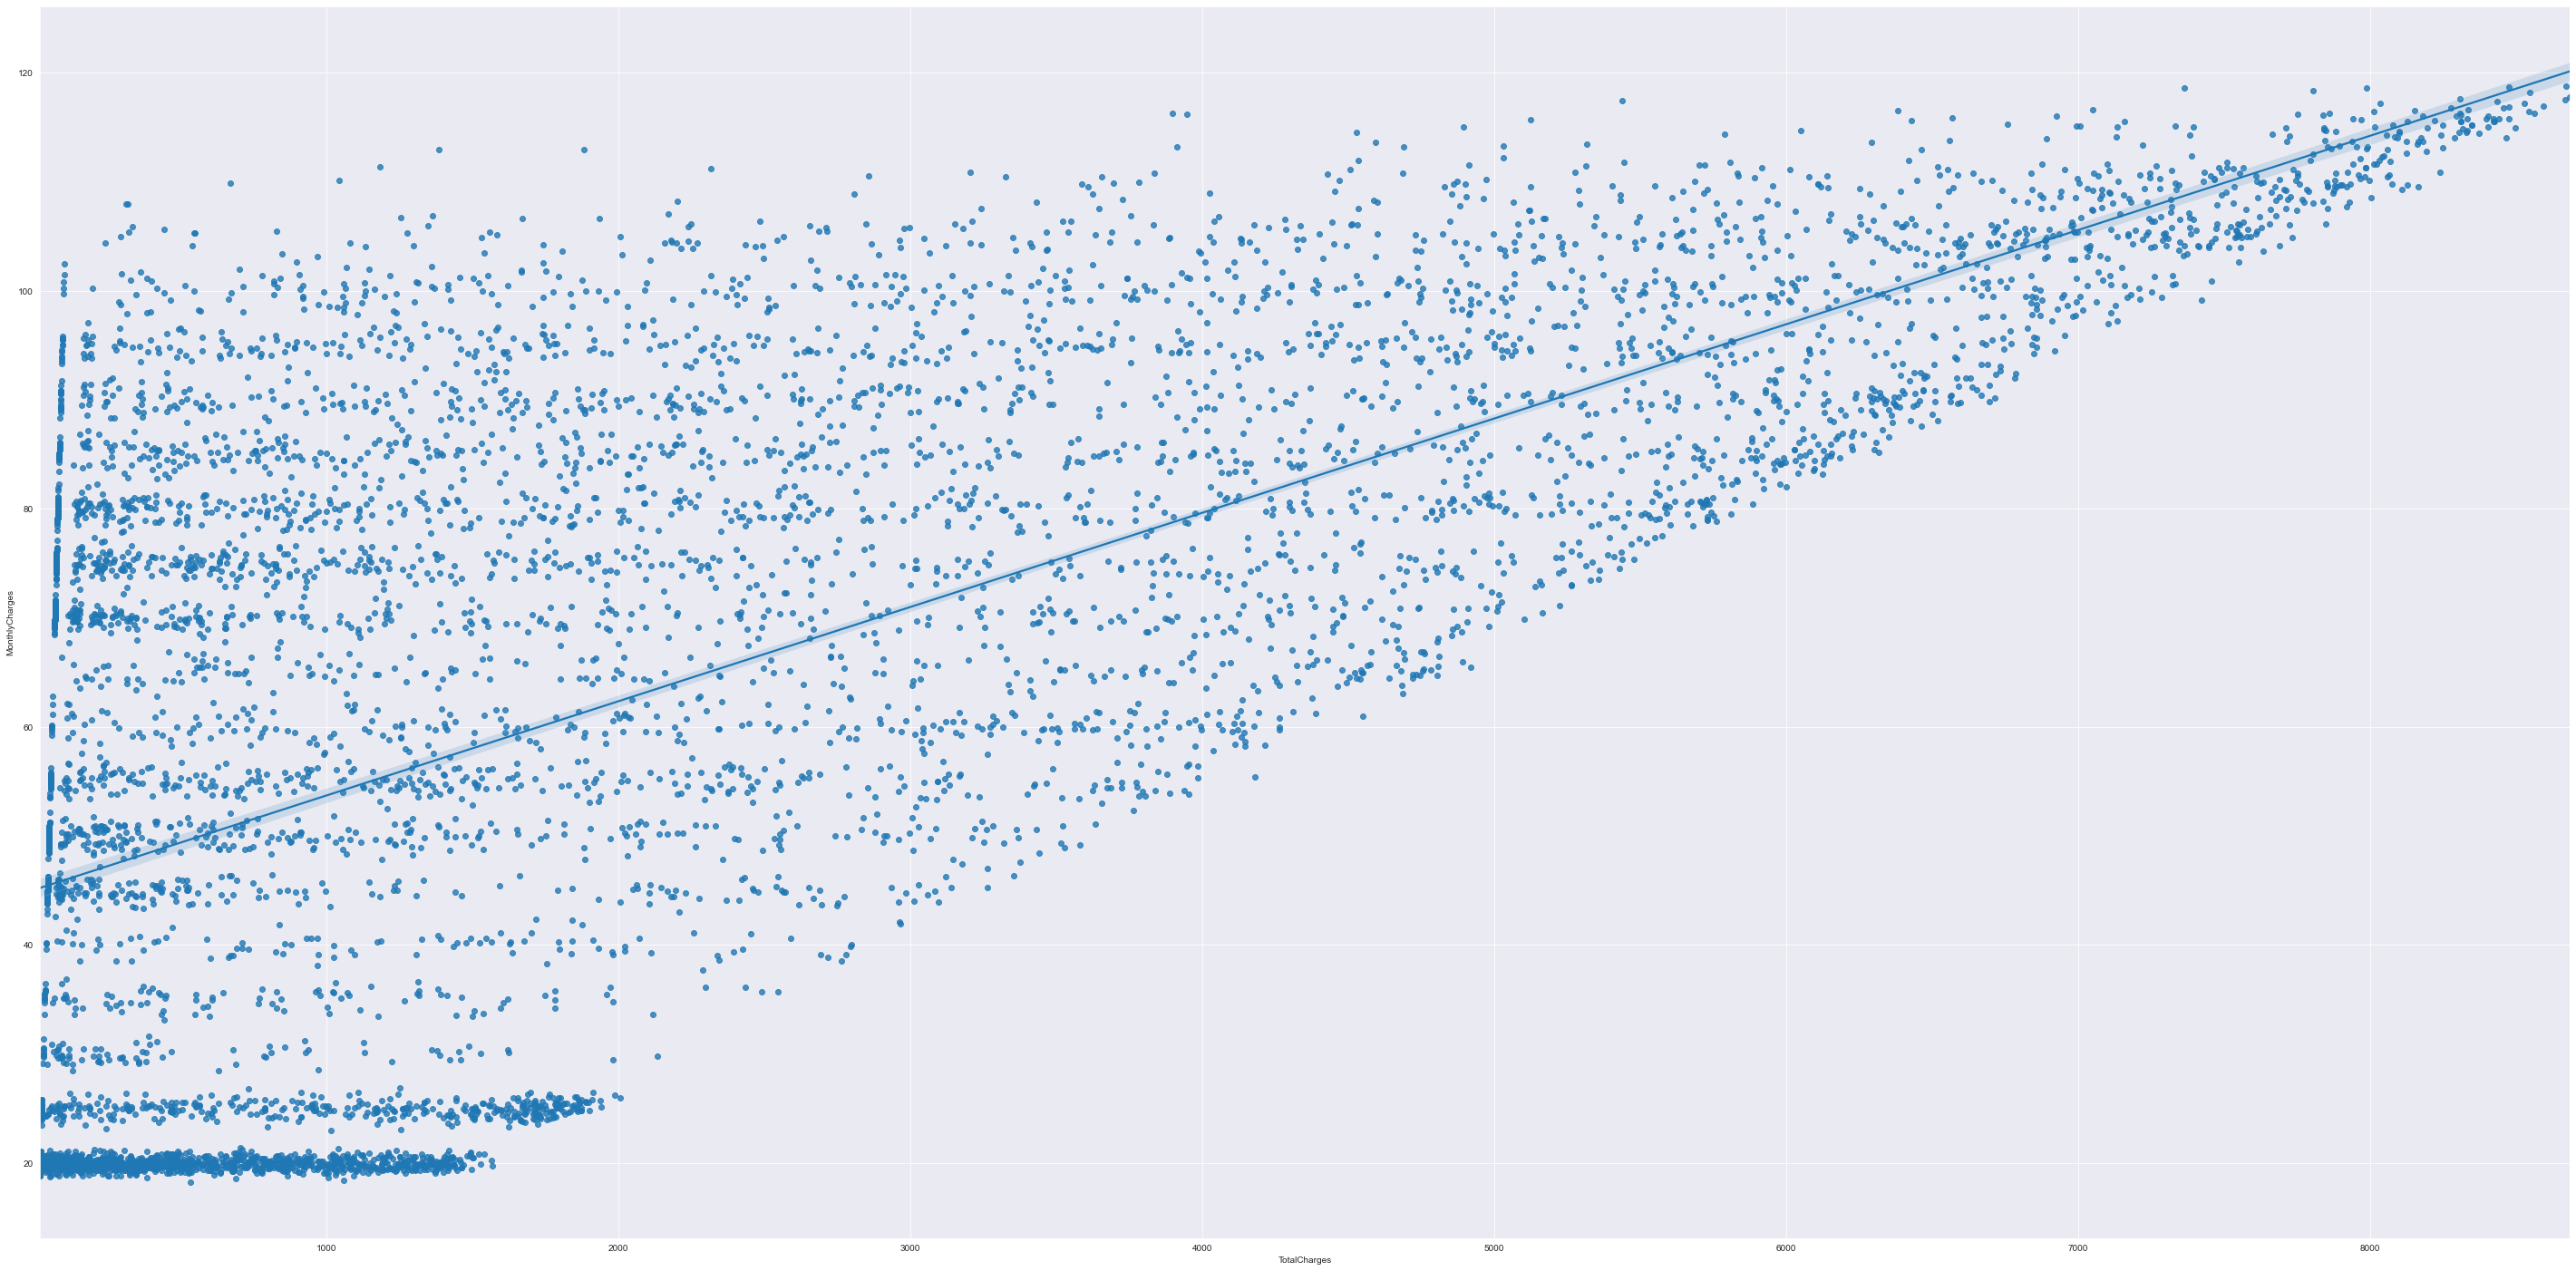

In [49]:
figure = plt.figure(figsize=(50,25))
# regression plot - scatter plot with a regression line
ax = sns.regplot(x='TotalCharges', y='MonthlyCharges', data=df) 

There is clear linear relationship between TotalCharges and MOnthlyCharges.

#### TotalCharges vs SeniorCitizen

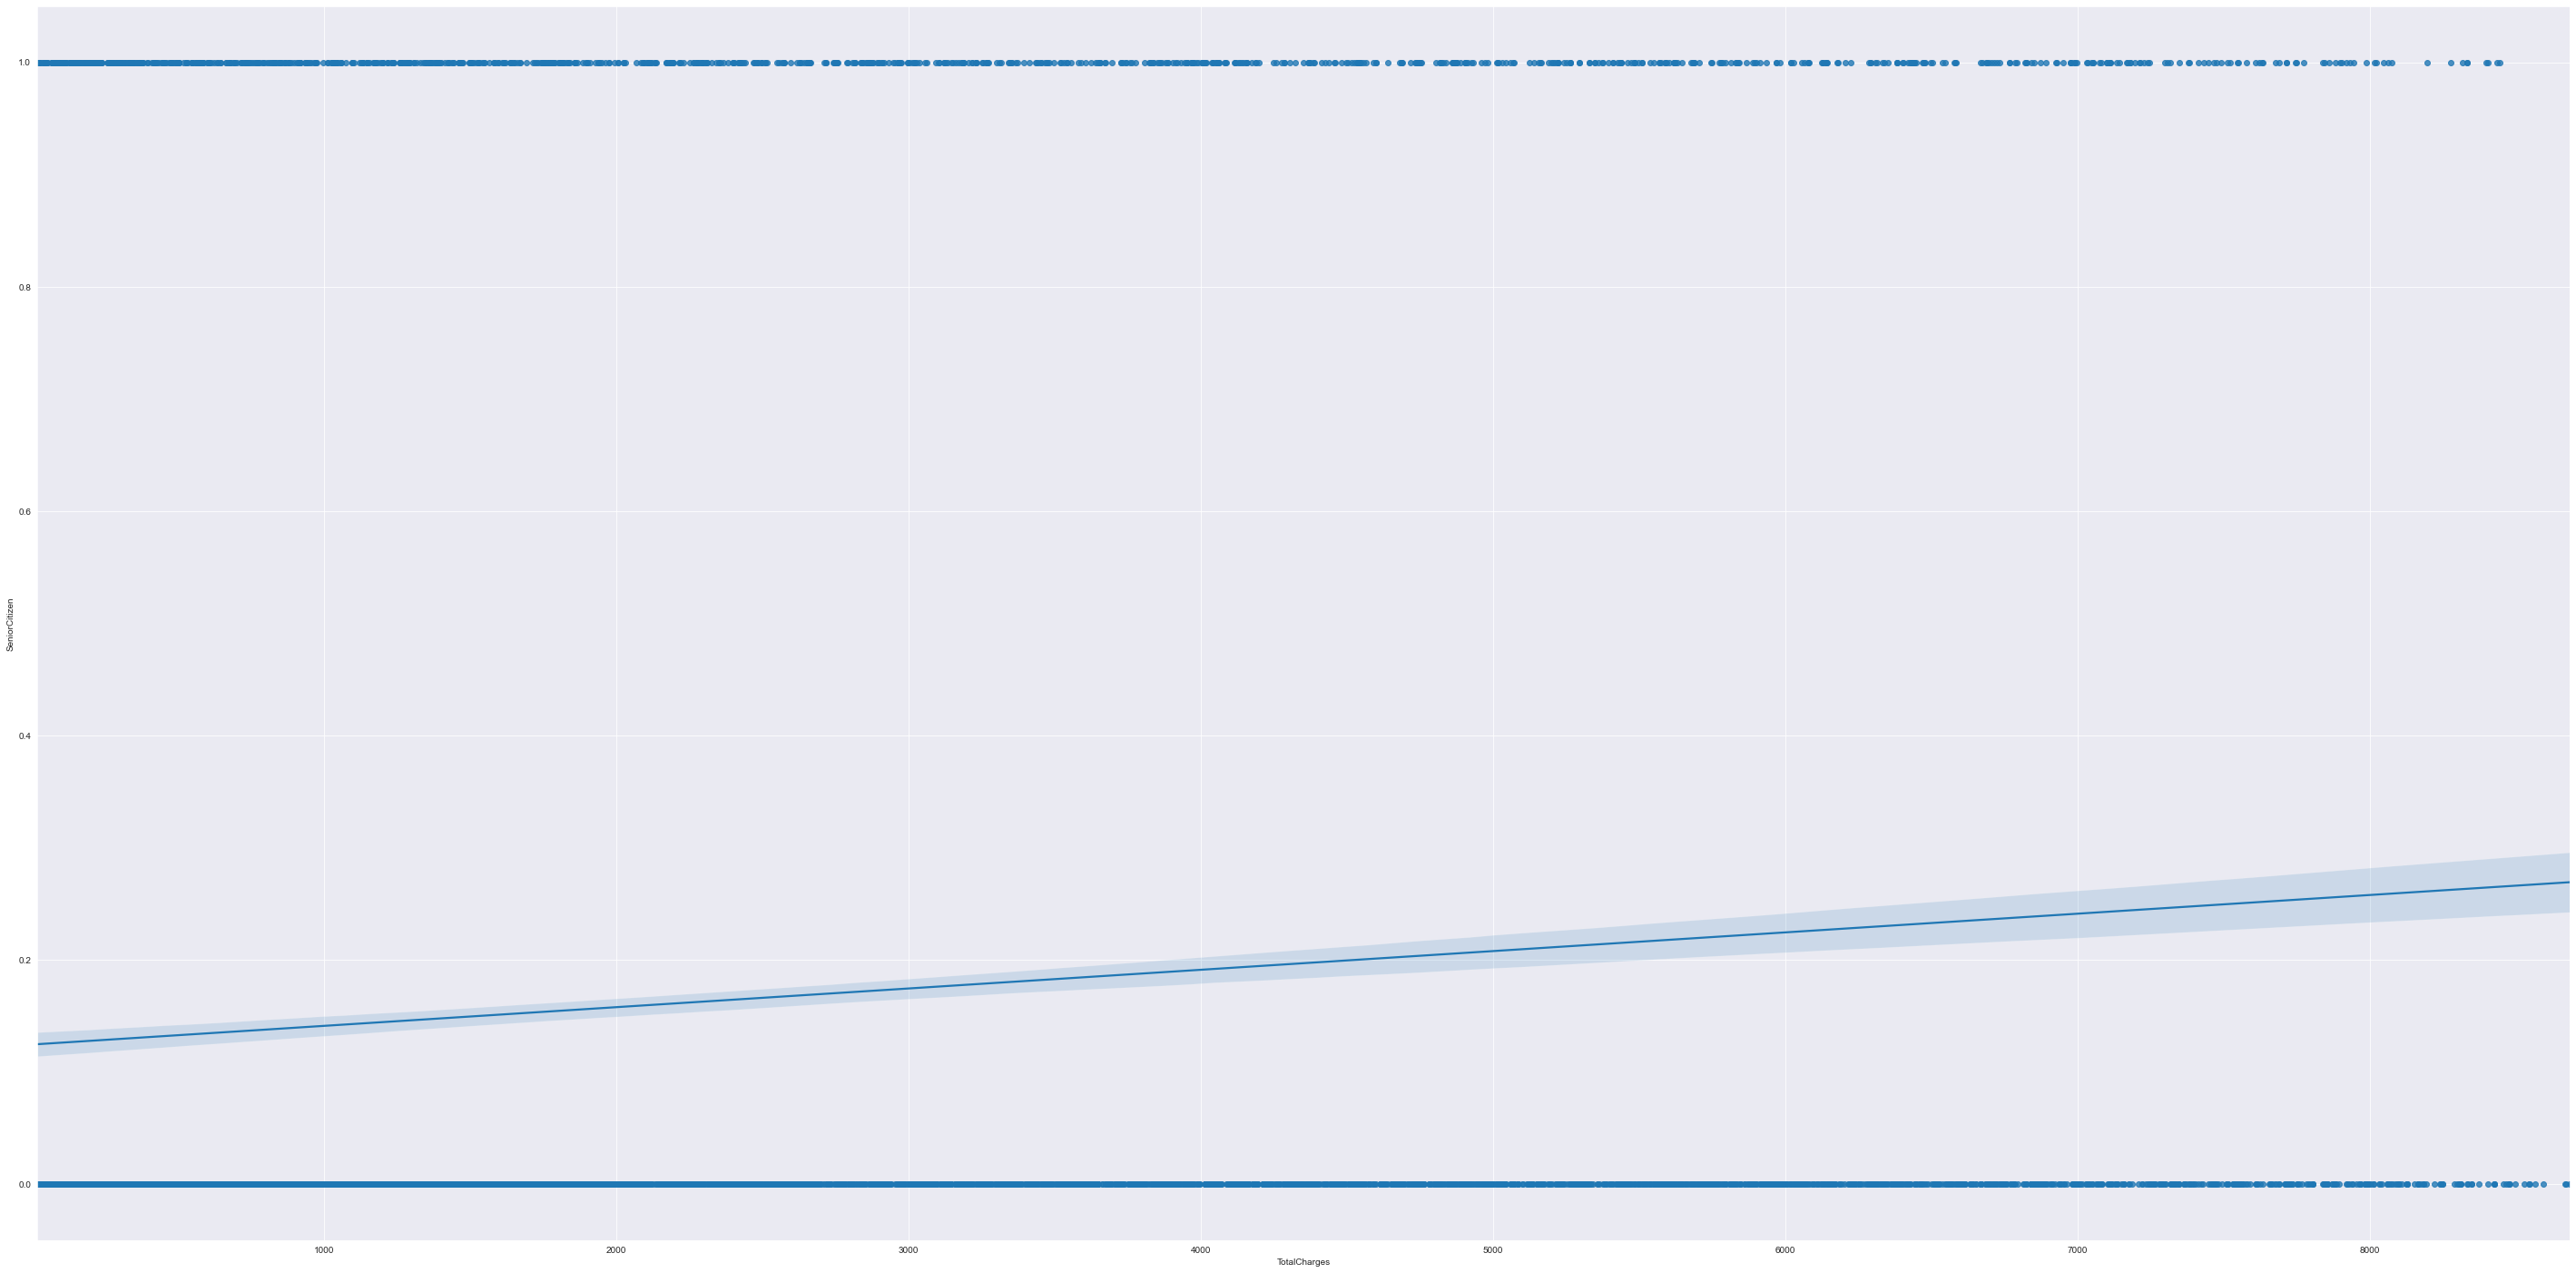

In [50]:
figure = plt.figure(figsize=(50,25))
#regression plot - scatter plot with a regression line
ax=sns.regplot(x='TotalCharges', y='SeniorCitizen', data=df)

TotalCharges has slight relationship with SeniorCitizen

#### tenure vs MonthlyCharges

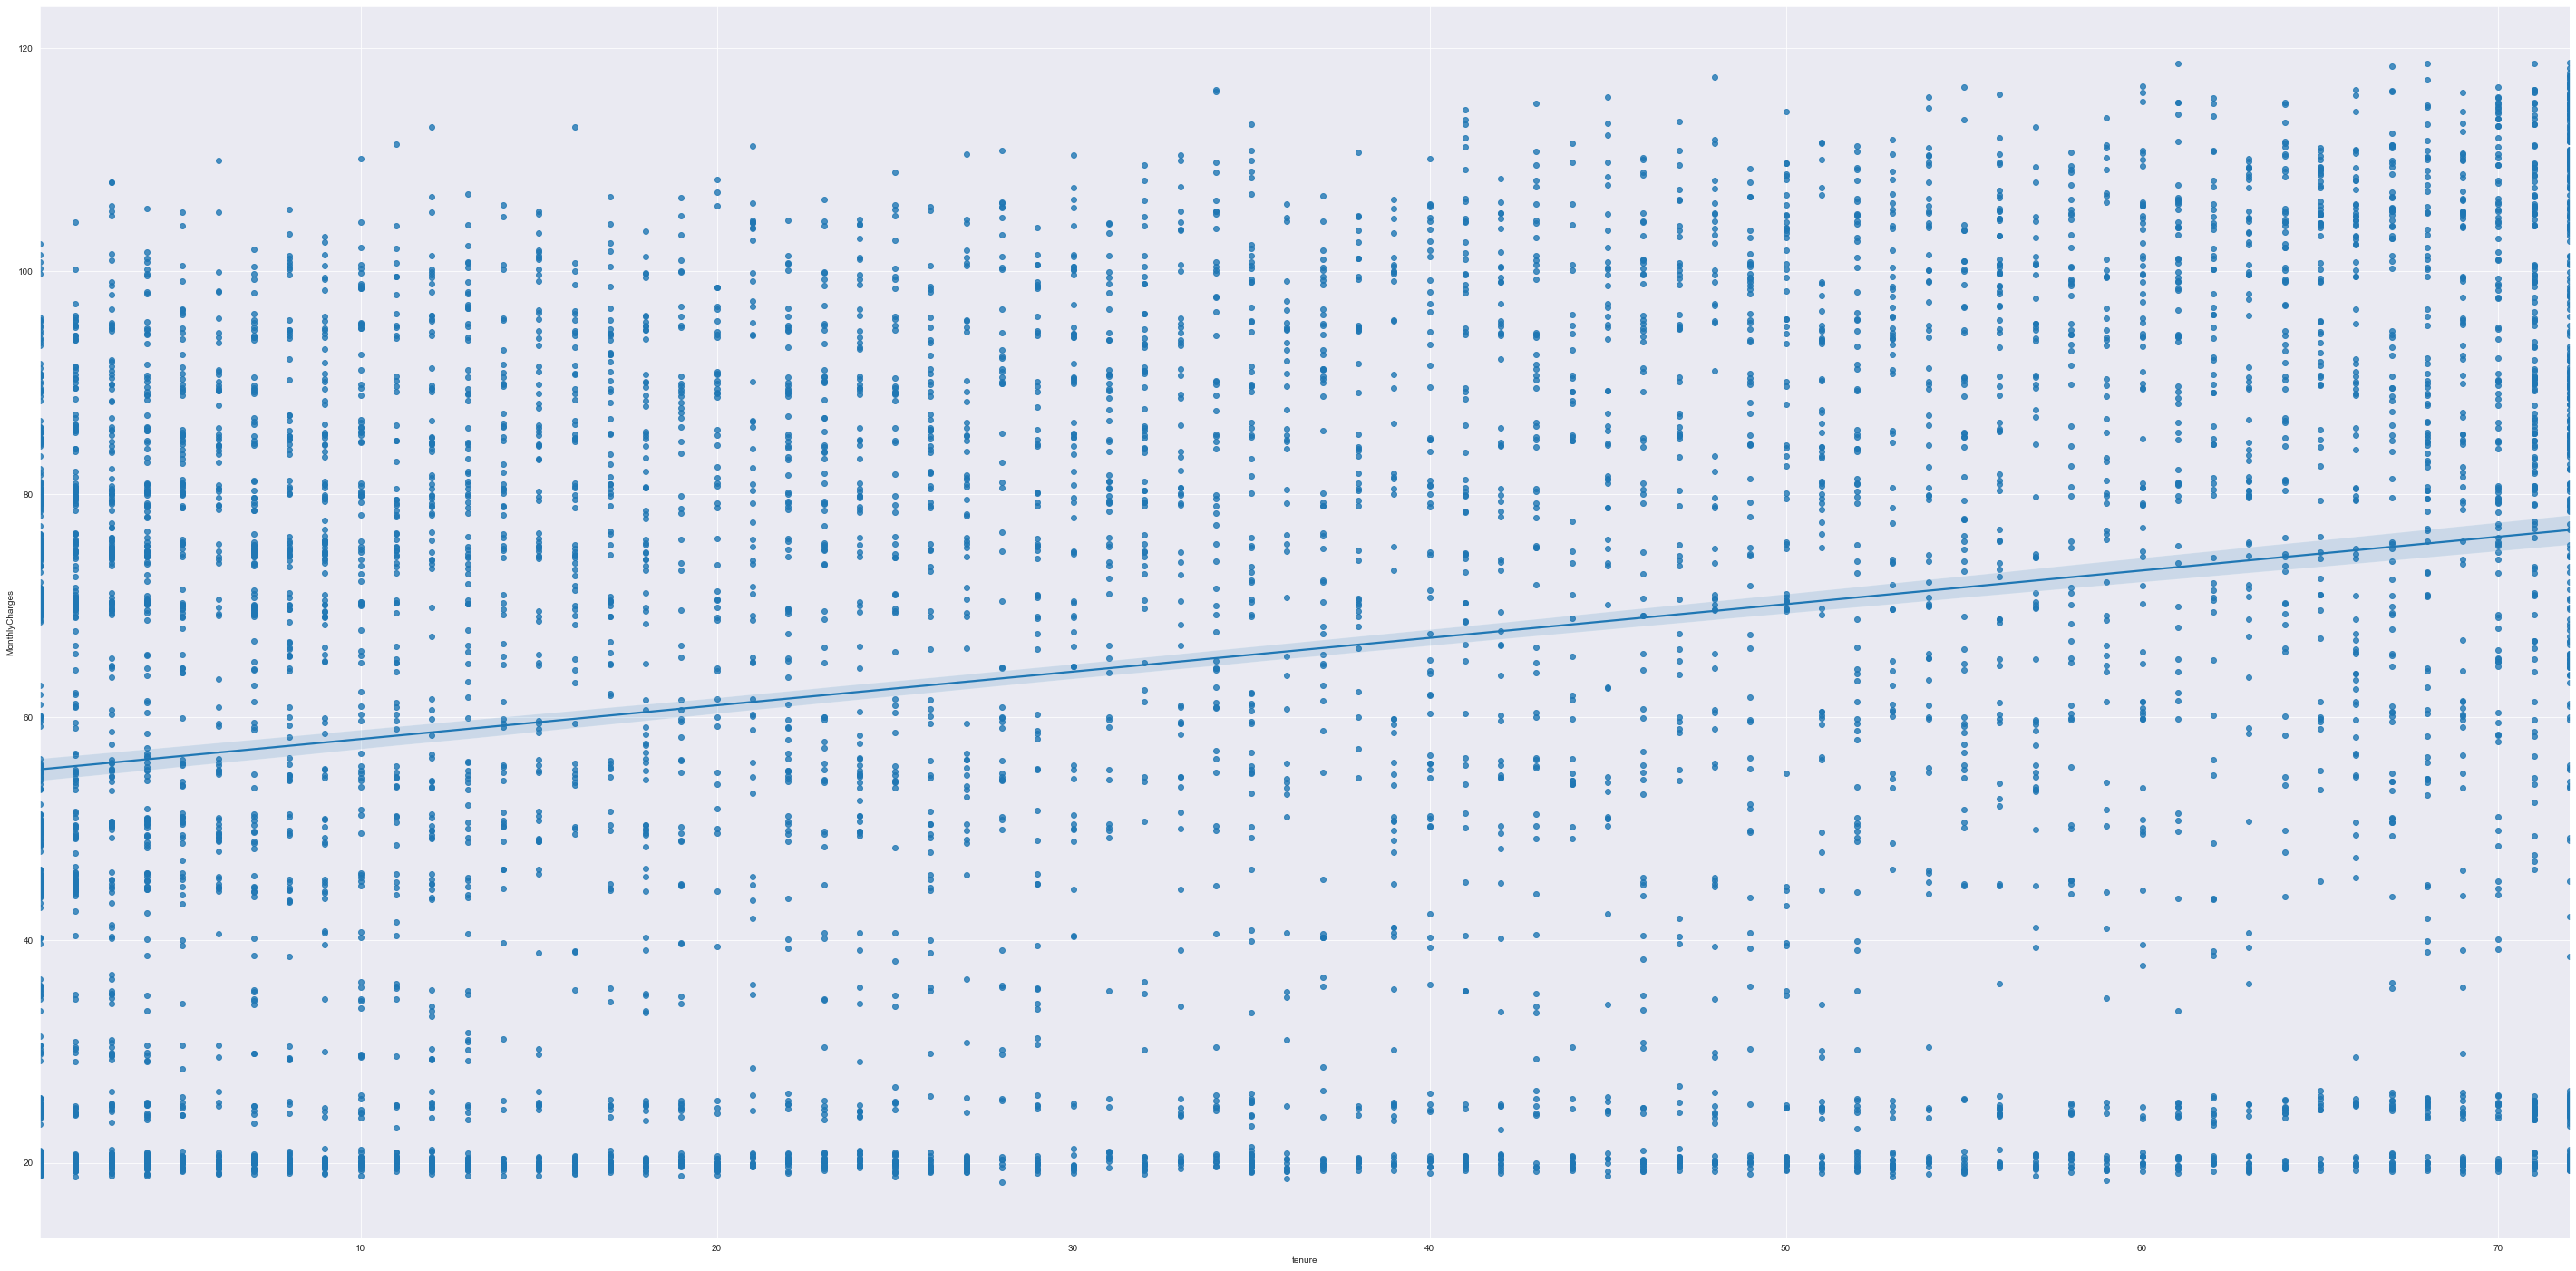

In [51]:
figure = plt.figure(figsize=(50,25))
# regression plot - scatter plot with a regression line
ax = sns.regplot(x='tenure', y='MonthlyCharges', data=df) 

There is a relationship between tenure and MonthlyCharges

#### Correlation among pairs of continuous variables

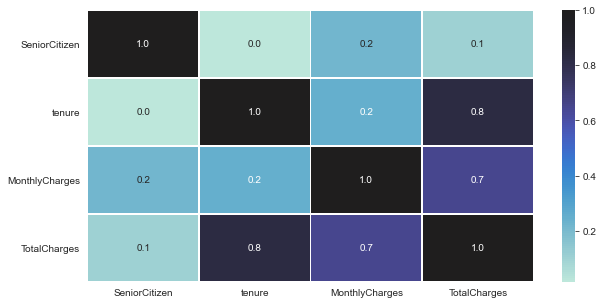

In [52]:
plt.figure(figsize=(10,5))
#heatmap
sns.heatmap(df.corr(), annot=True, linewidth=.5, fmt='.1f', center=1)
plt.show()

Monthly Charges and TotalCharges has correlation as 0.7.
Monthly Charges with tenure and SeniorCitizen  has little correlation as 0.2
Total Charges with SeniorCitizen has slight correlation as 0.1


### Category vs Category

#### Gender vs Churn

<AxesSubplot:xlabel='gender', ylabel='count'>

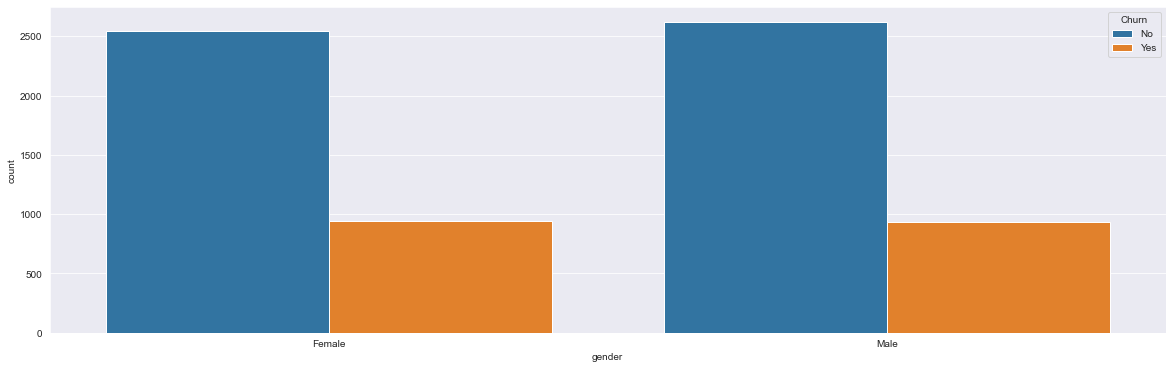

In [53]:
plt.figure(figsize=(20,6))
sns.countplot(df['gender'], hue=df['Churn'])

In both Males & Females, No is more and almost equivalent for Yes

#### SeniorCitizen vs Churn

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

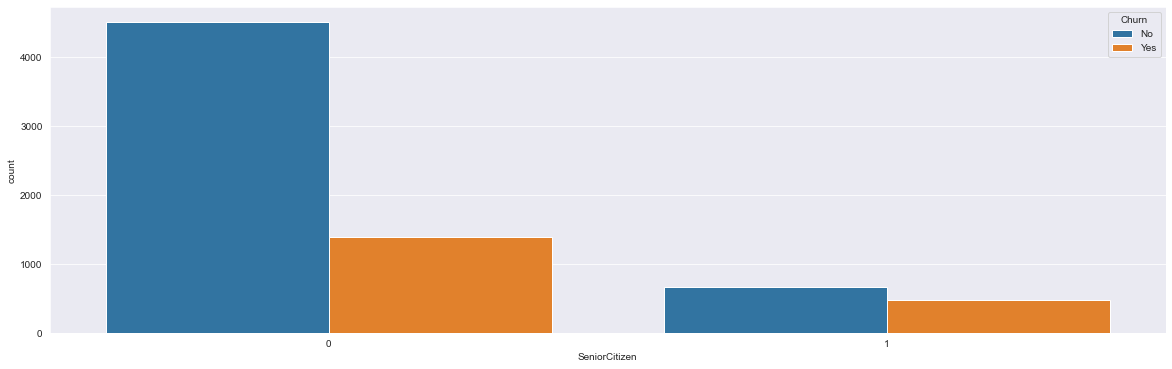

In [54]:
plt.figure(figsize=(20,6))
sns.countplot(df['SeniorCitizen'], hue=df['Churn'])

Churn is more for Non-SeniorCitizens than SeniorCitizens

#### Partner vs Churn

<AxesSubplot:xlabel='Partner', ylabel='count'>

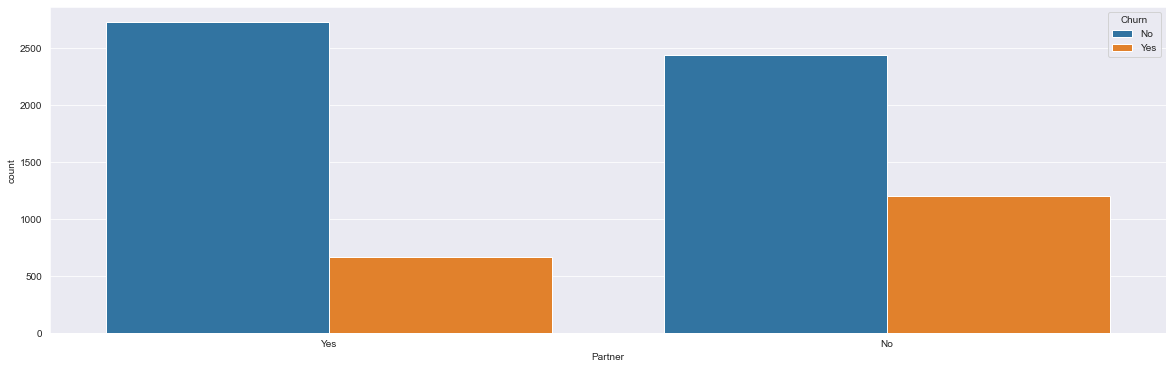

In [55]:
plt.figure(figsize=(20,6))
sns.countplot(df['Partner'],hue=df['Churn'])

Non Partners Churn is more than Partners

#### Dependents vs Churn

<AxesSubplot:xlabel='Dependents', ylabel='count'>

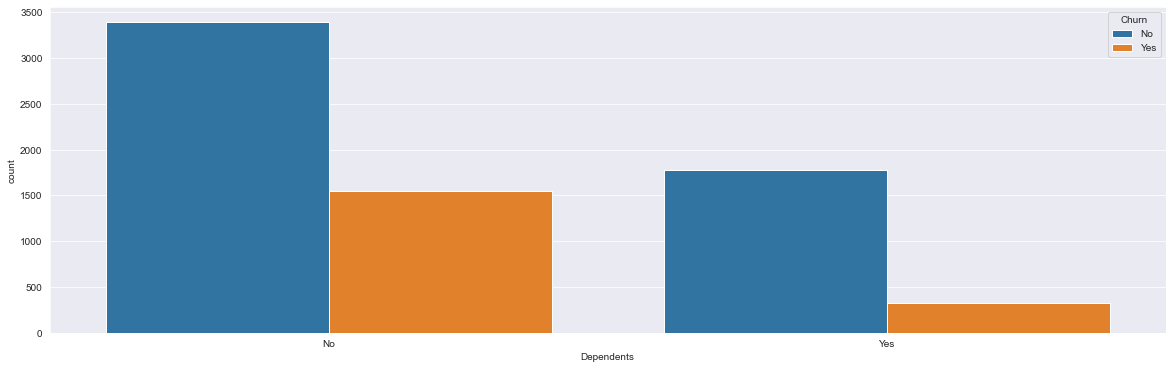

In [56]:
plt.figure(figsize=(20,6))
sns.countplot(df['Dependents'],hue=df['Churn'])

Non-dependents churn is more than dependents

#### PhoneService vs Churn

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

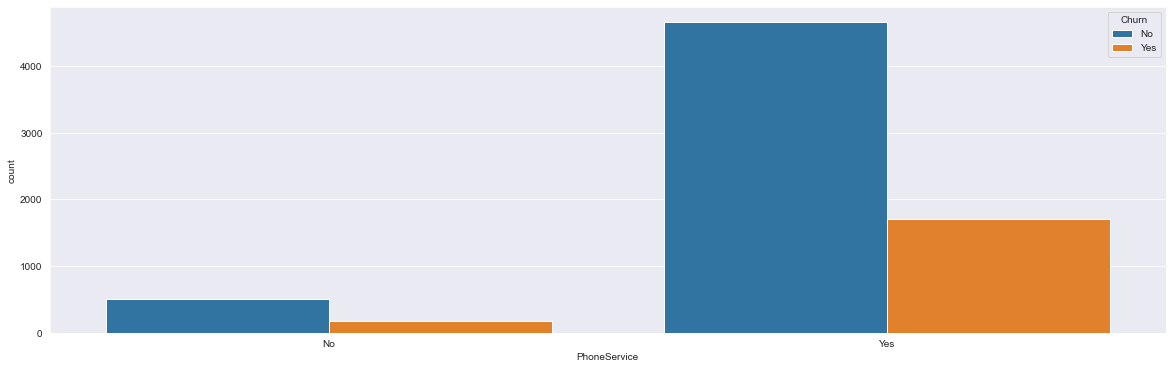

In [57]:
plt.figure(figsize=(20,6))
sns.countplot(df['PhoneService'],hue=df['Churn'])

Churn is more in who opted for PhoneService than Non-PhoneService

#### MultipleLines vs Churn

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

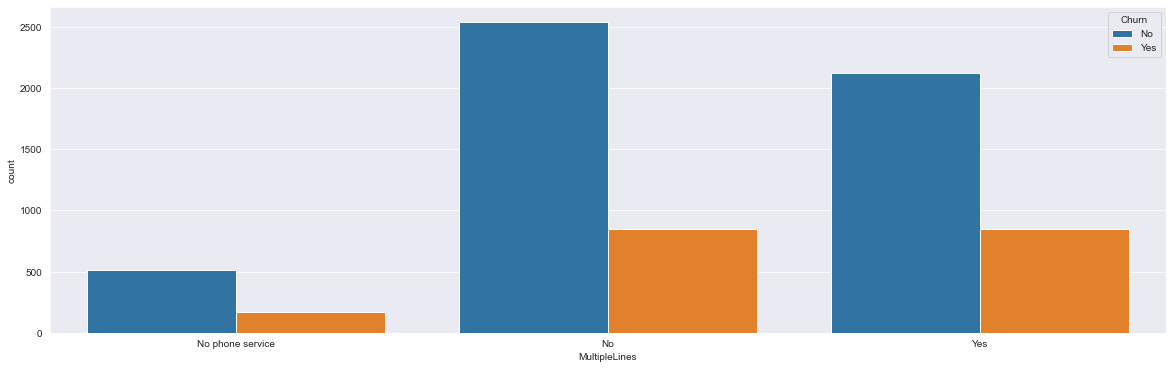

In [58]:
plt.figure(figsize=(20,6))
sns.countplot(df['MultipleLines'],hue=df['Churn'])

Churn is almost equivalent in who have opted & not opted for MultipleLines and which far less in No Phone Service

#### InternetService vs Churn

<AxesSubplot:xlabel='InternetService', ylabel='count'>

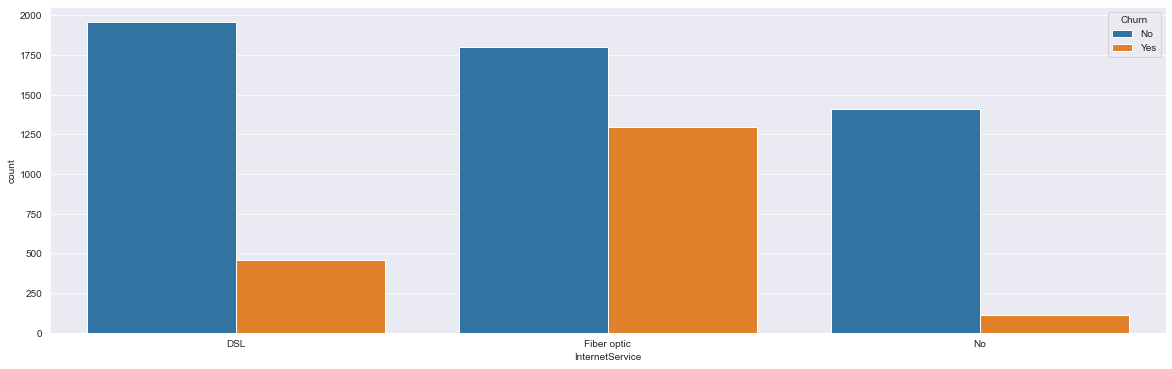

In [59]:
plt.figure(figsize=(20,6))
sns.countplot(df['InternetService'],hue=df['Churn'])

Churn is more in Fiber Optic than DSL in InternetService

#### OnlineSecurity vs Churn

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

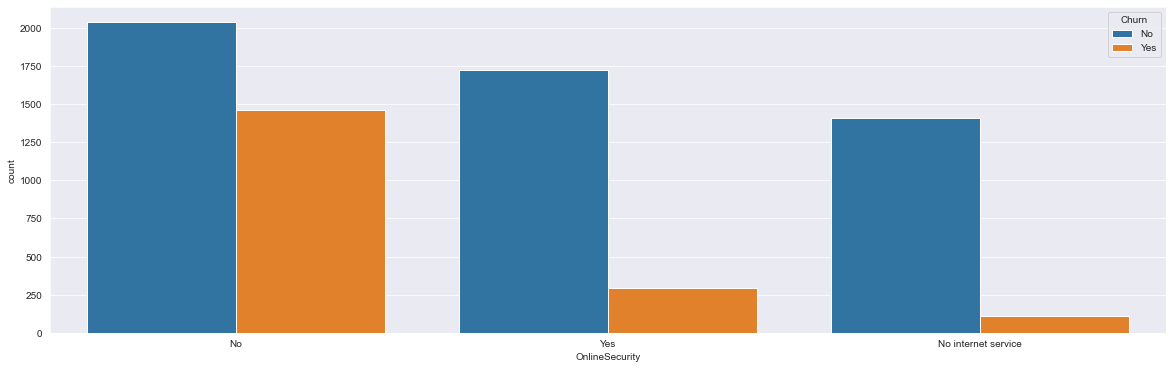

In [60]:
plt.figure(figsize=(20,6))
sns.countplot(df['OnlineSecurity'],hue=df['Churn'])

Churn is more in who have not opted for OnlineSEcurity followed by who opted by OnlineSEcurity and least by who have not opted internet service

#### OnlineBackup vs Churn

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

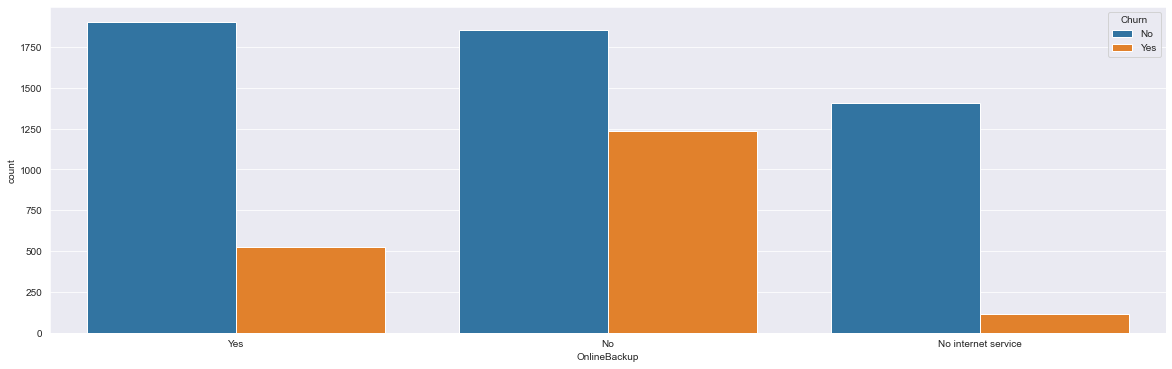

In [61]:
plt.figure(figsize=(20,6))
sns.countplot(df['OnlineBackup'],hue=df['Churn'])

Churn is more in who have not opted for OnlineBackup and who opted for ONlineBackup

#### DeviceProtection vs Churn

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

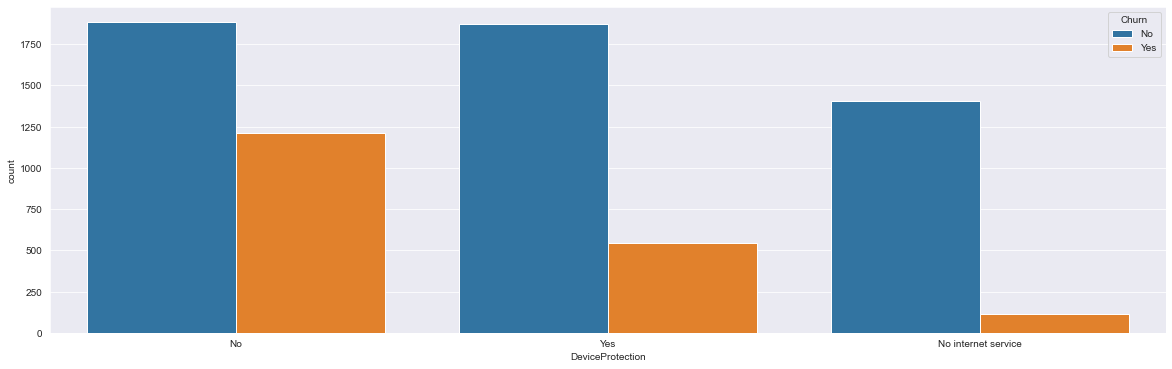

In [62]:
plt.figure(figsize=(20,6))
sns.countplot(df['DeviceProtection'],hue=df['Churn'])

Churn is more in who have not opted for Deviceprotection than who opted

#### TechSupport vs Churn

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

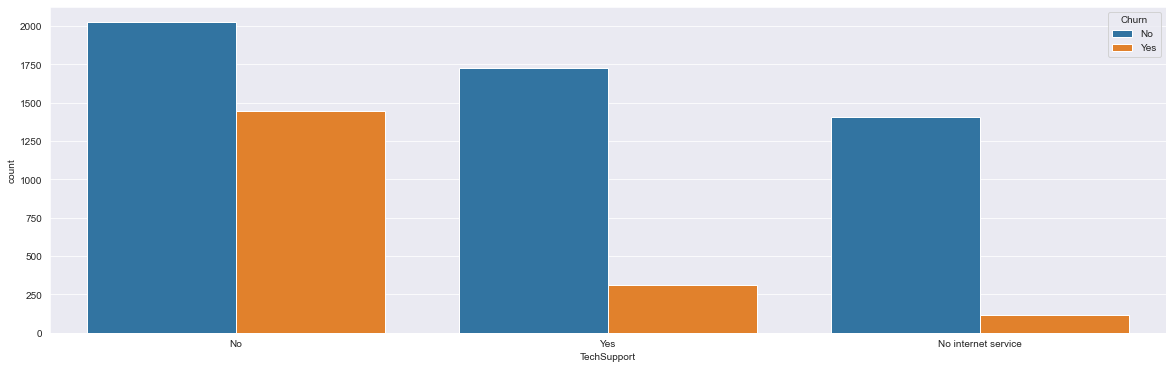

In [63]:
plt.figure(figsize=(20,6))
sns.countplot(df['TechSupport'],hue=df['Churn'])

Churn is more in who have not opted for TechSupport than who opted

#### StreamingTV vs Churn

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

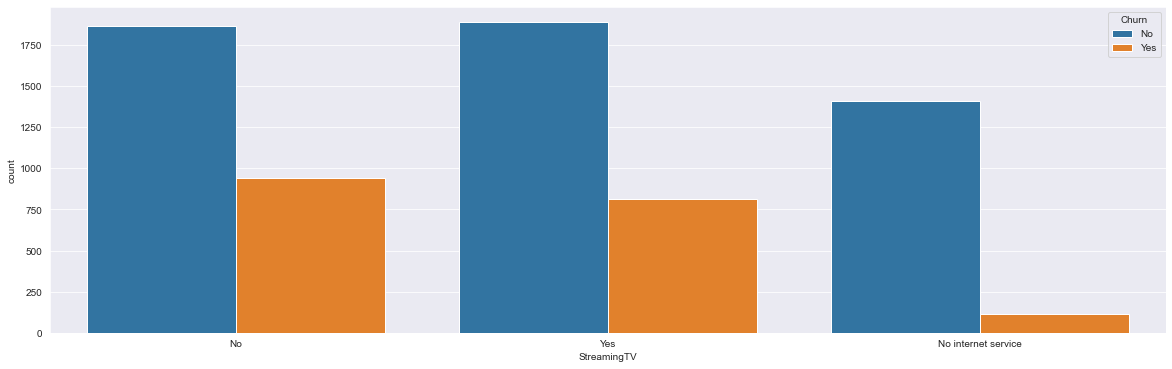

In [64]:
plt.figure(figsize=(20,6))
sns.countplot(df['StreamingTV'],hue=df['Churn'])

Churn is little more in who have not opted for StreamingTV than who have not opted

#### StreamingMovies vs Churn

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

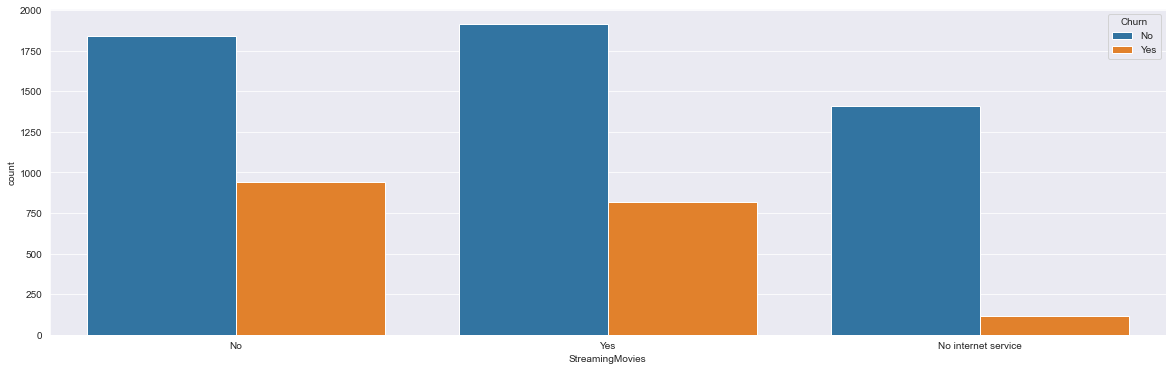

In [65]:
plt.figure(figsize=(20,6))
sns.countplot(df['StreamingMovies'],hue=df['Churn'])

Churn is little more in who have not opted for StreamingMovies than who have not opted

#### Contract vs Churn

<AxesSubplot:xlabel='Contract', ylabel='count'>

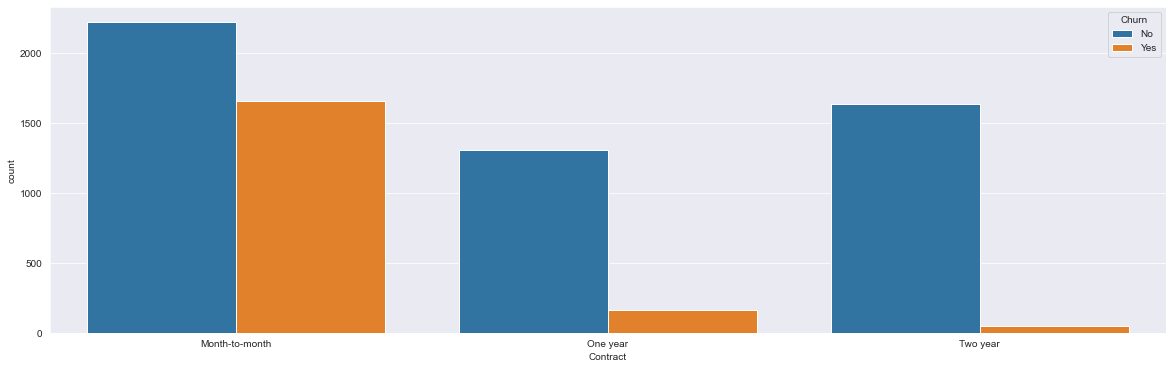

In [66]:
plt.figure(figsize=(20,6))
sns.countplot(df['Contract'],hue=df['Churn'])

Churn is more in who opted for Month-to-month followed by One year and two year

#### PaperlessBilling vs Churn

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

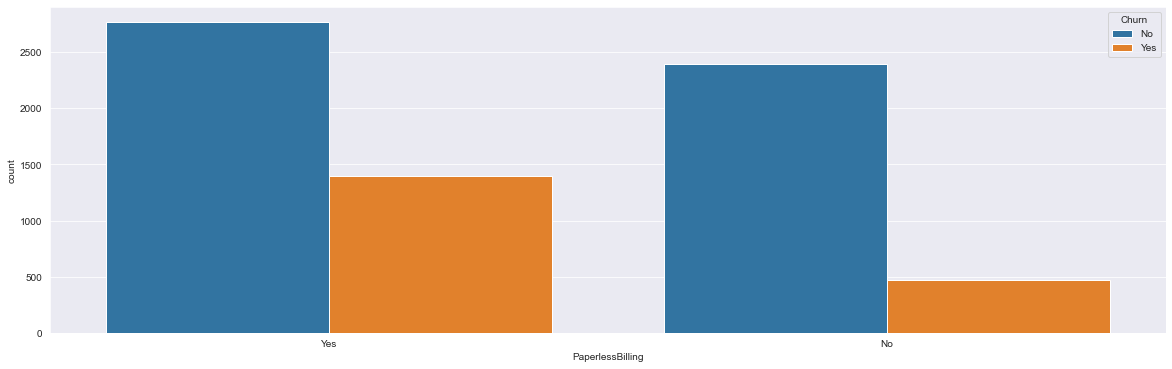

In [67]:
plt.figure(figsize=(20,6))
sns.countplot(df['PaperlessBilling'],hue=df['Churn'])

Churn is more in who opted for paperlessbilling than who have not opted

#### PaymentMethod vs Churn

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

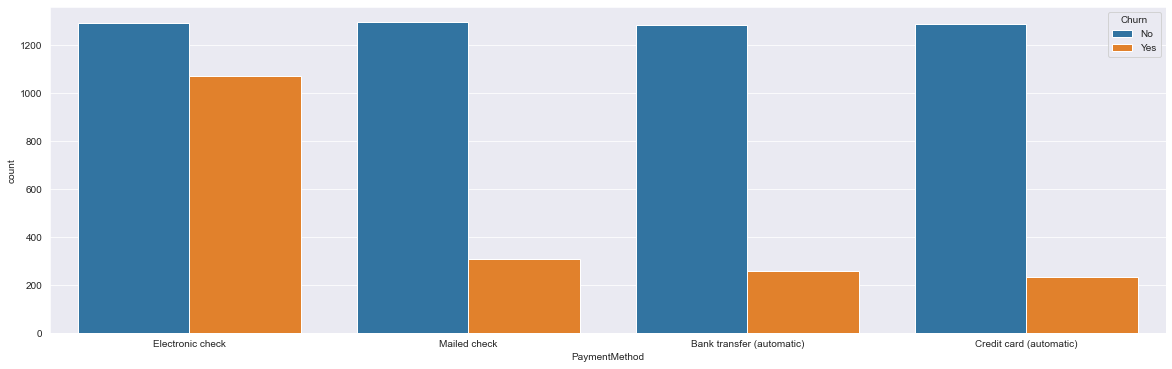

In [68]:
plt.figure(figsize=(20,6))
sns.countplot(df['PaymentMethod'],hue=df['Churn'])

Churn is more in who opted for Electronic check, followed by Mailed Check, Bank transfer and credit card in PaymentMethod

##### We will do point plot to have detailed analysis of categorical variable

## MultiVariate Analysis

#### "TotalCharges" vs "Churn" vs "gender"

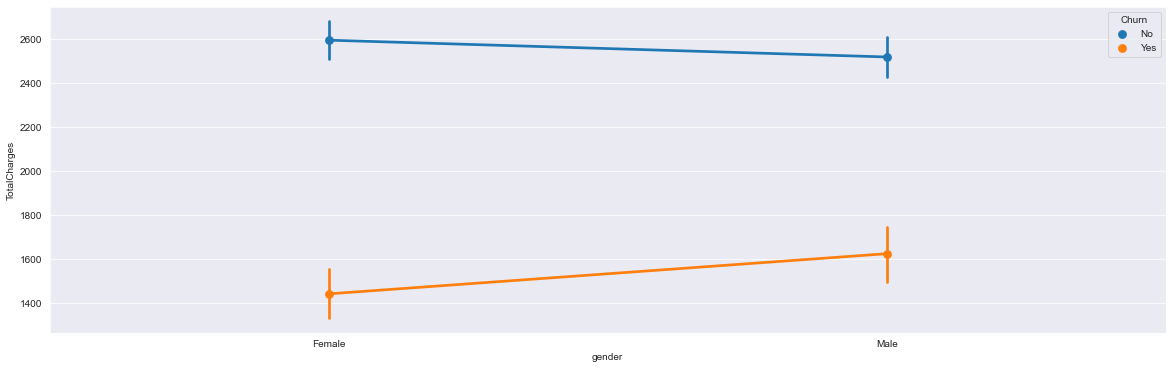

In [69]:
plt.figure(figsize=(20,6))
sns.pointplot(x="gender", y="TotalCharges", hue = 'Churn',  data=df)
plt.show()

Churn is more in Male Gender than Female

#### "TotalCharges" vs "Churn" vs "PhoneService"

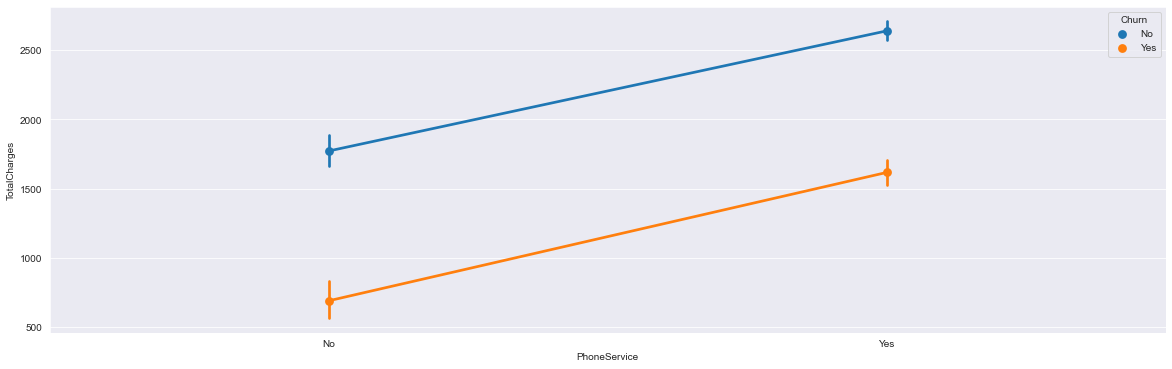

In [70]:
plt.figure(figsize=(20,6))
sns.pointplot(x="PhoneService", y="TotalCharges", hue = 'Churn',  data=df)
plt.show()

Churn is more with PhoneService holders

#### "TotalCharges" vs "Churn" vs "MultipleLines"

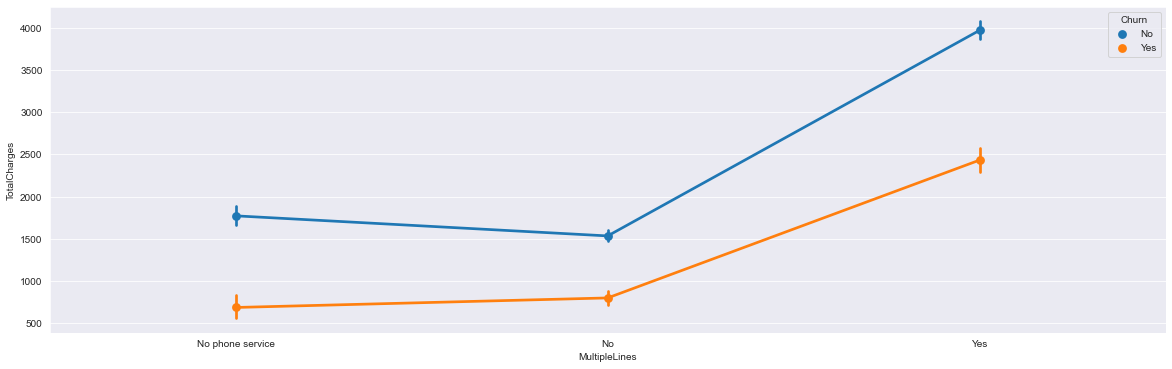

In [71]:
plt.figure(figsize=(20,6))
sns.pointplot(x="MultipleLines", y="TotalCharges", hue = 'Churn',  data=df)
plt.show()

Churn is more in MultipleLine holders

#### "TotalCharges" vs "Churn" vs "MonthlyCharges"

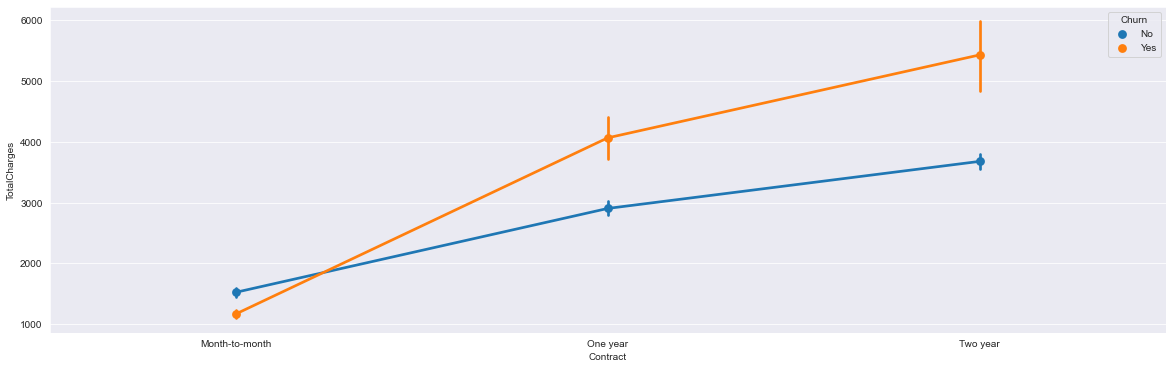

In [73]:
plt.figure(figsize=(20,6))
sns.pointplot(x="Contract", y="TotalCharges", hue = 'Churn',  data=df)
plt.show()

Churn is more in Two year holders, followed by one year and month

## Hypotesis Testing

We can statistically check whether all the independent variables has significant effect on target variables

In [74]:
class_summary=df.groupby('Churn') #getting mean values Churn for all independent variables
class_summary.mean().reset_index()

,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,No,0.128995,37.650010,61.307408,2555.344141
1,Yes,0.254682,17.979133,74.441332,1531.796094


Mean values differ huge for SeniorCitizen, tenure, Total Charges

In [75]:
col=list(df.select_dtypes(include=['int64','float64']).columns)

In [77]:
for i in col:
    x = np.array(df[df.Churn == 0][i]) 
    y = np.array(df[df.Churn == 1][i])
    t, p_value  = stats.ttest_ind(x,y, axis = 0,equal_var=False) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} of Loan holders and non-Loan holders are not same'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} of Loan holders and non-Loan holders are  same'.format('\033[1m',i))
    print('\n')

 P_Value:nan
 Fail to Reject Null Hypothesis.SeniorCitizen of Loan holders and non-Loan holders are  same


 P_Value:nan
 Fail to Reject Null Hypothesis.tenure of Loan holders and non-Loan holders are  same


 P_Value:nan
 Fail to Reject Null Hypothesis.MonthlyCharges of Loan holders and non-Loan holders are  same


 P_Value:nan
 Fail to Reject Null Hypothesis.TotalCharges of Loan holders and non-Loan holders are  same




We can see SeniorCitizen, tenure, Monthlycharges, TotalCharges does not have effect on target variable. So dropping this column before building model

In [78]:
df.drop(['SeniorCitizen','tenure', 'MonthlyCharges','TotalCharges'],axis=1,inplace=True)

Statistical Testing of categorical features with target variable

Ho: There is no significant difference in hidden score for different category of target variable(Loan on card)

H1: There is significant difference in hidden score for different category of target variable(Loan on card)

In [80]:
crosstab=pd.crosstab(df['Churn'],df['InternetService'])
print(crosstab)

InternetService   DSL  Fiber optic    No
Churn                                   
No               1957         1799  1407
Yes               459         1297   113


Do these data provide sufficient evidence at the 5% significance level to infer that there are differences in InternetService among Churn (0 and 1)?

In [81]:
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
print('P_Value:', p_value)

P_Value: 5.831198962236941e-159


In [83]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('{} Rejecting Null Hypothesis. \n There is significant difference in InternetService for different category of target variable(Churn)'.format('\033[1m'))
else:
    print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in InternetService for different category of target variable(Churn)'.format('\033[1m'))

 Rejecting Null Hypothesis. 
 There is significant difference in InternetService for different category of target variable(Churn)


Similarly we will check for other categorical columns

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
dtype: object

In [87]:
cat_col=list(df.select_dtypes(include=['object']).columns)

In [88]:
cat_col.remove('InternetService')
cat_col.remove('Churn')

In [90]:
for i in cat_col:
    crosstab=pd.crosstab(df['Churn'],df[i])
    chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis. \n There is significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    print('\n')

 Fail to Reject Null Hypothesis.
 There is no significant difference in gender Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in Partner Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in Dependents Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in PhoneService Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in MultipleLines Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in OnlineSecurity Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in OnlineBackup Feature for different category of target variable(Loan

We can see gender, PhoneService does not have significant difference in target variable.So dropping this column before building model

In [91]:
df.drop(['gender','PhoneService'],axis=1,inplace=True)

#### 4. Data pre-processing:
• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced.

• Perform train-test split.

• Check if the train and test data have similar statistical characteristics when compared with original data

## Checking on Target Imbalance

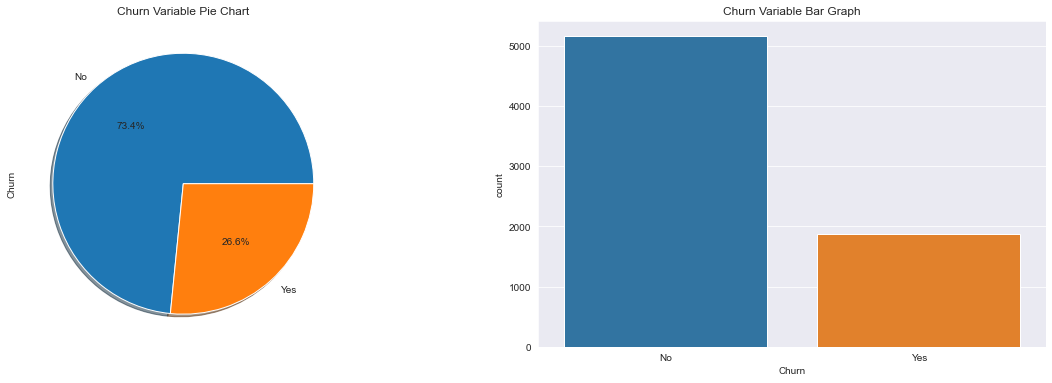

In [93]:
fig,axes=plt.subplots(1,2,figsize=(20,6))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('Churn',data=df,ax=axes[1])
axes[0].set_title('Churn Variable Pie Chart')
axes[1].set_title('Churn Variable Bar Graph')
plt.show()

There is imbalance in target variable.

If the imbalanced data is not treated beforehand, then this will degrade the performance of the build model. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them. This will result in a high bias in the model.

A widely adopted technique for dealing with highly unbalanced datasets is called resampling

Two widely used resampling methods:

Undersampling: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

Oversampling: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class

Here we will use oversampling because undersampling may remove important information from the dataset

## Predictors and Target


In [94]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [95]:
df.dtypes

Partner             object
Dependents          object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
dtype: object

In [96]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,0,0,0,2,0,2,0,0,0,1,0,3,0
2,0,0,0,0,2,2,0,0,0,0,0,1,3,1
3,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,2,1


In [98]:
# Arrange data into independent variables and dependent variables
X=df.drop(columns='Churn')
y=df['Churn'] #target

## Train - Test Split

In [99]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

##### 5. Model training, testing and tuning: [ Score: 25 point ]
• Train and test all ensemble models taught in the learning module.

• Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.

• Display the classification accuracies for train and test data.

• Apply all the possible tuning techniques to train the best model for the given data.

• Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.

• Display and compare all the models designed with their train and test accuracies.

• Select the final best trained model along with your detailed comments for selecting this model.

• Pickle the selected model for future use.

#### Scaling Independent Variables

In [100]:
X_Scaled=X.apply(zscore)

In [101]:
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Partner,7032.0,2.420798e-16,1.000071,-0.965608,-0.965608,-0.965608,1.035617,1.035617
Dependents,7032.0,-5.429862e-16,1.000071,-0.652305,-0.652305,-0.652305,1.533025,1.533025
MultipleLines,7032.0,-1.069174e-16,1.000071,-0.991564,-0.991564,0.062666,1.116896,1.116896
InternetService,7032.0,2.523973e-16,1.000071,-1.183614,-1.183614,0.172835,0.172835,1.529285
OnlineSecurity,7032.0,-1.765431e-16,1.000071,-0.917837,-0.917837,0.245087,1.408012,1.408012
OnlineBackup,7032.0,9.921276e-17,1.000071,-1.028998,-1.028998,0.106938,1.242875,1.242875
DeviceProtection,7032.0,-2.817870e-16,1.000071,-1.026988,-1.026988,0.109226,1.245441,1.245441
TechSupport,7032.0,2.881022e-16,1.000071,-0.924267,-0.924267,0.236348,1.396963,1.396963
StreamingTV,7032.0,1.437354e-16,1.000071,-1.112632,-1.112632,0.017028,1.146689,1.146689
StreamingMovies,7032.0,2.117192e-16,1.000071,-1.121501,-1.121501,0.008031,1.137564,1.137564


We have scaled independent variables to corresponding z-score.

We can see Mean becomes close to zero and Standard Deviation close to 1

In [102]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
    
    start = time.time()  # note the start time 

    model.fit(X_train, y_train)   # fit the model using the train data

    pred = model.predict(X_test)     # model predictions on the test data

    r2 = metrics.r2_score(y_test, pred)  # calculate the r squared value on the test data
    
    rmse = sqrt(metrics.mean_squared_error(y_test, pred))   # Root mean squared error
    
    
    scorer = {'r2' : metrics.make_scorer(metrics.r2_score),
              'mse' : metrics.make_scorer(metrics.mean_squared_error),
              }    # make scorers to be used in cross validation
    
    cv = cross_validate(model, X_train, y_train, cv=10, scoring = scorer)   # perform cross validation accross 3 metrics
    
    r2_cv = cv['test_r2'].mean()                                     # mean r squared value
    rmse_cv = np.mean([sqrt(mse) for mse in cv['test_mse']]) # mean RMSE value(take root of individual mse value and then mean)
    
    end = time.time()  #note the end time
    
    
    duration = end - start  # calculate the total duration
    
    
    return r2, rmse, r2_cv, rmse_cv, duration, pred  # return all the metrics along with predictions

In [103]:
lr = LinearRegression()        
dt = DecisionTreeRegressor(random_state=1)   
br = BaggingRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1, n_estimators=100)  # specifying n_estimators to avoid "future warnings"
gb = GradientBoostingRegressor(random_state=1, n_estimators=100)


result = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all 5 models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([lr, dt, br, rf, gb], ['Linear Regression', 'Decision Tree',
                                                    'Bagging Ensemble', 'Random Forest', 'Gradient Boost Ensemble']):
    result[name] = fit_n_print(model,X_train, X_test,y_train, y_test)  
    # store all the metrics in the result dict, with name as key
   

In [104]:
result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['R Squared', 'MSE', 'R2 CV', 'RMSE CV', 'Elapsed'],
                      index= result.keys())   # use the model names as index

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1 

,R Squared,MSE,R2 CV,RMSE CV,Elapsed
Model,,,,,
Linear Regression,0.228765,0.387546,0.204034,0.393161,0.097744
Decision Tree,-0.219856,0.487398,-0.26669,0.495675,0.179273
Bagging Ensemble,0.093055,0.420262,0.054182,0.428232,0.781024
Random Forest,0.114249,0.415322,0.092662,0.419487,7.094603
Gradient Boost Ensemble,0.289723,0.371915,0.243416,0.383287,3.076761


- **Gradient Boost Ensemble out-performed all the other models
- However, we have few attributes which have high cardinality which can potential noisy attributes. So let's remove them
- And about the other attributes, let's one-hot encode them

In [105]:
lr = LinearRegression()        
dt = DecisionTreeRegressor(random_state=1)   
br = BaggingRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1, n_estimators=100)
gb = GradientBoostingRegressor(random_state=1, n_estimators=100)
xgb = XGBRegressor()
cgb = CatBoostRegressor()
lgb = LGBMRegressor()


result = {}   # Create an empty dictionary to later use to store metrics of each of the models

for model, name  in zip([lr, dt, br, rf,
                         gb, xgb, cgb, lgb], ['Linear Regression', 'Decision Tree','Bagging Ensemble', 'Random Forest',
                                              'Gradient Boost Ensemble', 'Xgboost', 'Catboost','LightGB']):
    result[name] = fit_n_print(model,X_train, X_test,y_train, y_test)  

Learning rate set to 0.051832
0:	learn: 0.4369281	total: 147ms	remaining: 2m 26s
1:	learn: 0.4322135	total: 153ms	remaining: 1m 16s
2:	learn: 0.4277654	total: 158ms	remaining: 52.7s
3:	learn: 0.4236019	total: 163ms	remaining: 40.5s
4:	learn: 0.4195593	total: 166ms	remaining: 33s
5:	learn: 0.4161136	total: 168ms	remaining: 27.9s
6:	learn: 0.4129305	total: 172ms	remaining: 24.5s
7:	learn: 0.4099931	total: 175ms	remaining: 21.7s
8:	learn: 0.4072070	total: 177ms	remaining: 19.5s
9:	learn: 0.4047020	total: 180ms	remaining: 17.8s
10:	learn: 0.4023325	total: 183ms	remaining: 16.4s
11:	learn: 0.4003103	total: 187ms	remaining: 15.4s
12:	learn: 0.3983760	total: 189ms	remaining: 14.4s
13:	learn: 0.3967326	total: 192ms	remaining: 13.5s
14:	learn: 0.3954781	total: 194ms	remaining: 12.7s
15:	learn: 0.3940544	total: 196ms	remaining: 12.1s
16:	learn: 0.3925967	total: 198ms	remaining: 11.5s
17:	learn: 0.3913157	total: 202ms	remaining: 11s
18:	learn: 0.3900861	total: 205ms	remaining: 10.6s
19:	learn: 0.

210:	learn: 0.3581550	total: 683ms	remaining: 2.55s
211:	learn: 0.3580619	total: 686ms	remaining: 2.55s
212:	learn: 0.3579767	total: 688ms	remaining: 2.54s
213:	learn: 0.3579134	total: 690ms	remaining: 2.53s
214:	learn: 0.3578468	total: 695ms	remaining: 2.54s
215:	learn: 0.3577422	total: 697ms	remaining: 2.53s
216:	learn: 0.3576845	total: 700ms	remaining: 2.52s
217:	learn: 0.3576279	total: 702ms	remaining: 2.52s
218:	learn: 0.3575805	total: 704ms	remaining: 2.51s
219:	learn: 0.3575198	total: 709ms	remaining: 2.52s
220:	learn: 0.3574181	total: 713ms	remaining: 2.51s
221:	learn: 0.3573328	total: 715ms	remaining: 2.5s
222:	learn: 0.3572326	total: 718ms	remaining: 2.5s
223:	learn: 0.3571404	total: 720ms	remaining: 2.49s
224:	learn: 0.3570817	total: 722ms	remaining: 2.49s
225:	learn: 0.3570096	total: 726ms	remaining: 2.49s
226:	learn: 0.3568965	total: 728ms	remaining: 2.48s
227:	learn: 0.3568378	total: 730ms	remaining: 2.47s
228:	learn: 0.3567305	total: 732ms	remaining: 2.47s
229:	learn: 0.

423:	learn: 0.3435131	total: 1.2s	remaining: 1.63s
424:	learn: 0.3434701	total: 1.2s	remaining: 1.63s
425:	learn: 0.3434354	total: 1.21s	remaining: 1.63s
426:	learn: 0.3433909	total: 1.21s	remaining: 1.62s
427:	learn: 0.3433124	total: 1.21s	remaining: 1.62s
428:	learn: 0.3432497	total: 1.21s	remaining: 1.61s
429:	learn: 0.3432060	total: 1.22s	remaining: 1.61s
430:	learn: 0.3431736	total: 1.22s	remaining: 1.61s
431:	learn: 0.3431370	total: 1.22s	remaining: 1.6s
432:	learn: 0.3430703	total: 1.22s	remaining: 1.6s
433:	learn: 0.3430006	total: 1.22s	remaining: 1.6s
434:	learn: 0.3429617	total: 1.23s	remaining: 1.59s
435:	learn: 0.3428951	total: 1.23s	remaining: 1.59s
436:	learn: 0.3428500	total: 1.23s	remaining: 1.59s
437:	learn: 0.3428082	total: 1.23s	remaining: 1.58s
438:	learn: 0.3427677	total: 1.24s	remaining: 1.58s
439:	learn: 0.3427235	total: 1.24s	remaining: 1.57s
440:	learn: 0.3426719	total: 1.24s	remaining: 1.57s
441:	learn: 0.3426344	total: 1.24s	remaining: 1.57s
442:	learn: 0.342

614:	learn: 0.3341832	total: 1.7s	remaining: 1.06s
615:	learn: 0.3341363	total: 1.7s	remaining: 1.06s
616:	learn: 0.3340950	total: 1.7s	remaining: 1.06s
617:	learn: 0.3340500	total: 1.7s	remaining: 1.05s
618:	learn: 0.3339891	total: 1.71s	remaining: 1.05s
619:	learn: 0.3339449	total: 1.71s	remaining: 1.05s
620:	learn: 0.3338901	total: 1.71s	remaining: 1.04s
621:	learn: 0.3338519	total: 1.72s	remaining: 1.04s
622:	learn: 0.3338292	total: 1.72s	remaining: 1.04s
623:	learn: 0.3337679	total: 1.72s	remaining: 1.04s
624:	learn: 0.3337111	total: 1.72s	remaining: 1.03s
625:	learn: 0.3336615	total: 1.72s	remaining: 1.03s
626:	learn: 0.3336230	total: 1.73s	remaining: 1.03s
627:	learn: 0.3335994	total: 1.73s	remaining: 1.02s
628:	learn: 0.3335699	total: 1.73s	remaining: 1.02s
629:	learn: 0.3335012	total: 1.73s	remaining: 1.02s
630:	learn: 0.3334739	total: 1.74s	remaining: 1.01s
631:	learn: 0.3334455	total: 1.74s	remaining: 1.01s
632:	learn: 0.3334052	total: 1.74s	remaining: 1.01s
633:	learn: 0.33

814:	learn: 0.3268536	total: 2.2s	remaining: 499ms
815:	learn: 0.3268163	total: 2.2s	remaining: 496ms
816:	learn: 0.3267779	total: 2.2s	remaining: 494ms
817:	learn: 0.3267417	total: 2.21s	remaining: 491ms
818:	learn: 0.3267072	total: 2.21s	remaining: 488ms
819:	learn: 0.3266695	total: 2.21s	remaining: 485ms
820:	learn: 0.3266225	total: 2.21s	remaining: 482ms
821:	learn: 0.3265935	total: 2.21s	remaining: 480ms
822:	learn: 0.3265648	total: 2.22s	remaining: 477ms
823:	learn: 0.3265426	total: 2.22s	remaining: 474ms
824:	learn: 0.3265066	total: 2.22s	remaining: 471ms
825:	learn: 0.3264714	total: 2.22s	remaining: 469ms
826:	learn: 0.3264352	total: 2.23s	remaining: 466ms
827:	learn: 0.3263987	total: 2.23s	remaining: 463ms
828:	learn: 0.3263774	total: 2.23s	remaining: 461ms
829:	learn: 0.3263574	total: 2.23s	remaining: 458ms
830:	learn: 0.3263237	total: 2.24s	remaining: 455ms
831:	learn: 0.3262900	total: 2.24s	remaining: 452ms
832:	learn: 0.3262575	total: 2.24s	remaining: 450ms
833:	learn: 0.3

24:	learn: 0.3857752	total: 51.5ms	remaining: 2.01s
25:	learn: 0.3850235	total: 53.9ms	remaining: 2.02s
26:	learn: 0.3843241	total: 56.1ms	remaining: 2.02s
27:	learn: 0.3837067	total: 58.2ms	remaining: 2.02s
28:	learn: 0.3831843	total: 60.4ms	remaining: 2.02s
29:	learn: 0.3825821	total: 62.9ms	remaining: 2.03s
30:	learn: 0.3820952	total: 65ms	remaining: 2.03s
31:	learn: 0.3815790	total: 67.1ms	remaining: 2.03s
32:	learn: 0.3812606	total: 68.8ms	remaining: 2.02s
33:	learn: 0.3807932	total: 70.9ms	remaining: 2.01s
34:	learn: 0.3802706	total: 73.1ms	remaining: 2.02s
35:	learn: 0.3798514	total: 75.6ms	remaining: 2.02s
36:	learn: 0.3794435	total: 77.9ms	remaining: 2.03s
37:	learn: 0.3789882	total: 80.1ms	remaining: 2.03s
38:	learn: 0.3786064	total: 82.2ms	remaining: 2.02s
39:	learn: 0.3782796	total: 84.9ms	remaining: 2.04s
40:	learn: 0.3779668	total: 87.6ms	remaining: 2.05s
41:	learn: 0.3778039	total: 89.4ms	remaining: 2.04s
42:	learn: 0.3774568	total: 91.8ms	remaining: 2.04s
43:	learn: 0.3

193:	learn: 0.3575996	total: 393ms	remaining: 1.63s
194:	learn: 0.3575140	total: 396ms	remaining: 1.63s
195:	learn: 0.3573926	total: 398ms	remaining: 1.63s
196:	learn: 0.3572471	total: 400ms	remaining: 1.63s
197:	learn: 0.3571684	total: 402ms	remaining: 1.63s
198:	learn: 0.3570462	total: 404ms	remaining: 1.63s
199:	learn: 0.3569548	total: 406ms	remaining: 1.62s
200:	learn: 0.3568585	total: 408ms	remaining: 1.62s
201:	learn: 0.3567875	total: 410ms	remaining: 1.62s
202:	learn: 0.3566448	total: 412ms	remaining: 1.62s
203:	learn: 0.3565159	total: 414ms	remaining: 1.62s
204:	learn: 0.3564357	total: 417ms	remaining: 1.61s
205:	learn: 0.3562991	total: 419ms	remaining: 1.61s
206:	learn: 0.3561507	total: 421ms	remaining: 1.61s
207:	learn: 0.3560913	total: 423ms	remaining: 1.61s
208:	learn: 0.3560171	total: 425ms	remaining: 1.61s
209:	learn: 0.3558862	total: 427ms	remaining: 1.6s
210:	learn: 0.3557565	total: 429ms	remaining: 1.6s
211:	learn: 0.3556378	total: 431ms	remaining: 1.6s
212:	learn: 0.3

355:	learn: 0.3439810	total: 733ms	remaining: 1.33s
356:	learn: 0.3438877	total: 736ms	remaining: 1.32s
357:	learn: 0.3438097	total: 738ms	remaining: 1.32s
358:	learn: 0.3437668	total: 740ms	remaining: 1.32s
359:	learn: 0.3437089	total: 742ms	remaining: 1.32s
360:	learn: 0.3436489	total: 744ms	remaining: 1.32s
361:	learn: 0.3435945	total: 746ms	remaining: 1.31s
362:	learn: 0.3435695	total: 748ms	remaining: 1.31s
363:	learn: 0.3435084	total: 750ms	remaining: 1.31s
364:	learn: 0.3434666	total: 752ms	remaining: 1.31s
365:	learn: 0.3434268	total: 754ms	remaining: 1.31s
366:	learn: 0.3433454	total: 757ms	remaining: 1.3s
367:	learn: 0.3432890	total: 759ms	remaining: 1.3s
368:	learn: 0.3432509	total: 761ms	remaining: 1.3s
369:	learn: 0.3431899	total: 764ms	remaining: 1.3s
370:	learn: 0.3431020	total: 766ms	remaining: 1.3s
371:	learn: 0.3430303	total: 768ms	remaining: 1.3s
372:	learn: 0.3429808	total: 770ms	remaining: 1.29s
373:	learn: 0.3429148	total: 772ms	remaining: 1.29s
374:	learn: 0.3428

515:	learn: 0.3351597	total: 1.07s	remaining: 1s
516:	learn: 0.3351307	total: 1.07s	remaining: 1s
517:	learn: 0.3351016	total: 1.07s	remaining: 1s
518:	learn: 0.3350690	total: 1.08s	remaining: 999ms
519:	learn: 0.3349985	total: 1.08s	remaining: 997ms
520:	learn: 0.3349341	total: 1.08s	remaining: 995ms
521:	learn: 0.3348595	total: 1.08s	remaining: 993ms
522:	learn: 0.3348072	total: 1.09s	remaining: 991ms
523:	learn: 0.3347606	total: 1.09s	remaining: 989ms
524:	learn: 0.3347272	total: 1.09s	remaining: 987ms
525:	learn: 0.3346907	total: 1.09s	remaining: 985ms
526:	learn: 0.3346144	total: 1.1s	remaining: 984ms
527:	learn: 0.3345826	total: 1.1s	remaining: 982ms
528:	learn: 0.3345068	total: 1.1s	remaining: 980ms
529:	learn: 0.3344695	total: 1.1s	remaining: 978ms
530:	learn: 0.3344173	total: 1.1s	remaining: 976ms
531:	learn: 0.3343653	total: 1.11s	remaining: 973ms
532:	learn: 0.3343144	total: 1.11s	remaining: 971ms
533:	learn: 0.3342657	total: 1.11s	remaining: 969ms
534:	learn: 0.3342003	tota

686:	learn: 0.3272654	total: 1.42s	remaining: 646ms
687:	learn: 0.3272180	total: 1.42s	remaining: 644ms
688:	learn: 0.3271789	total: 1.42s	remaining: 642ms
689:	learn: 0.3271457	total: 1.42s	remaining: 640ms
690:	learn: 0.3271061	total: 1.43s	remaining: 638ms
691:	learn: 0.3270324	total: 1.43s	remaining: 636ms
692:	learn: 0.3270133	total: 1.43s	remaining: 634ms
693:	learn: 0.3269814	total: 1.43s	remaining: 632ms
694:	learn: 0.3269455	total: 1.43s	remaining: 630ms
695:	learn: 0.3269137	total: 1.44s	remaining: 628ms
696:	learn: 0.3268534	total: 1.44s	remaining: 626ms
697:	learn: 0.3268082	total: 1.44s	remaining: 624ms
698:	learn: 0.3267691	total: 1.44s	remaining: 622ms
699:	learn: 0.3267440	total: 1.45s	remaining: 620ms
700:	learn: 0.3266917	total: 1.45s	remaining: 618ms
701:	learn: 0.3266537	total: 1.45s	remaining: 616ms
702:	learn: 0.3266160	total: 1.45s	remaining: 613ms
703:	learn: 0.3265817	total: 1.45s	remaining: 611ms
704:	learn: 0.3265409	total: 1.46s	remaining: 609ms
705:	learn: 

864:	learn: 0.3209568	total: 1.77s	remaining: 276ms
865:	learn: 0.3209017	total: 1.77s	remaining: 274ms
866:	learn: 0.3208819	total: 1.77s	remaining: 272ms
867:	learn: 0.3208526	total: 1.77s	remaining: 270ms
868:	learn: 0.3208211	total: 1.78s	remaining: 268ms
869:	learn: 0.3207767	total: 1.78s	remaining: 266ms
870:	learn: 0.3207261	total: 1.78s	remaining: 264ms
871:	learn: 0.3206861	total: 1.78s	remaining: 262ms
872:	learn: 0.3206615	total: 1.78s	remaining: 260ms
873:	learn: 0.3206328	total: 1.79s	remaining: 258ms
874:	learn: 0.3205928	total: 1.79s	remaining: 256ms
875:	learn: 0.3205731	total: 1.79s	remaining: 254ms
876:	learn: 0.3205321	total: 1.79s	remaining: 252ms
877:	learn: 0.3204768	total: 1.8s	remaining: 250ms
878:	learn: 0.3204435	total: 1.8s	remaining: 248ms
879:	learn: 0.3204195	total: 1.8s	remaining: 245ms
880:	learn: 0.3203633	total: 1.8s	remaining: 243ms
881:	learn: 0.3203417	total: 1.8s	remaining: 241ms
882:	learn: 0.3203026	total: 1.81s	remaining: 239ms
883:	learn: 0.320

101:	learn: 0.3677480	total: 197ms	remaining: 1.73s
102:	learn: 0.3676470	total: 199ms	remaining: 1.74s
103:	learn: 0.3675838	total: 202ms	remaining: 1.74s
104:	learn: 0.3674220	total: 204ms	remaining: 1.74s
105:	learn: 0.3672942	total: 206ms	remaining: 1.73s
106:	learn: 0.3671932	total: 208ms	remaining: 1.73s
107:	learn: 0.3670924	total: 210ms	remaining: 1.73s
108:	learn: 0.3669571	total: 212ms	remaining: 1.73s
109:	learn: 0.3668824	total: 214ms	remaining: 1.73s
110:	learn: 0.3667777	total: 216ms	remaining: 1.73s
111:	learn: 0.3667257	total: 219ms	remaining: 1.73s
112:	learn: 0.3666253	total: 221ms	remaining: 1.73s
113:	learn: 0.3664960	total: 223ms	remaining: 1.73s
114:	learn: 0.3663646	total: 225ms	remaining: 1.73s
115:	learn: 0.3661709	total: 227ms	remaining: 1.73s
116:	learn: 0.3661062	total: 229ms	remaining: 1.73s
117:	learn: 0.3659860	total: 231ms	remaining: 1.73s
118:	learn: 0.3658720	total: 233ms	remaining: 1.73s
119:	learn: 0.3658719	total: 235ms	remaining: 1.72s
120:	learn: 

283:	learn: 0.3496706	total: 549ms	remaining: 1.39s
284:	learn: 0.3495829	total: 552ms	remaining: 1.38s
285:	learn: 0.3494957	total: 554ms	remaining: 1.38s
286:	learn: 0.3493859	total: 556ms	remaining: 1.38s
287:	learn: 0.3493124	total: 558ms	remaining: 1.38s
288:	learn: 0.3492311	total: 559ms	remaining: 1.38s
289:	learn: 0.3491565	total: 561ms	remaining: 1.37s
290:	learn: 0.3490732	total: 563ms	remaining: 1.37s
291:	learn: 0.3490058	total: 565ms	remaining: 1.37s
292:	learn: 0.3489282	total: 567ms	remaining: 1.37s
293:	learn: 0.3488335	total: 569ms	remaining: 1.37s
294:	learn: 0.3487724	total: 571ms	remaining: 1.36s
295:	learn: 0.3487028	total: 573ms	remaining: 1.36s
296:	learn: 0.3486140	total: 575ms	remaining: 1.36s
297:	learn: 0.3485371	total: 577ms	remaining: 1.36s
298:	learn: 0.3484778	total: 580ms	remaining: 1.36s
299:	learn: 0.3483929	total: 582ms	remaining: 1.36s
300:	learn: 0.3483045	total: 584ms	remaining: 1.36s
301:	learn: 0.3482478	total: 586ms	remaining: 1.35s
302:	learn: 

452:	learn: 0.3382718	total: 882ms	remaining: 1.06s
453:	learn: 0.3382079	total: 885ms	remaining: 1.06s
454:	learn: 0.3381698	total: 887ms	remaining: 1.06s
455:	learn: 0.3381396	total: 889ms	remaining: 1.06s
456:	learn: 0.3380852	total: 892ms	remaining: 1.06s
457:	learn: 0.3380222	total: 894ms	remaining: 1.06s
458:	learn: 0.3379696	total: 897ms	remaining: 1.06s
459:	learn: 0.3379104	total: 899ms	remaining: 1.05s
460:	learn: 0.3378366	total: 901ms	remaining: 1.05s
461:	learn: 0.3377711	total: 904ms	remaining: 1.05s
462:	learn: 0.3377089	total: 906ms	remaining: 1.05s
463:	learn: 0.3376471	total: 909ms	remaining: 1.05s
464:	learn: 0.3375973	total: 911ms	remaining: 1.05s
465:	learn: 0.3375494	total: 913ms	remaining: 1.05s
466:	learn: 0.3374900	total: 915ms	remaining: 1.04s
467:	learn: 0.3374407	total: 918ms	remaining: 1.04s
468:	learn: 0.3374016	total: 920ms	remaining: 1.04s
469:	learn: 0.3373560	total: 922ms	remaining: 1.04s
470:	learn: 0.3373140	total: 924ms	remaining: 1.04s
471:	learn: 

612:	learn: 0.3300863	total: 1.22s	remaining: 771ms
613:	learn: 0.3300462	total: 1.22s	remaining: 770ms
614:	learn: 0.3300062	total: 1.23s	remaining: 768ms
615:	learn: 0.3299533	total: 1.23s	remaining: 766ms
616:	learn: 0.3298969	total: 1.23s	remaining: 764ms
617:	learn: 0.3298587	total: 1.23s	remaining: 761ms
618:	learn: 0.3298161	total: 1.23s	remaining: 760ms
619:	learn: 0.3297783	total: 1.24s	remaining: 758ms
620:	learn: 0.3297508	total: 1.24s	remaining: 756ms
621:	learn: 0.3296888	total: 1.24s	remaining: 754ms
622:	learn: 0.3296497	total: 1.24s	remaining: 752ms
623:	learn: 0.3295862	total: 1.24s	remaining: 750ms
624:	learn: 0.3295309	total: 1.25s	remaining: 748ms
625:	learn: 0.3294815	total: 1.25s	remaining: 746ms
626:	learn: 0.3294428	total: 1.25s	remaining: 744ms
627:	learn: 0.3294078	total: 1.25s	remaining: 743ms
628:	learn: 0.3293755	total: 1.25s	remaining: 741ms
629:	learn: 0.3293398	total: 1.26s	remaining: 739ms
630:	learn: 0.3292885	total: 1.26s	remaining: 737ms
631:	learn: 

782:	learn: 0.3232050	total: 1.57s	remaining: 435ms
783:	learn: 0.3231802	total: 1.57s	remaining: 433ms
784:	learn: 0.3231322	total: 1.57s	remaining: 431ms
785:	learn: 0.3230947	total: 1.58s	remaining: 429ms
786:	learn: 0.3230482	total: 1.58s	remaining: 427ms
787:	learn: 0.3230076	total: 1.58s	remaining: 425ms
788:	learn: 0.3229794	total: 1.58s	remaining: 423ms
789:	learn: 0.3229336	total: 1.58s	remaining: 421ms
790:	learn: 0.3228934	total: 1.59s	remaining: 419ms
791:	learn: 0.3228574	total: 1.59s	remaining: 417ms
792:	learn: 0.3228065	total: 1.59s	remaining: 415ms
793:	learn: 0.3227650	total: 1.59s	remaining: 413ms
794:	learn: 0.3227372	total: 1.59s	remaining: 411ms
795:	learn: 0.3226810	total: 1.6s	remaining: 409ms
796:	learn: 0.3226573	total: 1.6s	remaining: 407ms
797:	learn: 0.3226459	total: 1.6s	remaining: 405ms
798:	learn: 0.3226055	total: 1.6s	remaining: 403ms
799:	learn: 0.3225531	total: 1.6s	remaining: 401ms
800:	learn: 0.3225134	total: 1.61s	remaining: 399ms
801:	learn: 0.322

943:	learn: 0.3178644	total: 1.9s	remaining: 113ms
944:	learn: 0.3178437	total: 1.91s	remaining: 111ms
945:	learn: 0.3178109	total: 1.91s	remaining: 109ms
946:	learn: 0.3177731	total: 1.91s	remaining: 107ms
947:	learn: 0.3177551	total: 1.91s	remaining: 105ms
948:	learn: 0.3177312	total: 1.91s	remaining: 103ms
949:	learn: 0.3177126	total: 1.92s	remaining: 101ms
950:	learn: 0.3176673	total: 1.92s	remaining: 98.8ms
951:	learn: 0.3176453	total: 1.92s	remaining: 96.8ms
952:	learn: 0.3176150	total: 1.92s	remaining: 94.8ms
953:	learn: 0.3175844	total: 1.92s	remaining: 92.8ms
954:	learn: 0.3175533	total: 1.93s	remaining: 90.8ms
955:	learn: 0.3175177	total: 1.93s	remaining: 88.8ms
956:	learn: 0.3174847	total: 1.93s	remaining: 86.8ms
957:	learn: 0.3174557	total: 1.93s	remaining: 84.7ms
958:	learn: 0.3174169	total: 1.94s	remaining: 82.7ms
959:	learn: 0.3174059	total: 1.94s	remaining: 80.7ms
960:	learn: 0.3173774	total: 1.94s	remaining: 78.7ms
961:	learn: 0.3173394	total: 1.94s	remaining: 76.7ms
9

181:	learn: 0.3599407	total: 359ms	remaining: 1.61s
182:	learn: 0.3598693	total: 362ms	remaining: 1.61s
183:	learn: 0.3597972	total: 364ms	remaining: 1.61s
184:	learn: 0.3596501	total: 366ms	remaining: 1.61s
185:	learn: 0.3595695	total: 368ms	remaining: 1.61s
186:	learn: 0.3594708	total: 370ms	remaining: 1.61s
187:	learn: 0.3593209	total: 372ms	remaining: 1.61s
188:	learn: 0.3592030	total: 374ms	remaining: 1.6s
189:	learn: 0.3591158	total: 377ms	remaining: 1.6s
190:	learn: 0.3589988	total: 379ms	remaining: 1.6s
191:	learn: 0.3589286	total: 381ms	remaining: 1.6s
192:	learn: 0.3588415	total: 383ms	remaining: 1.6s
193:	learn: 0.3587596	total: 385ms	remaining: 1.6s
194:	learn: 0.3586278	total: 387ms	remaining: 1.6s
195:	learn: 0.3584900	total: 390ms	remaining: 1.6s
196:	learn: 0.3583646	total: 392ms	remaining: 1.6s
197:	learn: 0.3582548	total: 394ms	remaining: 1.6s
198:	learn: 0.3580960	total: 396ms	remaining: 1.59s
199:	learn: 0.3580408	total: 398ms	remaining: 1.59s
200:	learn: 0.3579468	

351:	learn: 0.3457651	total: 706ms	remaining: 1.3s
352:	learn: 0.3456731	total: 709ms	remaining: 1.3s
353:	learn: 0.3456085	total: 711ms	remaining: 1.3s
354:	learn: 0.3455169	total: 713ms	remaining: 1.29s
355:	learn: 0.3454473	total: 715ms	remaining: 1.29s
356:	learn: 0.3454032	total: 717ms	remaining: 1.29s
357:	learn: 0.3453314	total: 719ms	remaining: 1.29s
358:	learn: 0.3452628	total: 721ms	remaining: 1.29s
359:	learn: 0.3452001	total: 724ms	remaining: 1.29s
360:	learn: 0.3451511	total: 726ms	remaining: 1.28s
361:	learn: 0.3450650	total: 728ms	remaining: 1.28s
362:	learn: 0.3450117	total: 730ms	remaining: 1.28s
363:	learn: 0.3449283	total: 733ms	remaining: 1.28s
364:	learn: 0.3448483	total: 735ms	remaining: 1.28s
365:	learn: 0.3447684	total: 737ms	remaining: 1.28s
366:	learn: 0.3447161	total: 739ms	remaining: 1.27s
367:	learn: 0.3446524	total: 741ms	remaining: 1.27s
368:	learn: 0.3445729	total: 743ms	remaining: 1.27s
369:	learn: 0.3444996	total: 745ms	remaining: 1.27s
370:	learn: 0.3

527:	learn: 0.3354781	total: 1.05s	remaining: 944ms
528:	learn: 0.3354472	total: 1.06s	remaining: 942ms
529:	learn: 0.3353970	total: 1.06s	remaining: 941ms
530:	learn: 0.3353566	total: 1.06s	remaining: 939ms
531:	learn: 0.3353234	total: 1.06s	remaining: 937ms
532:	learn: 0.3352685	total: 1.07s	remaining: 935ms
533:	learn: 0.3352055	total: 1.07s	remaining: 933ms
534:	learn: 0.3351388	total: 1.07s	remaining: 931ms
535:	learn: 0.3350903	total: 1.07s	remaining: 929ms
536:	learn: 0.3350403	total: 1.07s	remaining: 927ms
537:	learn: 0.3350086	total: 1.08s	remaining: 926ms
538:	learn: 0.3349522	total: 1.08s	remaining: 924ms
539:	learn: 0.3348963	total: 1.08s	remaining: 922ms
540:	learn: 0.3348571	total: 1.08s	remaining: 921ms
541:	learn: 0.3348095	total: 1.09s	remaining: 919ms
542:	learn: 0.3347455	total: 1.09s	remaining: 917ms
543:	learn: 0.3347046	total: 1.09s	remaining: 915ms
544:	learn: 0.3346584	total: 1.09s	remaining: 913ms
545:	learn: 0.3346327	total: 1.09s	remaining: 911ms
546:	learn: 

765:	learn: 0.3254022	total: 1.55s	remaining: 474ms
766:	learn: 0.3253648	total: 1.55s	remaining: 473ms
767:	learn: 0.3253238	total: 1.56s	remaining: 471ms
768:	learn: 0.3252707	total: 1.56s	remaining: 469ms
769:	learn: 0.3252344	total: 1.56s	remaining: 467ms
770:	learn: 0.3251936	total: 1.56s	remaining: 465ms
771:	learn: 0.3251380	total: 1.57s	remaining: 463ms
772:	learn: 0.3251179	total: 1.57s	remaining: 461ms
773:	learn: 0.3250743	total: 1.57s	remaining: 459ms
774:	learn: 0.3250412	total: 1.57s	remaining: 457ms
775:	learn: 0.3249971	total: 1.57s	remaining: 455ms
776:	learn: 0.3249806	total: 1.58s	remaining: 453ms
777:	learn: 0.3249527	total: 1.58s	remaining: 451ms
778:	learn: 0.3249102	total: 1.58s	remaining: 449ms
779:	learn: 0.3248536	total: 1.58s	remaining: 447ms
780:	learn: 0.3248220	total: 1.58s	remaining: 445ms
781:	learn: 0.3247983	total: 1.59s	remaining: 443ms
782:	learn: 0.3247764	total: 1.59s	remaining: 441ms
783:	learn: 0.3247440	total: 1.59s	remaining: 439ms
784:	learn: 

939:	learn: 0.3197793	total: 1.9s	remaining: 122ms
940:	learn: 0.3197433	total: 1.91s	remaining: 120ms
941:	learn: 0.3197134	total: 1.91s	remaining: 118ms
942:	learn: 0.3196778	total: 1.91s	remaining: 116ms
943:	learn: 0.3196376	total: 1.91s	remaining: 114ms
944:	learn: 0.3196006	total: 1.92s	remaining: 111ms
945:	learn: 0.3195592	total: 1.92s	remaining: 109ms
946:	learn: 0.3195248	total: 1.92s	remaining: 107ms
947:	learn: 0.3194840	total: 1.92s	remaining: 105ms
948:	learn: 0.3194528	total: 1.92s	remaining: 103ms
949:	learn: 0.3194247	total: 1.93s	remaining: 101ms
950:	learn: 0.3194081	total: 1.93s	remaining: 99.4ms
951:	learn: 0.3193761	total: 1.93s	remaining: 97.4ms
952:	learn: 0.3193431	total: 1.93s	remaining: 95.3ms
953:	learn: 0.3193081	total: 1.93s	remaining: 93.3ms
954:	learn: 0.3192857	total: 1.94s	remaining: 91.3ms
955:	learn: 0.3192494	total: 1.94s	remaining: 89.2ms
956:	learn: 0.3192245	total: 1.94s	remaining: 87.2ms
957:	learn: 0.3191914	total: 1.94s	remaining: 85.2ms
958:	

173:	learn: 0.3613137	total: 344ms	remaining: 1.63s
174:	learn: 0.3611731	total: 346ms	remaining: 1.63s
175:	learn: 0.3610486	total: 348ms	remaining: 1.63s
176:	learn: 0.3609230	total: 350ms	remaining: 1.63s
177:	learn: 0.3608651	total: 352ms	remaining: 1.63s
178:	learn: 0.3607579	total: 354ms	remaining: 1.63s
179:	learn: 0.3606386	total: 356ms	remaining: 1.62s
180:	learn: 0.3605557	total: 359ms	remaining: 1.62s
181:	learn: 0.3604821	total: 361ms	remaining: 1.62s
182:	learn: 0.3603583	total: 363ms	remaining: 1.62s
183:	learn: 0.3602391	total: 365ms	remaining: 1.62s
184:	learn: 0.3601043	total: 367ms	remaining: 1.62s
185:	learn: 0.3599894	total: 369ms	remaining: 1.61s
186:	learn: 0.3598763	total: 372ms	remaining: 1.62s
187:	learn: 0.3597797	total: 374ms	remaining: 1.62s
188:	learn: 0.3596824	total: 376ms	remaining: 1.61s
189:	learn: 0.3595928	total: 378ms	remaining: 1.61s
190:	learn: 0.3595209	total: 380ms	remaining: 1.61s
191:	learn: 0.3594806	total: 382ms	remaining: 1.61s
192:	learn: 

334:	learn: 0.3472234	total: 691ms	remaining: 1.37s
335:	learn: 0.3471388	total: 694ms	remaining: 1.37s
336:	learn: 0.3470538	total: 696ms	remaining: 1.37s
337:	learn: 0.3470015	total: 698ms	remaining: 1.37s
338:	learn: 0.3469512	total: 700ms	remaining: 1.36s
339:	learn: 0.3468796	total: 702ms	remaining: 1.36s
340:	learn: 0.3467972	total: 704ms	remaining: 1.36s
341:	learn: 0.3467219	total: 706ms	remaining: 1.36s
342:	learn: 0.3466602	total: 708ms	remaining: 1.36s
343:	learn: 0.3465913	total: 710ms	remaining: 1.35s
344:	learn: 0.3465157	total: 712ms	remaining: 1.35s
345:	learn: 0.3464579	total: 715ms	remaining: 1.35s
346:	learn: 0.3463994	total: 717ms	remaining: 1.35s
347:	learn: 0.3463392	total: 719ms	remaining: 1.35s
348:	learn: 0.3462737	total: 721ms	remaining: 1.34s
349:	learn: 0.3462252	total: 723ms	remaining: 1.34s
350:	learn: 0.3461338	total: 725ms	remaining: 1.34s
351:	learn: 0.3460426	total: 727ms	remaining: 1.34s
352:	learn: 0.3459715	total: 729ms	remaining: 1.33s
353:	learn: 

502:	learn: 0.3370623	total: 1.02s	remaining: 1.01s
503:	learn: 0.3369940	total: 1.02s	remaining: 1.01s
504:	learn: 0.3369114	total: 1.03s	remaining: 1.01s
505:	learn: 0.3368476	total: 1.03s	remaining: 1s
506:	learn: 0.3367956	total: 1.03s	remaining: 1s
507:	learn: 0.3367651	total: 1.03s	remaining: 1s
508:	learn: 0.3367317	total: 1.04s	remaining: 1000ms
509:	learn: 0.3366865	total: 1.04s	remaining: 998ms
510:	learn: 0.3366551	total: 1.04s	remaining: 996ms
511:	learn: 0.3366206	total: 1.04s	remaining: 994ms
512:	learn: 0.3365574	total: 1.04s	remaining: 992ms
513:	learn: 0.3365039	total: 1.05s	remaining: 990ms
514:	learn: 0.3364604	total: 1.05s	remaining: 988ms
515:	learn: 0.3364267	total: 1.05s	remaining: 986ms
516:	learn: 0.3363676	total: 1.05s	remaining: 985ms
517:	learn: 0.3363106	total: 1.06s	remaining: 983ms
518:	learn: 0.3362741	total: 1.06s	remaining: 980ms
519:	learn: 0.3362596	total: 1.06s	remaining: 978ms
520:	learn: 0.3362263	total: 1.06s	remaining: 976ms
521:	learn: 0.336184

676:	learn: 0.3294698	total: 1.36s	remaining: 651ms
677:	learn: 0.3294442	total: 1.37s	remaining: 650ms
678:	learn: 0.3294117	total: 1.37s	remaining: 648ms
679:	learn: 0.3293788	total: 1.37s	remaining: 646ms
680:	learn: 0.3293287	total: 1.37s	remaining: 644ms
681:	learn: 0.3292887	total: 1.38s	remaining: 642ms
682:	learn: 0.3292480	total: 1.38s	remaining: 640ms
683:	learn: 0.3292181	total: 1.38s	remaining: 638ms
684:	learn: 0.3291936	total: 1.38s	remaining: 636ms
685:	learn: 0.3291604	total: 1.39s	remaining: 635ms
686:	learn: 0.3291162	total: 1.39s	remaining: 633ms
687:	learn: 0.3290753	total: 1.39s	remaining: 631ms
688:	learn: 0.3290400	total: 1.39s	remaining: 629ms
689:	learn: 0.3290102	total: 1.4s	remaining: 627ms
690:	learn: 0.3289523	total: 1.4s	remaining: 625ms
691:	learn: 0.3289032	total: 1.4s	remaining: 623ms
692:	learn: 0.3288592	total: 1.4s	remaining: 621ms
693:	learn: 0.3288333	total: 1.4s	remaining: 619ms
694:	learn: 0.3287914	total: 1.41s	remaining: 617ms
695:	learn: 0.328

853:	learn: 0.3234282	total: 1.72s	remaining: 294ms
854:	learn: 0.3233840	total: 1.72s	remaining: 292ms
855:	learn: 0.3233498	total: 1.72s	remaining: 290ms
856:	learn: 0.3233245	total: 1.73s	remaining: 288ms
857:	learn: 0.3232884	total: 1.73s	remaining: 286ms
858:	learn: 0.3232497	total: 1.73s	remaining: 284ms
859:	learn: 0.3232133	total: 1.73s	remaining: 282ms
860:	learn: 0.3231822	total: 1.73s	remaining: 280ms
861:	learn: 0.3231481	total: 1.74s	remaining: 278ms
862:	learn: 0.3231131	total: 1.74s	remaining: 276ms
863:	learn: 0.3230800	total: 1.74s	remaining: 274ms
864:	learn: 0.3230492	total: 1.74s	remaining: 272ms
865:	learn: 0.3230192	total: 1.75s	remaining: 270ms
866:	learn: 0.3229928	total: 1.75s	remaining: 268ms
867:	learn: 0.3229537	total: 1.75s	remaining: 266ms
868:	learn: 0.3229041	total: 1.75s	remaining: 264ms
869:	learn: 0.3228509	total: 1.75s	remaining: 262ms
870:	learn: 0.3228283	total: 1.76s	remaining: 260ms
871:	learn: 0.3228013	total: 1.76s	remaining: 258ms
872:	learn: 

81:	learn: 0.3687460	total: 173ms	remaining: 1.94s
82:	learn: 0.3686010	total: 175ms	remaining: 1.94s
83:	learn: 0.3684574	total: 178ms	remaining: 1.94s
84:	learn: 0.3683519	total: 180ms	remaining: 1.94s
85:	learn: 0.3681975	total: 182ms	remaining: 1.93s
86:	learn: 0.3680137	total: 184ms	remaining: 1.93s
87:	learn: 0.3678443	total: 186ms	remaining: 1.93s
88:	learn: 0.3675863	total: 188ms	remaining: 1.93s
89:	learn: 0.3674460	total: 190ms	remaining: 1.92s
90:	learn: 0.3672863	total: 193ms	remaining: 1.93s
91:	learn: 0.3671314	total: 195ms	remaining: 1.92s
92:	learn: 0.3669241	total: 197ms	remaining: 1.92s
93:	learn: 0.3668056	total: 199ms	remaining: 1.92s
94:	learn: 0.3666688	total: 201ms	remaining: 1.92s
95:	learn: 0.3664935	total: 203ms	remaining: 1.91s
96:	learn: 0.3663687	total: 206ms	remaining: 1.91s
97:	learn: 0.3662765	total: 208ms	remaining: 1.92s
98:	learn: 0.3661227	total: 210ms	remaining: 1.91s
99:	learn: 0.3659273	total: 212ms	remaining: 1.91s
100:	learn: 0.3657736	total: 21

246:	learn: 0.3511930	total: 511ms	remaining: 1.56s
247:	learn: 0.3510740	total: 513ms	remaining: 1.55s
248:	learn: 0.3509530	total: 515ms	remaining: 1.55s
249:	learn: 0.3508849	total: 517ms	remaining: 1.55s
250:	learn: 0.3507742	total: 520ms	remaining: 1.55s
251:	learn: 0.3506671	total: 522ms	remaining: 1.55s
252:	learn: 0.3506127	total: 524ms	remaining: 1.55s
253:	learn: 0.3505456	total: 526ms	remaining: 1.54s
254:	learn: 0.3504604	total: 528ms	remaining: 1.54s
255:	learn: 0.3503905	total: 530ms	remaining: 1.54s
256:	learn: 0.3503198	total: 532ms	remaining: 1.54s
257:	learn: 0.3502332	total: 535ms	remaining: 1.54s
258:	learn: 0.3501723	total: 537ms	remaining: 1.53s
259:	learn: 0.3500912	total: 539ms	remaining: 1.53s
260:	learn: 0.3500008	total: 542ms	remaining: 1.53s
261:	learn: 0.3499046	total: 544ms	remaining: 1.53s
262:	learn: 0.3498058	total: 546ms	remaining: 1.53s
263:	learn: 0.3497083	total: 547ms	remaining: 1.53s
264:	learn: 0.3495889	total: 549ms	remaining: 1.52s
265:	learn: 

419:	learn: 0.3387322	total: 858ms	remaining: 1.19s
420:	learn: 0.3387005	total: 861ms	remaining: 1.18s
421:	learn: 0.3386539	total: 863ms	remaining: 1.18s
422:	learn: 0.3386140	total: 865ms	remaining: 1.18s
423:	learn: 0.3385745	total: 867ms	remaining: 1.18s
424:	learn: 0.3384989	total: 869ms	remaining: 1.18s
425:	learn: 0.3384127	total: 871ms	remaining: 1.17s
426:	learn: 0.3383323	total: 873ms	remaining: 1.17s
427:	learn: 0.3382669	total: 875ms	remaining: 1.17s
428:	learn: 0.3382218	total: 878ms	remaining: 1.17s
429:	learn: 0.3381853	total: 880ms	remaining: 1.17s
430:	learn: 0.3381198	total: 882ms	remaining: 1.16s
431:	learn: 0.3380450	total: 884ms	remaining: 1.16s
432:	learn: 0.3379942	total: 886ms	remaining: 1.16s
433:	learn: 0.3379428	total: 889ms	remaining: 1.16s
434:	learn: 0.3378879	total: 891ms	remaining: 1.16s
435:	learn: 0.3378173	total: 893ms	remaining: 1.15s
436:	learn: 0.3377674	total: 895ms	remaining: 1.15s
437:	learn: 0.3377031	total: 897ms	remaining: 1.15s
438:	learn: 

594:	learn: 0.3297368	total: 1.21s	remaining: 821ms
595:	learn: 0.3296850	total: 1.21s	remaining: 819ms
596:	learn: 0.3296456	total: 1.21s	remaining: 817ms
597:	learn: 0.3296035	total: 1.21s	remaining: 815ms
598:	learn: 0.3295564	total: 1.21s	remaining: 813ms
599:	learn: 0.3295336	total: 1.22s	remaining: 811ms
600:	learn: 0.3294989	total: 1.22s	remaining: 809ms
601:	learn: 0.3294680	total: 1.22s	remaining: 807ms
602:	learn: 0.3294168	total: 1.22s	remaining: 805ms
603:	learn: 0.3293600	total: 1.23s	remaining: 803ms
604:	learn: 0.3293153	total: 1.23s	remaining: 801ms
605:	learn: 0.3292732	total: 1.23s	remaining: 799ms
606:	learn: 0.3292207	total: 1.23s	remaining: 797ms
607:	learn: 0.3291612	total: 1.23s	remaining: 796ms
608:	learn: 0.3290980	total: 1.24s	remaining: 794ms
609:	learn: 0.3290457	total: 1.24s	remaining: 792ms
610:	learn: 0.3289948	total: 1.24s	remaining: 791ms
611:	learn: 0.3289485	total: 1.24s	remaining: 789ms
612:	learn: 0.3288875	total: 1.25s	remaining: 787ms
613:	learn: 

753:	learn: 0.3230569	total: 1.54s	remaining: 501ms
754:	learn: 0.3230146	total: 1.54s	remaining: 499ms
755:	learn: 0.3229703	total: 1.54s	remaining: 497ms
756:	learn: 0.3229039	total: 1.54s	remaining: 496ms
757:	learn: 0.3228857	total: 1.55s	remaining: 494ms
758:	learn: 0.3228627	total: 1.55s	remaining: 492ms
759:	learn: 0.3228225	total: 1.55s	remaining: 490ms
760:	learn: 0.3227777	total: 1.55s	remaining: 488ms
761:	learn: 0.3227545	total: 1.55s	remaining: 486ms
762:	learn: 0.3226986	total: 1.56s	remaining: 484ms
763:	learn: 0.3226654	total: 1.56s	remaining: 482ms
764:	learn: 0.3226296	total: 1.56s	remaining: 480ms
765:	learn: 0.3225895	total: 1.56s	remaining: 478ms
766:	learn: 0.3225461	total: 1.56s	remaining: 476ms
767:	learn: 0.3224949	total: 1.57s	remaining: 474ms
768:	learn: 0.3224496	total: 1.57s	remaining: 472ms
769:	learn: 0.3224017	total: 1.57s	remaining: 470ms
770:	learn: 0.3223617	total: 1.57s	remaining: 468ms
771:	learn: 0.3223416	total: 1.58s	remaining: 466ms
772:	learn: 

916:	learn: 0.3175153	total: 1.88s	remaining: 170ms
917:	learn: 0.3174971	total: 1.88s	remaining: 168ms
918:	learn: 0.3174553	total: 1.88s	remaining: 166ms
919:	learn: 0.3174167	total: 1.88s	remaining: 164ms
920:	learn: 0.3173953	total: 1.89s	remaining: 162ms
921:	learn: 0.3173599	total: 1.89s	remaining: 160ms
922:	learn: 0.3173145	total: 1.89s	remaining: 158ms
923:	learn: 0.3172992	total: 1.89s	remaining: 156ms
924:	learn: 0.3172593	total: 1.89s	remaining: 154ms
925:	learn: 0.3172225	total: 1.9s	remaining: 152ms
926:	learn: 0.3171868	total: 1.9s	remaining: 149ms
927:	learn: 0.3171432	total: 1.9s	remaining: 147ms
928:	learn: 0.3171020	total: 1.9s	remaining: 145ms
929:	learn: 0.3170644	total: 1.9s	remaining: 143ms
930:	learn: 0.3170456	total: 1.91s	remaining: 141ms
931:	learn: 0.3170075	total: 1.91s	remaining: 139ms
932:	learn: 0.3169775	total: 1.91s	remaining: 137ms
933:	learn: 0.3169568	total: 1.91s	remaining: 135ms
934:	learn: 0.3169299	total: 1.92s	remaining: 133ms
935:	learn: 0.316

131:	learn: 0.3633001	total: 275ms	remaining: 1.81s
132:	learn: 0.3632178	total: 278ms	remaining: 1.81s
133:	learn: 0.3630847	total: 280ms	remaining: 1.81s
134:	learn: 0.3629732	total: 282ms	remaining: 1.81s
135:	learn: 0.3629110	total: 284ms	remaining: 1.8s
136:	learn: 0.3628286	total: 286ms	remaining: 1.8s
137:	learn: 0.3627120	total: 288ms	remaining: 1.8s
138:	learn: 0.3625434	total: 292ms	remaining: 1.8s
139:	learn: 0.3624297	total: 294ms	remaining: 1.81s
140:	learn: 0.3623247	total: 296ms	remaining: 1.8s
141:	learn: 0.3622109	total: 298ms	remaining: 1.8s
142:	learn: 0.3620809	total: 300ms	remaining: 1.8s
143:	learn: 0.3620030	total: 302ms	remaining: 1.8s
144:	learn: 0.3618789	total: 304ms	remaining: 1.79s
145:	learn: 0.3617415	total: 306ms	remaining: 1.79s
146:	learn: 0.3616894	total: 309ms	remaining: 1.79s
147:	learn: 0.3615600	total: 311ms	remaining: 1.79s
148:	learn: 0.3614872	total: 313ms	remaining: 1.79s
149:	learn: 0.3613527	total: 315ms	remaining: 1.78s
150:	learn: 0.361351

308:	learn: 0.3467941	total: 623ms	remaining: 1.39s
309:	learn: 0.3467264	total: 626ms	remaining: 1.39s
310:	learn: 0.3466671	total: 628ms	remaining: 1.39s
311:	learn: 0.3466259	total: 630ms	remaining: 1.39s
312:	learn: 0.3465231	total: 632ms	remaining: 1.39s
313:	learn: 0.3464151	total: 634ms	remaining: 1.39s
314:	learn: 0.3463387	total: 636ms	remaining: 1.38s
315:	learn: 0.3462834	total: 638ms	remaining: 1.38s
316:	learn: 0.3461845	total: 640ms	remaining: 1.38s
317:	learn: 0.3460798	total: 643ms	remaining: 1.38s
318:	learn: 0.3460083	total: 645ms	remaining: 1.38s
319:	learn: 0.3459707	total: 647ms	remaining: 1.37s
320:	learn: 0.3458911	total: 649ms	remaining: 1.37s
321:	learn: 0.3458134	total: 651ms	remaining: 1.37s
322:	learn: 0.3457524	total: 653ms	remaining: 1.37s
323:	learn: 0.3456758	total: 656ms	remaining: 1.37s
324:	learn: 0.3455511	total: 658ms	remaining: 1.36s
325:	learn: 0.3454929	total: 660ms	remaining: 1.36s
326:	learn: 0.3454151	total: 661ms	remaining: 1.36s
327:	learn: 

478:	learn: 0.3358527	total: 959ms	remaining: 1.04s
479:	learn: 0.3357944	total: 961ms	remaining: 1.04s
480:	learn: 0.3357520	total: 963ms	remaining: 1.04s
481:	learn: 0.3357195	total: 965ms	remaining: 1.04s
482:	learn: 0.3356564	total: 967ms	remaining: 1.03s
483:	learn: 0.3356015	total: 969ms	remaining: 1.03s
484:	learn: 0.3355429	total: 971ms	remaining: 1.03s
485:	learn: 0.3355104	total: 974ms	remaining: 1.03s
486:	learn: 0.3354668	total: 976ms	remaining: 1.03s
487:	learn: 0.3354194	total: 978ms	remaining: 1.02s
488:	learn: 0.3353794	total: 980ms	remaining: 1.02s
489:	learn: 0.3353123	total: 982ms	remaining: 1.02s
490:	learn: 0.3352377	total: 984ms	remaining: 1.02s
491:	learn: 0.3351892	total: 986ms	remaining: 1.02s
492:	learn: 0.3351262	total: 988ms	remaining: 1.02s
493:	learn: 0.3350835	total: 991ms	remaining: 1.01s
494:	learn: 0.3350465	total: 993ms	remaining: 1.01s
495:	learn: 0.3350044	total: 995ms	remaining: 1.01s
496:	learn: 0.3349397	total: 997ms	remaining: 1.01s
497:	learn: 

658:	learn: 0.3278520	total: 1.31s	remaining: 680ms
659:	learn: 0.3277897	total: 1.32s	remaining: 679ms
660:	learn: 0.3277554	total: 1.32s	remaining: 677ms
661:	learn: 0.3277334	total: 1.32s	remaining: 675ms
662:	learn: 0.3276953	total: 1.32s	remaining: 673ms
663:	learn: 0.3276506	total: 1.32s	remaining: 671ms
664:	learn: 0.3276170	total: 1.33s	remaining: 669ms
665:	learn: 0.3275964	total: 1.33s	remaining: 667ms
666:	learn: 0.3275805	total: 1.33s	remaining: 665ms
667:	learn: 0.3275327	total: 1.33s	remaining: 663ms
668:	learn: 0.3274659	total: 1.34s	remaining: 661ms
669:	learn: 0.3274066	total: 1.34s	remaining: 659ms
670:	learn: 0.3273833	total: 1.34s	remaining: 657ms
671:	learn: 0.3273447	total: 1.34s	remaining: 656ms
672:	learn: 0.3272876	total: 1.35s	remaining: 654ms
673:	learn: 0.3272481	total: 1.35s	remaining: 652ms
674:	learn: 0.3272094	total: 1.35s	remaining: 650ms
675:	learn: 0.3271829	total: 1.35s	remaining: 648ms
676:	learn: 0.3271411	total: 1.35s	remaining: 646ms
677:	learn: 

822:	learn: 0.3216877	total: 1.64s	remaining: 354ms
823:	learn: 0.3216448	total: 1.65s	remaining: 352ms
824:	learn: 0.3216226	total: 1.65s	remaining: 350ms
825:	learn: 0.3215817	total: 1.65s	remaining: 348ms
826:	learn: 0.3215499	total: 1.65s	remaining: 346ms
827:	learn: 0.3215173	total: 1.66s	remaining: 344ms
828:	learn: 0.3215069	total: 1.66s	remaining: 342ms
829:	learn: 0.3214647	total: 1.66s	remaining: 340ms
830:	learn: 0.3214328	total: 1.66s	remaining: 338ms
831:	learn: 0.3214066	total: 1.66s	remaining: 336ms
832:	learn: 0.3213858	total: 1.67s	remaining: 334ms
833:	learn: 0.3213420	total: 1.67s	remaining: 332ms
834:	learn: 0.3213217	total: 1.67s	remaining: 330ms
835:	learn: 0.3212974	total: 1.67s	remaining: 328ms
836:	learn: 0.3212488	total: 1.68s	remaining: 326ms
837:	learn: 0.3212272	total: 1.68s	remaining: 324ms
838:	learn: 0.3211875	total: 1.68s	remaining: 322ms
839:	learn: 0.3211643	total: 1.68s	remaining: 320ms
840:	learn: 0.3211129	total: 1.68s	remaining: 318ms
841:	learn: 

984:	learn: 0.3168743	total: 1.98s	remaining: 30.2ms
985:	learn: 0.3168493	total: 1.99s	remaining: 28.2ms
986:	learn: 0.3168082	total: 1.99s	remaining: 26.2ms
987:	learn: 0.3167790	total: 1.99s	remaining: 24.2ms
988:	learn: 0.3167522	total: 1.99s	remaining: 22.2ms
989:	learn: 0.3167153	total: 2s	remaining: 20.2ms
990:	learn: 0.3166861	total: 2s	remaining: 18.1ms
991:	learn: 0.3166514	total: 2s	remaining: 16.1ms
992:	learn: 0.3166307	total: 2s	remaining: 14.1ms
993:	learn: 0.3166126	total: 2s	remaining: 12.1ms
994:	learn: 0.3165947	total: 2.01s	remaining: 10.1ms
995:	learn: 0.3165832	total: 2.01s	remaining: 8.06ms
996:	learn: 0.3165646	total: 2.01s	remaining: 6.05ms
997:	learn: 0.3165309	total: 2.01s	remaining: 4.03ms
998:	learn: 0.3164942	total: 2.02s	remaining: 2.02ms
999:	learn: 0.3164618	total: 2.02s	remaining: 0us
Learning rate set to 0.05087
0:	learn: 0.4376022	total: 1.8ms	remaining: 1.8s
1:	learn: 0.4328577	total: 3.71ms	remaining: 1.85s
2:	learn: 0.4282645	total: 5.72ms	remaini

224:	learn: 0.3530440	total: 442ms	remaining: 1.52s
225:	learn: 0.3529514	total: 445ms	remaining: 1.52s
226:	learn: 0.3528844	total: 447ms	remaining: 1.52s
227:	learn: 0.3528080	total: 449ms	remaining: 1.52s
228:	learn: 0.3527341	total: 451ms	remaining: 1.52s
229:	learn: 0.3526253	total: 453ms	remaining: 1.52s
230:	learn: 0.3525531	total: 455ms	remaining: 1.51s
231:	learn: 0.3524504	total: 457ms	remaining: 1.51s
232:	learn: 0.3523259	total: 459ms	remaining: 1.51s
233:	learn: 0.3522496	total: 461ms	remaining: 1.51s
234:	learn: 0.3521841	total: 463ms	remaining: 1.51s
235:	learn: 0.3520649	total: 465ms	remaining: 1.51s
236:	learn: 0.3519559	total: 468ms	remaining: 1.5s
237:	learn: 0.3518485	total: 470ms	remaining: 1.5s
238:	learn: 0.3517750	total: 471ms	remaining: 1.5s
239:	learn: 0.3517143	total: 474ms	remaining: 1.5s
240:	learn: 0.3516334	total: 476ms	remaining: 1.5s
241:	learn: 0.3515173	total: 478ms	remaining: 1.5s
242:	learn: 0.3513931	total: 480ms	remaining: 1.5s
243:	learn: 0.35128

391:	learn: 0.3402385	total: 784ms	remaining: 1.22s
392:	learn: 0.3401386	total: 786ms	remaining: 1.21s
393:	learn: 0.3400631	total: 789ms	remaining: 1.21s
394:	learn: 0.3399547	total: 791ms	remaining: 1.21s
395:	learn: 0.3399020	total: 793ms	remaining: 1.21s
396:	learn: 0.3398403	total: 795ms	remaining: 1.21s
397:	learn: 0.3398022	total: 797ms	remaining: 1.21s
398:	learn: 0.3397386	total: 799ms	remaining: 1.2s
399:	learn: 0.3396733	total: 801ms	remaining: 1.2s
400:	learn: 0.3396058	total: 804ms	remaining: 1.2s
401:	learn: 0.3395464	total: 806ms	remaining: 1.2s
402:	learn: 0.3394730	total: 808ms	remaining: 1.2s
403:	learn: 0.3394088	total: 811ms	remaining: 1.2s
404:	learn: 0.3393646	total: 813ms	remaining: 1.19s
405:	learn: 0.3393025	total: 815ms	remaining: 1.19s
406:	learn: 0.3392581	total: 818ms	remaining: 1.19s
407:	learn: 0.3391403	total: 821ms	remaining: 1.19s
408:	learn: 0.3390700	total: 823ms	remaining: 1.19s
409:	learn: 0.3390255	total: 826ms	remaining: 1.19s
410:	learn: 0.3389

637:	learn: 0.3271779	total: 1.3s	remaining: 739ms
638:	learn: 0.3271457	total: 1.3s	remaining: 737ms
639:	learn: 0.3270918	total: 1.31s	remaining: 735ms
640:	learn: 0.3270664	total: 1.31s	remaining: 733ms
641:	learn: 0.3270360	total: 1.31s	remaining: 731ms
642:	learn: 0.3269908	total: 1.31s	remaining: 729ms
643:	learn: 0.3269400	total: 1.31s	remaining: 727ms
644:	learn: 0.3269192	total: 1.32s	remaining: 725ms
645:	learn: 0.3268926	total: 1.32s	remaining: 723ms
646:	learn: 0.3268331	total: 1.32s	remaining: 721ms
647:	learn: 0.3267876	total: 1.32s	remaining: 719ms
648:	learn: 0.3267560	total: 1.33s	remaining: 717ms
649:	learn: 0.3267068	total: 1.33s	remaining: 715ms
650:	learn: 0.3266447	total: 1.33s	remaining: 713ms
651:	learn: 0.3266205	total: 1.33s	remaining: 712ms
652:	learn: 0.3265855	total: 1.33s	remaining: 710ms
653:	learn: 0.3265407	total: 1.34s	remaining: 708ms
654:	learn: 0.3264866	total: 1.34s	remaining: 706ms
655:	learn: 0.3264477	total: 1.34s	remaining: 704ms
656:	learn: 0.

863:	learn: 0.3186733	total: 1.8s	remaining: 284ms
864:	learn: 0.3186424	total: 1.81s	remaining: 282ms
865:	learn: 0.3185742	total: 1.81s	remaining: 280ms
866:	learn: 0.3185596	total: 1.81s	remaining: 278ms
867:	learn: 0.3185375	total: 1.81s	remaining: 276ms
868:	learn: 0.3185029	total: 1.82s	remaining: 274ms
869:	learn: 0.3184842	total: 1.82s	remaining: 272ms
870:	learn: 0.3184559	total: 1.82s	remaining: 270ms
871:	learn: 0.3184107	total: 1.82s	remaining: 268ms
872:	learn: 0.3183956	total: 1.83s	remaining: 266ms
873:	learn: 0.3183680	total: 1.83s	remaining: 264ms
874:	learn: 0.3183113	total: 1.83s	remaining: 262ms
875:	learn: 0.3182647	total: 1.84s	remaining: 260ms
876:	learn: 0.3182273	total: 1.84s	remaining: 258ms
877:	learn: 0.3182036	total: 1.84s	remaining: 256ms
878:	learn: 0.3181784	total: 1.84s	remaining: 254ms
879:	learn: 0.3181496	total: 1.85s	remaining: 252ms
880:	learn: 0.3181048	total: 1.85s	remaining: 250ms
881:	learn: 0.3180675	total: 1.85s	remaining: 248ms
882:	learn: 0

77:	learn: 0.3707931	total: 159ms	remaining: 1.87s
78:	learn: 0.3705948	total: 161ms	remaining: 1.88s
79:	learn: 0.3705827	total: 163ms	remaining: 1.87s
80:	learn: 0.3703453	total: 165ms	remaining: 1.88s
81:	learn: 0.3702002	total: 168ms	remaining: 1.88s
82:	learn: 0.3700828	total: 170ms	remaining: 1.87s
83:	learn: 0.3699258	total: 172ms	remaining: 1.87s
84:	learn: 0.3697920	total: 174ms	remaining: 1.87s
85:	learn: 0.3696505	total: 176ms	remaining: 1.87s
86:	learn: 0.3695368	total: 179ms	remaining: 1.87s
87:	learn: 0.3694034	total: 181ms	remaining: 1.88s
88:	learn: 0.3692954	total: 183ms	remaining: 1.88s
89:	learn: 0.3691142	total: 185ms	remaining: 1.87s
90:	learn: 0.3689517	total: 188ms	remaining: 1.88s
91:	learn: 0.3688040	total: 190ms	remaining: 1.88s
92:	learn: 0.3687404	total: 193ms	remaining: 1.88s
93:	learn: 0.3687402	total: 195ms	remaining: 1.88s
94:	learn: 0.3686702	total: 197ms	remaining: 1.88s
95:	learn: 0.3685511	total: 199ms	remaining: 1.87s
96:	learn: 0.3683604	total: 201

316:	learn: 0.3472383	total: 680ms	remaining: 1.46s
317:	learn: 0.3471750	total: 682ms	remaining: 1.46s
318:	learn: 0.3471218	total: 684ms	remaining: 1.46s
319:	learn: 0.3470542	total: 686ms	remaining: 1.46s
320:	learn: 0.3469527	total: 689ms	remaining: 1.46s
321:	learn: 0.3469089	total: 691ms	remaining: 1.45s
322:	learn: 0.3468633	total: 693ms	remaining: 1.45s
323:	learn: 0.3467579	total: 696ms	remaining: 1.45s
324:	learn: 0.3466849	total: 698ms	remaining: 1.45s
325:	learn: 0.3466192	total: 700ms	remaining: 1.45s
326:	learn: 0.3465501	total: 702ms	remaining: 1.45s
327:	learn: 0.3464534	total: 704ms	remaining: 1.44s
328:	learn: 0.3463946	total: 707ms	remaining: 1.44s
329:	learn: 0.3463545	total: 710ms	remaining: 1.44s
330:	learn: 0.3462625	total: 712ms	remaining: 1.44s
331:	learn: 0.3462230	total: 714ms	remaining: 1.44s
332:	learn: 0.3461519	total: 716ms	remaining: 1.43s
333:	learn: 0.3461026	total: 718ms	remaining: 1.43s
334:	learn: 0.3460116	total: 720ms	remaining: 1.43s
335:	learn: 

482:	learn: 0.3369618	total: 1.02s	remaining: 1.09s
483:	learn: 0.3369154	total: 1.02s	remaining: 1.09s
484:	learn: 0.3368767	total: 1.03s	remaining: 1.09s
485:	learn: 0.3368301	total: 1.03s	remaining: 1.09s
486:	learn: 0.3367838	total: 1.03s	remaining: 1.09s
487:	learn: 0.3367253	total: 1.03s	remaining: 1.08s
488:	learn: 0.3366613	total: 1.03s	remaining: 1.08s
489:	learn: 0.3366152	total: 1.04s	remaining: 1.08s
490:	learn: 0.3365865	total: 1.04s	remaining: 1.08s
491:	learn: 0.3365437	total: 1.04s	remaining: 1.08s
492:	learn: 0.3364749	total: 1.04s	remaining: 1.07s
493:	learn: 0.3364402	total: 1.05s	remaining: 1.07s
494:	learn: 0.3363861	total: 1.05s	remaining: 1.07s
495:	learn: 0.3363216	total: 1.05s	remaining: 1.07s
496:	learn: 0.3362582	total: 1.05s	remaining: 1.07s
497:	learn: 0.3362087	total: 1.06s	remaining: 1.06s
498:	learn: 0.3361377	total: 1.06s	remaining: 1.06s
499:	learn: 0.3360792	total: 1.06s	remaining: 1.06s
500:	learn: 0.3360340	total: 1.06s	remaining: 1.06s
501:	learn: 

642:	learn: 0.3292469	total: 1.36s	remaining: 757ms
643:	learn: 0.3292046	total: 1.37s	remaining: 755ms
644:	learn: 0.3291713	total: 1.37s	remaining: 753ms
645:	learn: 0.3291327	total: 1.37s	remaining: 751ms
646:	learn: 0.3290950	total: 1.37s	remaining: 749ms
647:	learn: 0.3290614	total: 1.37s	remaining: 747ms
648:	learn: 0.3290323	total: 1.38s	remaining: 745ms
649:	learn: 0.3289981	total: 1.38s	remaining: 743ms
650:	learn: 0.3289507	total: 1.38s	remaining: 740ms
651:	learn: 0.3289032	total: 1.38s	remaining: 738ms
652:	learn: 0.3288571	total: 1.39s	remaining: 736ms
653:	learn: 0.3288132	total: 1.39s	remaining: 735ms
654:	learn: 0.3287515	total: 1.39s	remaining: 733ms
655:	learn: 0.3287136	total: 1.39s	remaining: 730ms
656:	learn: 0.3286690	total: 1.39s	remaining: 728ms
657:	learn: 0.3286128	total: 1.4s	remaining: 726ms
658:	learn: 0.3285777	total: 1.4s	remaining: 724ms
659:	learn: 0.3285193	total: 1.4s	remaining: 722ms
660:	learn: 0.3285052	total: 1.4s	remaining: 719ms
661:	learn: 0.32

805:	learn: 0.3231416	total: 1.71s	remaining: 411ms
806:	learn: 0.3231001	total: 1.71s	remaining: 409ms
807:	learn: 0.3230682	total: 1.71s	remaining: 407ms
808:	learn: 0.3230387	total: 1.71s	remaining: 405ms
809:	learn: 0.3230185	total: 1.72s	remaining: 403ms
810:	learn: 0.3229958	total: 1.72s	remaining: 400ms
811:	learn: 0.3229745	total: 1.72s	remaining: 398ms
812:	learn: 0.3229453	total: 1.72s	remaining: 396ms
813:	learn: 0.3229180	total: 1.73s	remaining: 394ms
814:	learn: 0.3228983	total: 1.73s	remaining: 392ms
815:	learn: 0.3228639	total: 1.73s	remaining: 390ms
816:	learn: 0.3228212	total: 1.73s	remaining: 388ms
817:	learn: 0.3227926	total: 1.74s	remaining: 386ms
818:	learn: 0.3227561	total: 1.74s	remaining: 384ms
819:	learn: 0.3227166	total: 1.74s	remaining: 382ms
820:	learn: 0.3226882	total: 1.74s	remaining: 380ms
821:	learn: 0.3226573	total: 1.74s	remaining: 378ms
822:	learn: 0.3226341	total: 1.75s	remaining: 375ms
823:	learn: 0.3225903	total: 1.75s	remaining: 373ms
824:	learn: 

969:	learn: 0.3181639	total: 2.05s	remaining: 63.3ms
970:	learn: 0.3181316	total: 2.05s	remaining: 61.2ms
971:	learn: 0.3181000	total: 2.05s	remaining: 59.1ms
972:	learn: 0.3180715	total: 2.05s	remaining: 57ms
973:	learn: 0.3180433	total: 2.06s	remaining: 54.9ms
974:	learn: 0.3180126	total: 2.06s	remaining: 52.8ms
975:	learn: 0.3179747	total: 2.06s	remaining: 50.7ms
976:	learn: 0.3179608	total: 2.06s	remaining: 48.6ms
977:	learn: 0.3179381	total: 2.07s	remaining: 46.5ms
978:	learn: 0.3179072	total: 2.07s	remaining: 44.4ms
979:	learn: 0.3178744	total: 2.07s	remaining: 42.3ms
980:	learn: 0.3178618	total: 2.07s	remaining: 40.1ms
981:	learn: 0.3178269	total: 2.08s	remaining: 38ms
982:	learn: 0.3178009	total: 2.08s	remaining: 35.9ms
983:	learn: 0.3177612	total: 2.08s	remaining: 33.8ms
984:	learn: 0.3177398	total: 2.08s	remaining: 31.7ms
985:	learn: 0.3177138	total: 2.08s	remaining: 29.6ms
986:	learn: 0.3176938	total: 2.09s	remaining: 27.5ms
987:	learn: 0.3176744	total: 2.09s	remaining: 25.4

181:	learn: 0.3605078	total: 385ms	remaining: 1.73s
182:	learn: 0.3603627	total: 387ms	remaining: 1.73s
183:	learn: 0.3602181	total: 389ms	remaining: 1.73s
184:	learn: 0.3601240	total: 391ms	remaining: 1.72s
185:	learn: 0.3599975	total: 393ms	remaining: 1.72s
186:	learn: 0.3598894	total: 395ms	remaining: 1.72s
187:	learn: 0.3597671	total: 397ms	remaining: 1.71s
188:	learn: 0.3596447	total: 399ms	remaining: 1.71s
189:	learn: 0.3595905	total: 401ms	remaining: 1.71s
190:	learn: 0.3595525	total: 403ms	remaining: 1.71s
191:	learn: 0.3594315	total: 405ms	remaining: 1.7s
192:	learn: 0.3593318	total: 407ms	remaining: 1.7s
193:	learn: 0.3592291	total: 409ms	remaining: 1.7s
194:	learn: 0.3591675	total: 411ms	remaining: 1.7s
195:	learn: 0.3590397	total: 414ms	remaining: 1.7s
196:	learn: 0.3588995	total: 416ms	remaining: 1.7s
197:	learn: 0.3588233	total: 418ms	remaining: 1.69s
198:	learn: 0.3587059	total: 420ms	remaining: 1.69s
199:	learn: 0.3585907	total: 422ms	remaining: 1.69s
200:	learn: 0.3585

344:	learn: 0.3467149	total: 725ms	remaining: 1.38s
345:	learn: 0.3466380	total: 728ms	remaining: 1.38s
346:	learn: 0.3465562	total: 730ms	remaining: 1.37s
347:	learn: 0.3465072	total: 732ms	remaining: 1.37s
348:	learn: 0.3464271	total: 734ms	remaining: 1.37s
349:	learn: 0.3463800	total: 736ms	remaining: 1.37s
350:	learn: 0.3462864	total: 738ms	remaining: 1.36s
351:	learn: 0.3462139	total: 740ms	remaining: 1.36s
352:	learn: 0.3461364	total: 743ms	remaining: 1.36s
353:	learn: 0.3460396	total: 745ms	remaining: 1.36s
354:	learn: 0.3459504	total: 747ms	remaining: 1.36s
355:	learn: 0.3458886	total: 750ms	remaining: 1.36s
356:	learn: 0.3458316	total: 752ms	remaining: 1.35s
357:	learn: 0.3457350	total: 754ms	remaining: 1.35s
358:	learn: 0.3456882	total: 756ms	remaining: 1.35s
359:	learn: 0.3455973	total: 759ms	remaining: 1.35s
360:	learn: 0.3455456	total: 761ms	remaining: 1.35s
361:	learn: 0.3454845	total: 763ms	remaining: 1.34s
362:	learn: 0.3453926	total: 765ms	remaining: 1.34s
363:	learn: 

511:	learn: 0.3365592	total: 1.07s	remaining: 1.02s
512:	learn: 0.3365221	total: 1.07s	remaining: 1.01s
513:	learn: 0.3364761	total: 1.07s	remaining: 1.01s
514:	learn: 0.3364295	total: 1.07s	remaining: 1.01s
515:	learn: 0.3363626	total: 1.08s	remaining: 1.01s
516:	learn: 0.3362955	total: 1.08s	remaining: 1.01s
517:	learn: 0.3362372	total: 1.08s	remaining: 1s
518:	learn: 0.3362047	total: 1.08s	remaining: 1s
519:	learn: 0.3361353	total: 1.08s	remaining: 1s
520:	learn: 0.3360499	total: 1.09s	remaining: 999ms
521:	learn: 0.3359905	total: 1.09s	remaining: 997ms
522:	learn: 0.3359509	total: 1.09s	remaining: 995ms
523:	learn: 0.3358911	total: 1.09s	remaining: 994ms
524:	learn: 0.3358324	total: 1.1s	remaining: 992ms
525:	learn: 0.3357876	total: 1.1s	remaining: 990ms
526:	learn: 0.3357642	total: 1.1s	remaining: 988ms
527:	learn: 0.3357009	total: 1.1s	remaining: 985ms
528:	learn: 0.3356375	total: 1.1s	remaining: 983ms
529:	learn: 0.3356025	total: 1.11s	remaining: 981ms
530:	learn: 0.3355335	tota

686:	learn: 0.3285592	total: 1.42s	remaining: 645ms
687:	learn: 0.3285353	total: 1.42s	remaining: 643ms
688:	learn: 0.3285134	total: 1.42s	remaining: 641ms
689:	learn: 0.3284665	total: 1.42s	remaining: 639ms
690:	learn: 0.3284279	total: 1.43s	remaining: 637ms
691:	learn: 0.3283747	total: 1.43s	remaining: 635ms
692:	learn: 0.3283253	total: 1.43s	remaining: 633ms
693:	learn: 0.3282736	total: 1.43s	remaining: 631ms
694:	learn: 0.3282313	total: 1.43s	remaining: 629ms
695:	learn: 0.3282069	total: 1.44s	remaining: 627ms
696:	learn: 0.3281839	total: 1.44s	remaining: 625ms
697:	learn: 0.3281629	total: 1.44s	remaining: 623ms
698:	learn: 0.3281411	total: 1.44s	remaining: 621ms
699:	learn: 0.3281001	total: 1.45s	remaining: 619ms
700:	learn: 0.3280727	total: 1.45s	remaining: 617ms
701:	learn: 0.3280255	total: 1.45s	remaining: 615ms
702:	learn: 0.3280067	total: 1.45s	remaining: 613ms
703:	learn: 0.3279617	total: 1.45s	remaining: 611ms
704:	learn: 0.3279245	total: 1.46s	remaining: 609ms
705:	learn: 

860:	learn: 0.3223313	total: 1.76s	remaining: 285ms
861:	learn: 0.3223129	total: 1.76s	remaining: 283ms
862:	learn: 0.3222764	total: 1.77s	remaining: 281ms
863:	learn: 0.3222563	total: 1.77s	remaining: 279ms
864:	learn: 0.3222250	total: 1.77s	remaining: 276ms
865:	learn: 0.3221921	total: 1.77s	remaining: 274ms
866:	learn: 0.3221399	total: 1.77s	remaining: 272ms
867:	learn: 0.3221031	total: 1.78s	remaining: 270ms
868:	learn: 0.3220806	total: 1.78s	remaining: 268ms
869:	learn: 0.3220555	total: 1.78s	remaining: 266ms
870:	learn: 0.3220303	total: 1.78s	remaining: 264ms
871:	learn: 0.3219888	total: 1.79s	remaining: 262ms
872:	learn: 0.3219426	total: 1.79s	remaining: 260ms
873:	learn: 0.3219104	total: 1.79s	remaining: 258ms
874:	learn: 0.3218674	total: 1.79s	remaining: 256ms
875:	learn: 0.3218509	total: 1.79s	remaining: 254ms
876:	learn: 0.3218048	total: 1.8s	remaining: 252ms
877:	learn: 0.3217525	total: 1.8s	remaining: 250ms
878:	learn: 0.3217191	total: 1.8s	remaining: 248ms
879:	learn: 0.3

100:	learn: 0.3678012	total: 200ms	remaining: 1.78s
101:	learn: 0.3676512	total: 203ms	remaining: 1.78s
102:	learn: 0.3675397	total: 205ms	remaining: 1.79s
103:	learn: 0.3673873	total: 208ms	remaining: 1.79s
104:	learn: 0.3672128	total: 209ms	remaining: 1.78s
105:	learn: 0.3671218	total: 211ms	remaining: 1.78s
106:	learn: 0.3670753	total: 213ms	remaining: 1.78s
107:	learn: 0.3669433	total: 215ms	remaining: 1.78s
108:	learn: 0.3667810	total: 217ms	remaining: 1.77s
109:	learn: 0.3666413	total: 220ms	remaining: 1.78s
110:	learn: 0.3665392	total: 222ms	remaining: 1.77s
111:	learn: 0.3664694	total: 224ms	remaining: 1.77s
112:	learn: 0.3663804	total: 226ms	remaining: 1.77s
113:	learn: 0.3662585	total: 228ms	remaining: 1.77s
114:	learn: 0.3661267	total: 230ms	remaining: 1.77s
115:	learn: 0.3659782	total: 232ms	remaining: 1.77s
116:	learn: 0.3659012	total: 235ms	remaining: 1.77s
117:	learn: 0.3657720	total: 237ms	remaining: 1.77s
118:	learn: 0.3656466	total: 239ms	remaining: 1.77s
119:	learn: 

277:	learn: 0.3497644	total: 555ms	remaining: 1.44s
278:	learn: 0.3497076	total: 558ms	remaining: 1.44s
279:	learn: 0.3496431	total: 560ms	remaining: 1.44s
280:	learn: 0.3495884	total: 562ms	remaining: 1.44s
281:	learn: 0.3495001	total: 565ms	remaining: 1.44s
282:	learn: 0.3494011	total: 567ms	remaining: 1.44s
283:	learn: 0.3493039	total: 569ms	remaining: 1.43s
284:	learn: 0.3492267	total: 571ms	remaining: 1.43s
285:	learn: 0.3491665	total: 573ms	remaining: 1.43s
286:	learn: 0.3491018	total: 575ms	remaining: 1.43s
287:	learn: 0.3490349	total: 578ms	remaining: 1.43s
288:	learn: 0.3489773	total: 580ms	remaining: 1.43s
289:	learn: 0.3489047	total: 582ms	remaining: 1.42s
290:	learn: 0.3488460	total: 585ms	remaining: 1.42s
291:	learn: 0.3487265	total: 587ms	remaining: 1.42s
292:	learn: 0.3486715	total: 589ms	remaining: 1.42s
293:	learn: 0.3485791	total: 591ms	remaining: 1.42s
294:	learn: 0.3484987	total: 593ms	remaining: 1.42s
295:	learn: 0.3484159	total: 594ms	remaining: 1.41s
296:	learn: 

442:	learn: 0.3383845	total: 887ms	remaining: 1.11s
443:	learn: 0.3382967	total: 890ms	remaining: 1.11s
444:	learn: 0.3382478	total: 892ms	remaining: 1.11s
445:	learn: 0.3381863	total: 894ms	remaining: 1.11s
446:	learn: 0.3381488	total: 896ms	remaining: 1.11s
447:	learn: 0.3380914	total: 898ms	remaining: 1.11s
448:	learn: 0.3380453	total: 900ms	remaining: 1.1s
449:	learn: 0.3379811	total: 902ms	remaining: 1.1s
450:	learn: 0.3379269	total: 905ms	remaining: 1.1s
451:	learn: 0.3378847	total: 907ms	remaining: 1.1s
452:	learn: 0.3378066	total: 909ms	remaining: 1.1s
453:	learn: 0.3377665	total: 911ms	remaining: 1.09s
454:	learn: 0.3377050	total: 913ms	remaining: 1.09s
455:	learn: 0.3376399	total: 916ms	remaining: 1.09s
456:	learn: 0.3375920	total: 918ms	remaining: 1.09s
457:	learn: 0.3375139	total: 920ms	remaining: 1.09s
458:	learn: 0.3374240	total: 922ms	remaining: 1.09s
459:	learn: 0.3373461	total: 924ms	remaining: 1.08s
460:	learn: 0.3372737	total: 926ms	remaining: 1.08s
461:	learn: 0.337

606:	learn: 0.3302189	total: 1.23s	remaining: 795ms
607:	learn: 0.3301863	total: 1.23s	remaining: 793ms
608:	learn: 0.3301304	total: 1.23s	remaining: 791ms
609:	learn: 0.3301013	total: 1.23s	remaining: 789ms
610:	learn: 0.3300635	total: 1.24s	remaining: 787ms
611:	learn: 0.3300134	total: 1.24s	remaining: 785ms
612:	learn: 0.3299671	total: 1.24s	remaining: 783ms
613:	learn: 0.3299454	total: 1.24s	remaining: 782ms
614:	learn: 0.3298905	total: 1.25s	remaining: 780ms
615:	learn: 0.3298353	total: 1.25s	remaining: 778ms
616:	learn: 0.3297912	total: 1.25s	remaining: 776ms
617:	learn: 0.3297588	total: 1.25s	remaining: 774ms
618:	learn: 0.3297066	total: 1.25s	remaining: 772ms
619:	learn: 0.3296717	total: 1.26s	remaining: 770ms
620:	learn: 0.3296411	total: 1.26s	remaining: 768ms
621:	learn: 0.3296088	total: 1.26s	remaining: 767ms
622:	learn: 0.3295471	total: 1.26s	remaining: 765ms
623:	learn: 0.3294947	total: 1.27s	remaining: 763ms
624:	learn: 0.3294563	total: 1.27s	remaining: 762ms
625:	learn: 

765:	learn: 0.3235742	total: 1.57s	remaining: 479ms
766:	learn: 0.3235388	total: 1.57s	remaining: 477ms
767:	learn: 0.3235055	total: 1.57s	remaining: 475ms
768:	learn: 0.3234595	total: 1.57s	remaining: 473ms
769:	learn: 0.3234375	total: 1.58s	remaining: 471ms
770:	learn: 0.3234127	total: 1.58s	remaining: 469ms
771:	learn: 0.3233731	total: 1.58s	remaining: 467ms
772:	learn: 0.3233511	total: 1.58s	remaining: 465ms
773:	learn: 0.3233155	total: 1.59s	remaining: 463ms
774:	learn: 0.3233051	total: 1.59s	remaining: 461ms
775:	learn: 0.3232670	total: 1.59s	remaining: 459ms
776:	learn: 0.3232428	total: 1.59s	remaining: 457ms
777:	learn: 0.3232092	total: 1.59s	remaining: 455ms
778:	learn: 0.3231858	total: 1.6s	remaining: 453ms
779:	learn: 0.3231398	total: 1.6s	remaining: 451ms
780:	learn: 0.3231182	total: 1.6s	remaining: 449ms
781:	learn: 0.3230774	total: 1.6s	remaining: 447ms
782:	learn: 0.3230261	total: 1.61s	remaining: 445ms
783:	learn: 0.3230020	total: 1.61s	remaining: 443ms
784:	learn: 0.32

929:	learn: 0.3184473	total: 1.91s	remaining: 144ms
930:	learn: 0.3184017	total: 1.91s	remaining: 142ms
931:	learn: 0.3183664	total: 1.92s	remaining: 140ms
932:	learn: 0.3183394	total: 1.92s	remaining: 138ms
933:	learn: 0.3183276	total: 1.92s	remaining: 136ms
934:	learn: 0.3182781	total: 1.92s	remaining: 134ms
935:	learn: 0.3182437	total: 1.92s	remaining: 132ms
936:	learn: 0.3182231	total: 1.93s	remaining: 130ms
937:	learn: 0.3182097	total: 1.93s	remaining: 127ms
938:	learn: 0.3181857	total: 1.93s	remaining: 125ms
939:	learn: 0.3181436	total: 1.93s	remaining: 123ms
940:	learn: 0.3181087	total: 1.94s	remaining: 121ms
941:	learn: 0.3180873	total: 1.94s	remaining: 119ms
942:	learn: 0.3180625	total: 1.94s	remaining: 117ms
943:	learn: 0.3180388	total: 1.94s	remaining: 115ms
944:	learn: 0.3180150	total: 1.95s	remaining: 113ms
945:	learn: 0.3179774	total: 1.95s	remaining: 111ms
946:	learn: 0.3179666	total: 1.95s	remaining: 109ms
947:	learn: 0.3179360	total: 1.95s	remaining: 107ms
948:	learn: 

In [106]:
result_df = pd.DataFrame(result).T.iloc[:,:-1]

result_df.columns = ['R squared', 'RMSE', 'CV R squared', 'CV RMSE', 'Elapsed']
result_df

,R squared,RMSE,CV R squared,CV RMSE,Elapsed
Linear Regression,0.228765,0.387546,0.204034,0.393161,0.096714
Decision Tree,-0.219856,0.487398,-0.26669,0.495675,0.156018
Bagging Ensemble,0.093055,0.420262,0.054182,0.428232,0.781111
Random Forest,0.114249,0.415322,0.092662,0.419487,7.083091
Gradient Boost Ensemble,0.289723,0.371915,0.243416,0.383287,4.98744
Xgboost,0.119991,0.413974,0.070847,0.424451,4.551849
Catboost,0.188548,0.397522,0.13782,0.409033,26.010022
LightGB,0.250217,0.382118,0.199161,0.394319,1.484017


- For this dataset, Linear Regression, Catboost and LightGB are still the best among all the other models
- Since none of the models are tuned, we cannot judge the winner yet. Because, there are a few key hyper parameters like learning rate(which is specific to the boosting algorithms), max depth, number of estimators etc that can turn the table around
- One noticeable point is that LightGB has given a close performance to Random forest but the time taken was far less even compared to the bagging model which by default has only 10 estimators
- The Decision tree model has surprisingly outperformed all the boosting models accross all the metrics including the CV scores
- Complicated models do not always guarantee better performance. The good old Linear regression did a fairly good job with far less computation

#### Conclusion

- Gradient Boost Ensemble is the best model